<a href="https://colab.research.google.com/github/Acemhlauli/Data-Analytics/blob/main/Discourse%20Sentiment%20Mapping/Notebook/Mhlauli_A__Assignment_Four_Discourse_and_Sentiment_Mapping_in_Social_Media_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This assignment focuses on analysing the underlying structure of an online conversation using natural language processing. By applying sentiment analysis and topic modelling to a restricted social media dataset, the goal is to map the discourse. This involves identifying dominant themes, tracking the evolution of topics and sentiment over time, and visualising the connections between different arguments to understand the overall discursive dynamics.

**Objective:**

1. Extract and interpret discourse structure through sentiment analysis
2. Identify dominant themes using topic modelling
3. Map emotional tone and discursive dynamics
4. Visualize knowledge networks and discourse flows
5. Maintain ethical standards throughout analysis

---

## **Dependencies**

### **Installing Libraries**

In [ ]:
!pip install pandas numpy matplotlib seaborn textblob nltk gensim bertopic pyLDAvis wordcloud networkx plotly

In [ ]:
!pip install emoji

###**Importing Dependencies**

In [ ]:
# ============================================================================
# Core Data Handling and Environment Setup
# ============================================================================
import os
import warnings
import pandas as pd
import numpy as np
import re # Regular expressions for text cleaning
from collections import Counter, defaultdict
from itertools import combinations

# External tool dependencies (Note: may not work outside specific environments like Colab)
# from google.colab import files

# Configuration
warnings.filterwarnings('ignore')
# Set general plotting styles
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# Visualization Libraries
# ============================================================================
# Standard plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Advanced/Interactive plotting
import plotly.graph_objects as go
import plotly.express as px
# Specialized visualization
from wordcloud import WordCloud
import networkx as nx # For network graphs (e.g., co-occurrence networks)

# ============================================================================
# Machine Learning and Metrics (Relevant to the visualization script)
# ============================================================================
from sklearn.metrics import confusion_matrix # For calculating confusion matrices
# from sklearn.model_selection import GridSearchCV, train_test_split, etc. (Add as needed)

from collections import Counter
import ast
# ============================================================================
# Natural Language Processing (NLP) and Preprocessing
# ============================================================================
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer # For generating Bag-of-Words
import spacy # Advanced NLP library
from textblob import TextBlob # For simplified text processing/sentiment
import emoji # For handling and removing emojis

# ============================================================================
# Topic Modeling
# ============================================================================
# Gensim for classic Topic Models (LDA)
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
# pyLDAvis for interactive topic visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# BERTopic for state-of-the-art topic modeling
from bertopic import BERTopic

# ============================================================================
# NLTK Downloads (Must be done before using NLTK resources)
# ============================================================================
nltk.download('stopwords', quiet=True) # Essential for filtering common words
nltk.download('punkt', quiet=True)     # Required for tokenization
nltk.download('wordnet', quiet=True)   # Required for WordNetLemmatizer
nltk.download('omw-1.4', quiet=True)  # Often needed companion for wordnet
nltk.download('averaged_perceptron_tagger', quiet=True) # Often needed for POS tagging


True

#**PROCESSING**

This is the checklist for our Assignment.

1.   Dataset Familiarisation and Ethics:


    * After signing the NDA, review the dataset's metadata to understand its source, collection period, and anonymisation protocols..
    * Identify key variables like timestamp, user ID, and text for the analysis.
    * Include a section on data ethics, respecting privacy and using only aggregate-level analysi
    
2.   Sentiment Analysis:

    * Use a pre-trained model like TextBlob to calculate sentiment polarity scores (positive, neutral, negative) for the text data.
    * Feature engineer the timestamp data to analyse and visualise how sentiment trends evolve over time.

3.   Topic Modelling:


    * Preprocess the text data by removing stopwords, performing lemmatisation, and other cleaning steps.
    * Choose a topic modelling technique (LDA or BERTopic) and determine the   optimal number of topics.
    * Label the identified topics based on their keywords and visualise them using word clouds or bar charts.
    * Analyse the frequency of each topic, its evolution over time, and the distribution of sentiment within each topic.


4.   Knowledge Mapping and Interpretation:


    * Construct a knowledge map using NetworkX to visualise the relationships between topics and identify central arguments.
    * Link sentiment to topics to understand the overall tone of the discourse, using network graphs or Sankey diagrams.
    * Interpret the results to highlight repeated claims, emerging concerns, and areas of polarisation or consensus.
    * Compile all code, visualisations, and a full interpretation of the discourse into a Google Colab notebook and a PowerPoint presentation

##**PART 1: DATASET FAMILIARIZATION AND ETHICS**
This section covers:
- Data loading and initial exploration
- Metadata understanding
- Ethical considerations and NDA compliance
- Data quality assessment
- Feature engineering for temporal analysis

###**DATA LOADING**

In [ ]:
# ============================================================================
# DATA LOADING
# ============================================================================
print("\n" + "="*80)
print("DATA LOADING")
print("="*80)

# Load the dataset
try:
    df = pd.read_csv('/content/twitter_dataset.csv')
    print("✓ Dataset loaded successfully!")
    print(f"✓ Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("✗ Error: 'twitter_dataset.csv' not found. Please upload the file.")
    raise


DATA LOADING
✓ Dataset loaded successfully!
✓ Dataset shape: 10,000 rows × 6 columns


In [ ]:
# Display basic information
print("\nDATASET STRUCTURE:")
print("-" * 80)
df.info()


DATASET STRUCTURE:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


###**Exploratory Data Analysis**

**SOURCE INFORMATION:**

---

> Platform: Twitter (X)

> Data Type: Social media posts (tweets)

> Anonymization: Usernames provided as pseudonyms

> Time Period: To be determined from timestamp analysis

---

**VARIABLE DESCRIPTION:**

- Tweet_ID: Unique identifier for each tweet
- Username: Anonymized user identifier
- Text: Content of the tweet
- Retweets: Number of times the tweet was retweeted
- Likes: Number of likes received
- Timestamp: Date and time when the tweet was posted

In [ ]:
print("\n" + "="*350)
print("INITIAL DATA EXPLORATION")
print("="*350)

# Display first 10 rows
print("\nFirst 10 rows of the dataset:")
print("-" * 350)
print(df.head(10).to_string())

# Display last 5 rows
print("\n\nLast 5 rows of the dataset:")
print("-" * 350)
print(df.tail(5).to_string())

# Basic statistics for numerical columns
print("\n\nNUMERICAL STATISTICS:")
print("-" * 350)
print(df[['Retweets', 'Likes']].describe())


INITIAL DATA EXPLORATION

First 10 rows of the dataset:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
   Tweet_ID        Username                                                                                                                                                                                                                                                                                  Text  Retweets  Likes            Timestamp
0         1         julie81                                    Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform.\nPossible try tax share style televisi

####**DATA QUALITY ASSESSMENT**

In [ ]:
# ============================================================================
#  DATA QUALITY ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print(" DATA QUALITY ASSESSMENT")
print("="*80)

# Check for missing values
print("\nMISSING VALUES:")
print("-" * 80)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})
print(missing_df.to_string(index=False))

if missing_values.sum() == 0:
    print("\n No missing values detected - dataset is complete!")
else:
    print(f"\n Warning: {missing_values.sum()} total missing values found")

# Check for duplicate tweets
print("\n\nDUPLICATE DETECTION:")
print("-" * 80)
duplicate_tweets = df['Text'].duplicated().sum()
print(f"Duplicate tweets (exact text matches): {duplicate_tweets}")

if duplicate_tweets > 0:
    print(f"⚠ Warning: {duplicate_tweets} duplicate tweets found")
    print("Note: Duplicates will be handled in preprocessing if needed")
else:
    print(" No duplicate tweets detected")

# Check data types
print("\n\nDATA TYPES:")
print("-" * 80)
print(df.dtypes)


 DATA QUALITY ASSESSMENT

MISSING VALUES:
--------------------------------------------------------------------------------
   Column  Missing Count  Percentage
 Tweet_ID              0         0.0
 Username              0         0.0
     Text              0         0.0
 Retweets              0         0.0
    Likes              0         0.0
Timestamp              0         0.0

 No missing values detected - dataset is complete!


DUPLICATE DETECTION:
--------------------------------------------------------------------------------
Duplicate tweets (exact text matches): 0
 No duplicate tweets detected


DATA TYPES:
--------------------------------------------------------------------------------
Tweet_ID      int64
Username     object
Text         object
Retweets      int64
Likes         int64
Timestamp    object
dtype: object


####**TEXT CONTENT ANALYSIS**


TEXT CONTENT ANALYSIS

TWEET LENGTH STATISTICS (WORDS):
--------------------------------------------------------------------------------
Average tweet length: 33.99 words
Median tweet length: 35 words
Minimum tweet length: 12 words
Maximum tweet length: 48 words
Standard deviation: 5.53 words


TWEET LENGTH STATISTICS (CHARACTERS - for reference):
--------------------------------------------------------------------------------
Average tweet length: 226.89 characters
Median tweet length: 232 characters
Minimum tweet length: 83 characters
Maximum tweet length: 279 characters

Generating tweet length distribution visualization...


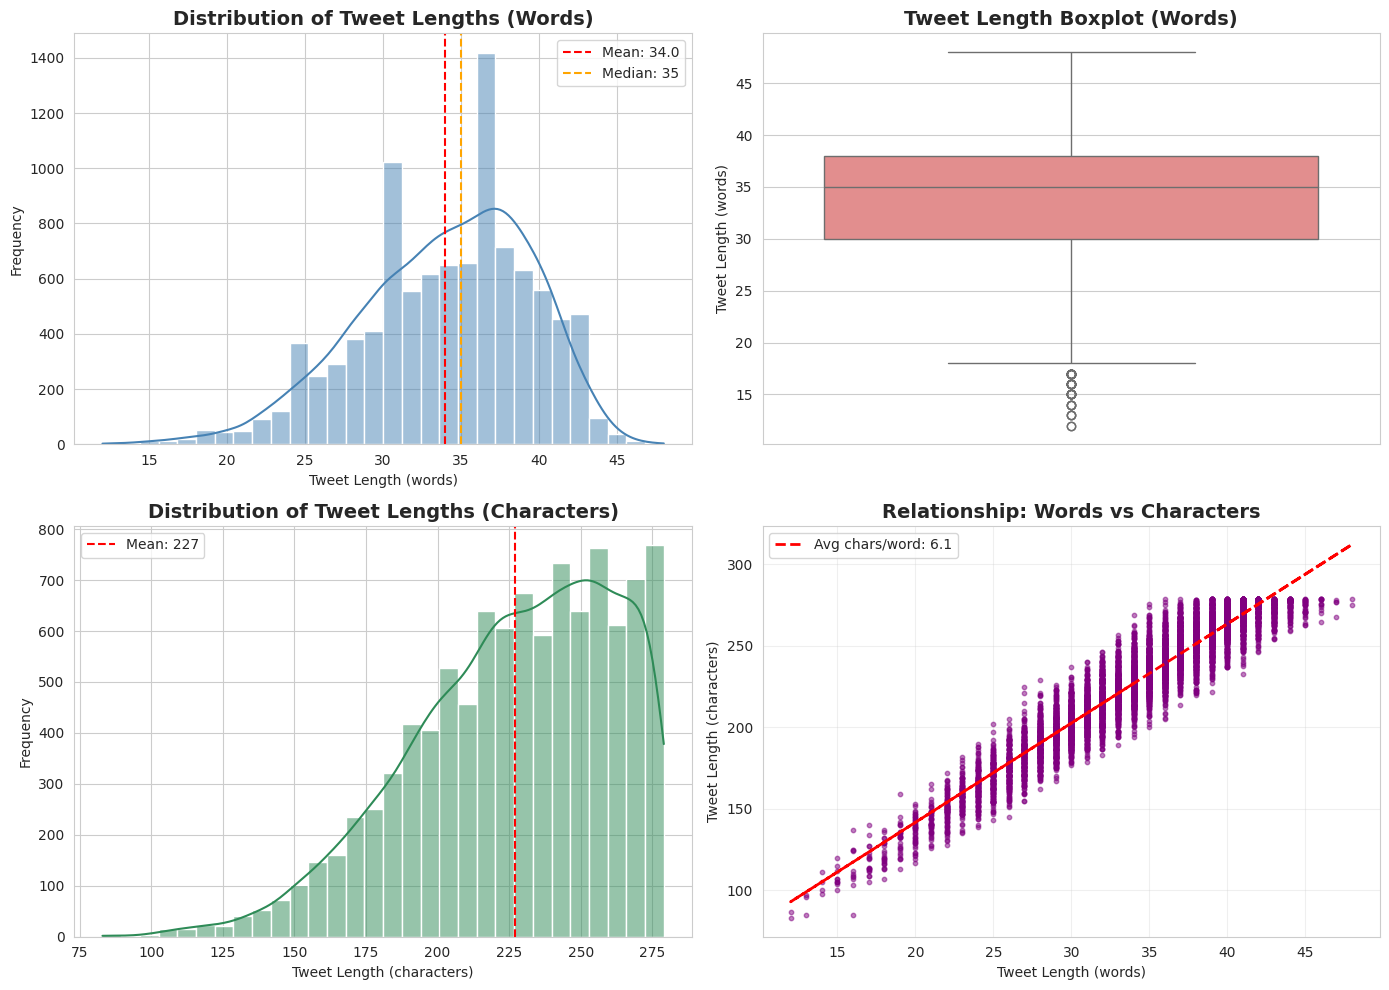


✓ Average characters per word: 6.68


SPECIAL CONTENT DETECTION:
--------------------------------------------------------------------------------
Tweets with @mentions: 0 (0.0%)
Tweets with #hashtags: 0 (0.0%)
Tweets with URLs: 0 (0.0%)
Tweets with numbers: 0 (0.0%)


In [ ]:
# ============================================================================
#  TEXT CONTENT ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("TEXT CONTENT ANALYSIS")
print("="*80)

# Calculate tweet length in WORDS (not characters)
df['tweet_length_words'] = df['Text'].astype(str).apply(lambda x: len(x.split()))

# Also keep character length for reference
df['tweet_length_chars'] = df['Text'].astype(str).apply(len)

# Basic text statistics - WORDS
print("\nTWEET LENGTH STATISTICS (WORDS):")
print("-" * 80)
print(f"Average tweet length: {df['tweet_length_words'].mean():.2f} words")
print(f"Median tweet length: {df['tweet_length_words'].median():.0f} words")
print(f"Minimum tweet length: {df['tweet_length_words'].min()} words")
print(f"Maximum tweet length: {df['tweet_length_words'].max()} words")
print(f"Standard deviation: {df['tweet_length_words'].std():.2f} words")

# Additional character statistics for reference
print("\n\nTWEET LENGTH STATISTICS (CHARACTERS - for reference):")
print("-" * 80)
print(f"Average tweet length: {df['tweet_length_chars'].mean():.2f} characters")
print(f"Median tweet length: {df['tweet_length_chars'].median():.0f} characters")
print(f"Minimum tweet length: {df['tweet_length_chars'].min()} characters")
print(f"Maximum tweet length: {df['tweet_length_chars'].max()} characters")

# Calculate average words per character ratio
avg_chars_per_word = df['tweet_length_chars'].sum() / df['tweet_length_words'].sum()
print(f"\n✓ Average characters per word: {avg_chars_per_word:.2f}")

# Check for special content in tweets
print("\n\nSPECIAL CONTENT DETECTION:")
print("-" * 80)

# Detect various tweet features
df['has_mention'] = df['Text'].str.contains(r'@\w+', regex=True, na=False)
df['has_hashtag'] = df['Text'].str.contains(r'#\w+', regex=True, na=False)
df['has_url'] = df['Text'].str.contains(r'http[s]?://\S+', regex=True, na=False)
df['has_number'] = df['Text'].str.contains(r'\d+', regex=True, na=False)

special_content = {
    'Tweets with @mentions': df['has_mention'].sum(),
    'Tweets with #hashtags': df['has_hashtag'].sum(),
    'Tweets with URLs': df['has_url'].sum(),
    'Tweets with numbers': df['has_number'].sum()
}

for feature, count in special_content.items():
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count:,} ({percentage:.1f}%)")

In [ ]:
# Visualize tweet length distribution (WORDS)
print("\nGenerating tweet length distribution visualization...")
plt.figure(figsize=(14, 10))

# Word count histogram
plt.subplot(2, 2, 1)
sns.histplot(df['tweet_length_words'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Tweet Lengths (Words)', fontsize=14, fontweight='bold')
plt.xlabel('Tweet Length (words)')
plt.ylabel('Frequency')
plt.axvline(df['tweet_length_words'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["tweet_length_words"].mean():.1f}')
plt.axvline(df['tweet_length_words'].median(), color='orange', linestyle='--',
            label=f'Median: {df["tweet_length_words"].median():.0f}')
plt.legend()

# Word count boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df['tweet_length_words'], color='lightcoral')
plt.title('Tweet Length Boxplot (Words)', fontsize=14, fontweight='bold')
plt.ylabel('Tweet Length (words)')

# Character count histogram (for comparison)
plt.subplot(2, 2, 3)
sns.histplot(df['tweet_length_chars'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Tweet Lengths (Characters)', fontsize=14, fontweight='bold')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.axvline(df['tweet_length_chars'].mean(), color='red', linestyle='--',
            label=f'Mean: {df["tweet_length_chars"].mean():.0f}')
plt.legend()

# Words vs Characters scatter
plt.subplot(2, 2, 4)
plt.scatter(df['tweet_length_words'], df['tweet_length_chars'],
           alpha=0.5, color='purple', s=10)
plt.title('Relationship: Words vs Characters', fontsize=14, fontweight='bold')
plt.xlabel('Tweet Length (words)')
plt.ylabel('Tweet Length (characters)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['tweet_length_words'], df['tweet_length_chars'], 1)
p = np.poly1d(z)
plt.plot(df['tweet_length_words'], p(df['tweet_length_words']),
        "r--", linewidth=2, label=f'Avg chars/word: {z[0]:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

####**ENGAGEMENT METRICS ANALYSIS**

In [ ]:
# ============================================================================
#  ENGAGEMENT METRICS ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("ENGAGEMENT METRICS ANALYSIS")
print("="*80)

# Analyze retweets and likes
print("\nENGAGEMENT STATISTICS:")
print("-" * 80)

engagement_stats = df[['Retweets', 'Likes']].describe()
print(engagement_stats)

# Find highly engaged tweets
print("\n\nTOP 5 MOST RETWEETED TWEETS:")
print("-" * 80)
top_retweets = df.nlargest(5, 'Retweets')[['Tweet_ID', 'Username', 'Retweets', 'Likes', 'Text']]
for idx, row in top_retweets.iterrows():
    print(f"\nTweet ID: {row['Tweet_ID']} | User: {row['Username']}")
    print(f"Retweets: {row['Retweets']} | Likes: {row['Likes']}")
    print(f"Text: {row['Text'][:100]}...")

print("\n\nTOP 5 MOST LIKED TWEETS:")
print("-" * 80)
top_likes = df.nlargest(5, 'Likes')[['Tweet_ID', 'Username', 'Retweets', 'Likes', 'Text']]
for idx, row in top_likes.iterrows():
    print(f"\nTweet ID: {row['Tweet_ID']} | User: {row['Username']}")
    print(f"Retweets: {row['Retweets']} | Likes: {row['Likes']}")
    print(f"Text: {row['Text'][:100]}...")


ENGAGEMENT METRICS ANALYSIS

ENGAGEMENT STATISTICS:
--------------------------------------------------------------------------------
           Retweets         Likes
count  10000.000000  10000.000000
mean      49.721200     49.929300
std       28.948856     28.877193
min        0.000000      0.000000
25%       25.000000     25.000000
50%       49.000000     50.000000
75%       75.000000     75.000000
max      100.000000    100.000000


TOP 5 MOST RETWEETED TWEETS:
--------------------------------------------------------------------------------

Tweet ID: 167 | User: scottandrea
Retweets: 100 | Likes: 20
Text: Part despite its south develop building. Food when rich property production heart.
Help instead time...

Tweet ID: 315 | User: richardperry
Retweets: 100 | Likes: 76
Text: Fall send her box ground. Six personal how model. Responsibility commercial spend sea language perfo...

Tweet ID: 435 | User: jenna44
Retweets: 100 | Likes: 8
Text: Country less before board bad. Explain agre



Generating engagement distribution visualizations...


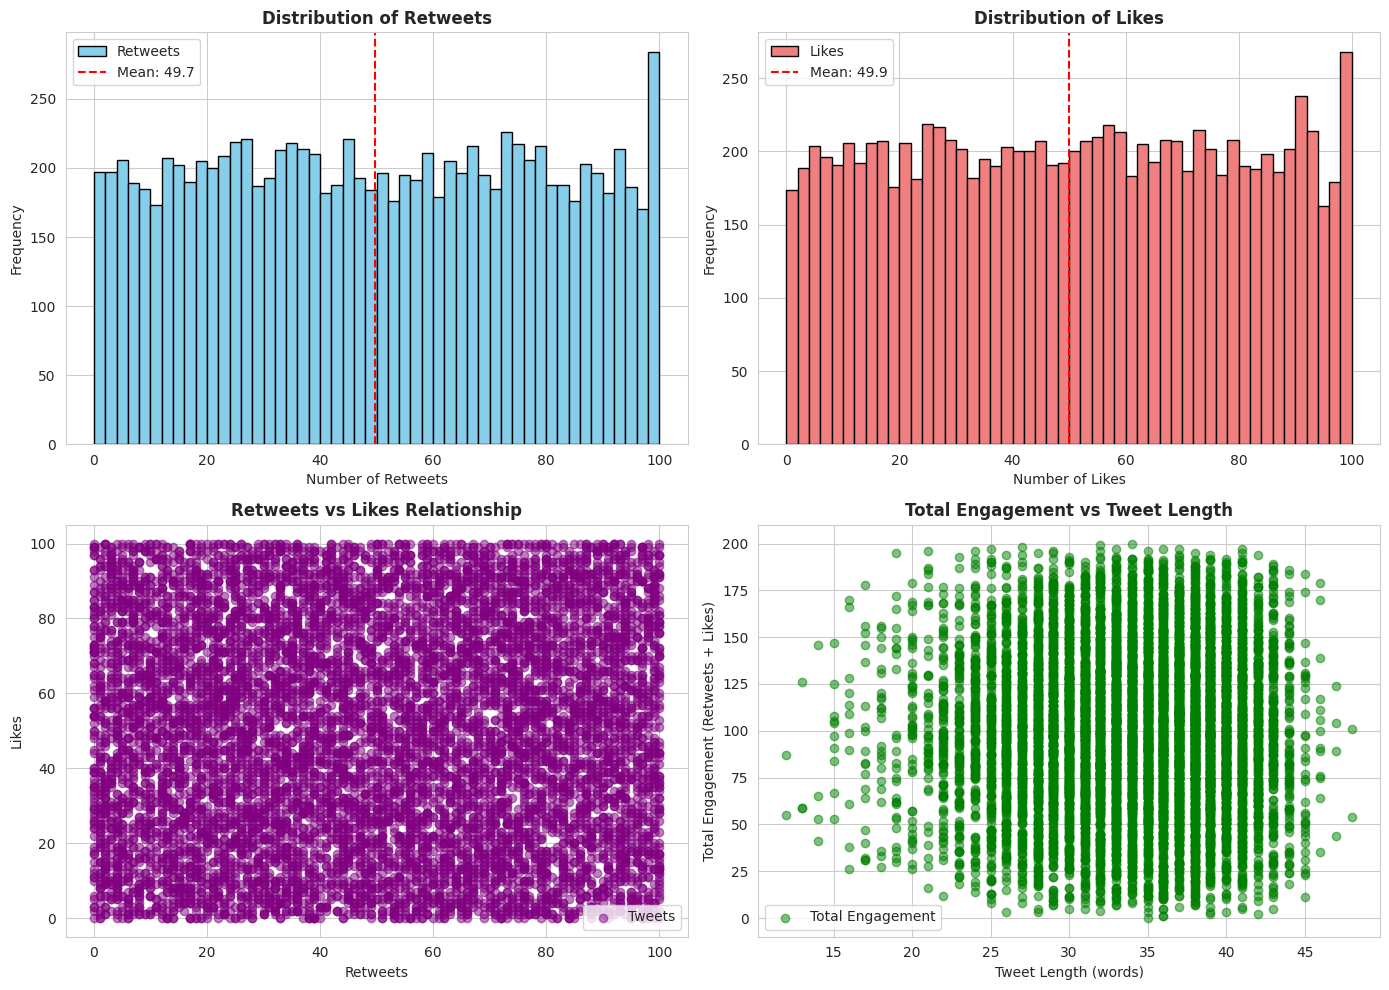



Total engagement across all tweets: 996,505
Average engagement per tweet: 99.65


In [ ]:
# Visualize engagement distribution
print("\n\nGenerating engagement distribution visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Retweets distribution
axes[0, 0].hist(df['Retweets'], bins=50, color='skyblue', edgecolor='black', label='Retweets')
axes[0, 0].set_title('Distribution of Retweets', fontweight='bold')
axes[0, 0].set_xlabel('Number of Retweets')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Retweets'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["Retweets"].mean():.1f}')
axes[0, 0].legend()

# Likes distribution
axes[0, 1].hist(df['Likes'], bins=50, color='lightcoral', edgecolor='black', label='Likes')
axes[0, 1].set_title('Distribution of Likes', fontweight='bold')
axes[0, 1].set_xlabel('Number of Likes')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Likes'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["Likes"].mean():.1f}')
axes[0, 1].legend()

# Retweets vs Likes scatter
axes[1, 0].scatter(df['Retweets'], df['Likes'], alpha=0.5, color='purple', label='Tweets')
axes[1, 0].set_title('Retweets vs Likes Relationship', fontweight='bold')
axes[1, 0].set_xlabel('Retweets')
axes[1, 0].set_ylabel('Likes')
axes[1, 0].legend()

# Engagement by tweet length
axes[1, 1].scatter(df['tweet_length_words'], df['Retweets'] + df['Likes'],
                   alpha=0.5, color='green', label='Total Engagement')
axes[1, 1].set_title('Total Engagement vs Tweet Length', fontweight='bold')
axes[1, 1].set_xlabel('Tweet Length (words)')
axes[1, 1].set_ylabel('Total Engagement (Retweets + Likes)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Calculate engagement rate
df['total_engagement'] = df['Retweets'] + df['Likes']
print(f"\n\nTotal engagement across all tweets: {df['total_engagement'].sum():,}")
print(f"Average engagement per tweet: {df['total_engagement'].mean():.2f}")

###**FEATURE ENGINEERING**

####**TEMPORAL FEATURE ENGINEERING**

In [ ]:
# ============================================================================
# TEMPORAL FEATURE ENGINEERING
# ============================================================================
print("\n" + "="*80)
print("TEMPORAL FEATURE ENGINEERING")
print("="*80)

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Check for any timestamp conversion issues
null_timestamps = df['Timestamp'].isnull().sum()
if null_timestamps > 0:
    print(f"Warning: {null_timestamps} timestamps could not be converted")
else:
    print("All timestamps converted successfully")

# Extract temporal features
df['Date'] = df['Timestamp'].dt.date
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.month_name()
df['Day'] = df['Timestamp'].dt.day
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour
df['Week'] = df['Timestamp'].dt.isocalendar().week

# Display temporal range
print("\n\nTEMPORAL COVERAGE:")
print("-" * 80)
print(f"First tweet: {df['Timestamp'].min()}")
print(f"Last tweet: {df['Timestamp'].max()}")
print(f"Time span: {(df['Timestamp'].max() - df['Timestamp'].min()).days} days")
print(f"Unique dates: {df['Date'].nunique()}")

# Monthly distribution
print("\n\nMONTHLY TWEET DISTRIBUTION:")
print("-" * 80)
monthly_counts = df['Month_Name'].value_counts().sort_index()
print(monthly_counts)

# Day of week distribution
print("\n\nDAY OF WEEK DISTRIBUTION:")
print("-" * 80)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
print(day_counts)

# Hourly distribution
print("\n\nHOURLY POSTING PATTERN:")
print("-" * 80)
hourly_counts = df['Hour'].value_counts().sort_index()
print(hourly_counts.head(10))



TEMPORAL FEATURE ENGINEERING
All timestamps converted successfully


TEMPORAL COVERAGE:
--------------------------------------------------------------------------------
First tweet: 2023-01-01 00:01:15
Last tweet: 2023-05-15 12:32:09
Time span: 134 days
Unique dates: 135


MONTHLY TWEET DISTRIBUTION:
--------------------------------------------------------------------------------
Month_Name
April       2195
February    2076
January     2346
March       2296
May         1087
Name: count, dtype: int64


DAY OF WEEK DISTRIBUTION:
--------------------------------------------------------------------------------
DayOfWeek
Monday       1461
Tuesday      1435
Wednesday    1438
Thursday     1452
Friday       1438
Saturday     1330
Sunday       1446
Name: count, dtype: int64


HOURLY POSTING PATTERN:
--------------------------------------------------------------------------------
Hour
0    415
1    403
2    423
3    456
4    414
5    401
6    417
7    435
8    404
9    435
Name: count, dtype: i



Generating temporal distribution visualizations...


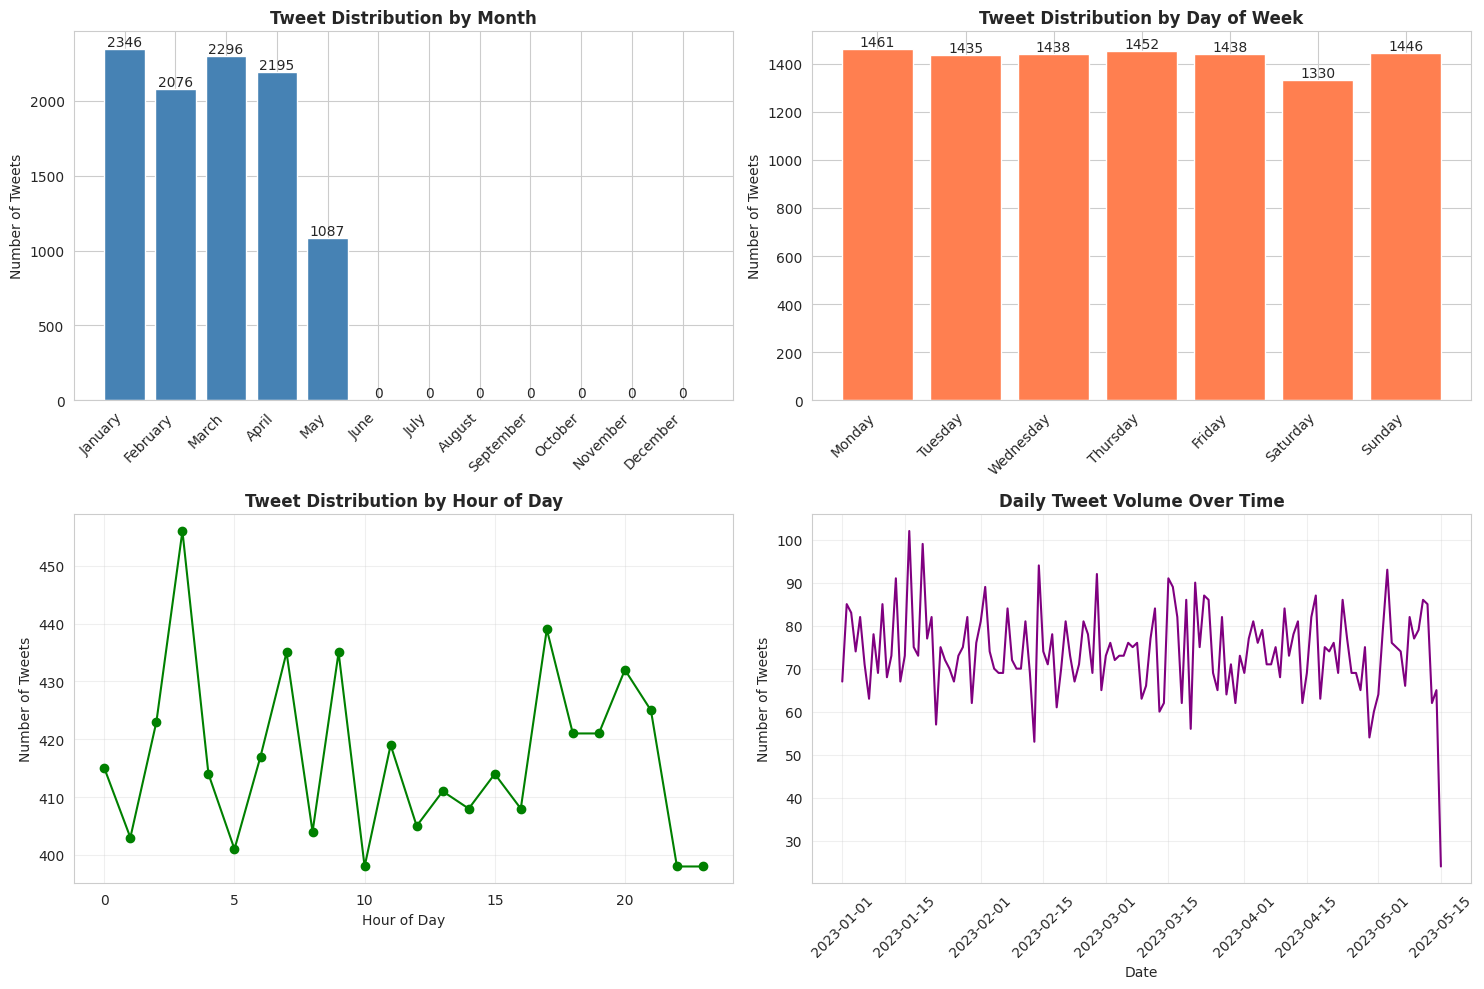

In [ ]:
# Visualize temporal patterns
print("\n\nGenerating temporal distribution visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tweets per month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = df['Month_Name'].value_counts().reindex(month_order, fill_value=0)
bars_month = axes[0, 0].bar(range(len(monthly_data)), monthly_data.values, color='steelblue')
axes[0, 0].set_xticks(range(len(monthly_data)))
axes[0, 0].set_xticklabels(monthly_data.index, rotation=45, ha='right')
axes[0, 0].set_title('Tweet Distribution by Month', fontweight='bold')
axes[0, 0].set_ylabel('Number of Tweets')
# Add counts on top of bars
for bar in bars_month:
    yval = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment


# Tweets per day of week
bars_day = axes[0, 1].bar(range(len(day_counts)), day_counts.values, color='coral')
axes[0, 1].set_xticks(range(len(day_counts)))
axes[0, 1].set_xticklabels(day_counts.index, rotation=45, ha='right')
axes[0, 1].set_title('Tweet Distribution by Day of Week', fontweight='bold')
axes[0, 1].set_ylabel('Number of Tweets')
# Add counts on top of bars
for bar in bars_day:
    yval = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')


# Tweets per hour
axes[1, 0].plot(hourly_counts.index, hourly_counts.values, marker='o', color='green')
axes[1, 0].set_title('Tweet Distribution by Hour of Day', fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Tweets')
axes[1, 0].grid(True, alpha=0.3)

# Time series (daily tweets)
daily_tweets = df.groupby('Date').size()
axes[1, 1].plot(daily_tweets.index, daily_tweets.values, color='purple')
axes[1, 1].set_title('Daily Tweet Volume Over Time', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Number of Tweets')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

####**USER ACTIVITY ANALYSIS**

In [ ]:
# ============================================================================
#  USER ACTIVITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print(" USER ACTIVITY ANALYSIS (AGGREGATE LEVEL)")
print("="*80)

# Analyze user posting frequency
user_tweet_counts = df['Username'].value_counts()

print("\nUSER POSTING STATISTICS:")
print("-" * 80)
print(f"Total unique users: {df['Username'].nunique():,}")
print(f"Average tweets per user: {user_tweet_counts.mean():.2f}")
print(f"Median tweets per user: {user_tweet_counts.median():.0f}")
print(f"Maximum tweets by single user: {user_tweet_counts.max()}")
print(f"Minimum tweets per user: {user_tweet_counts.min()}")

# Top 10 most active users (aggregate only, no individual focus)
print("\n\nTOP 10 MOST ACTIVE USERS (Aggregate Statistics):")
print("-" * 80)
top_users = user_tweet_counts.head(10)
for rank, (user, count) in enumerate(top_users.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{rank}. {count} tweets ({percentage:.2f}% of total)")


 USER ACTIVITY ANALYSIS (AGGREGATE LEVEL)

USER POSTING STATISTICS:
--------------------------------------------------------------------------------
Total unique users: 9,447
Average tweets per user: 1.06
Median tweets per user: 1
Maximum tweets by single user: 6
Minimum tweets per user: 1


TOP 10 MOST ACTIVE USERS (Aggregate Statistics):
--------------------------------------------------------------------------------
1. 6 tweets (0.06% of total)
2. 5 tweets (0.05% of total)
3. 5 tweets (0.05% of total)
4. 4 tweets (0.04% of total)
5. 4 tweets (0.04% of total)
6. 4 tweets (0.04% of total)
7. 4 tweets (0.04% of total)
8. 4 tweets (0.04% of total)
9. 4 tweets (0.04% of total)
10. 4 tweets (0.04% of total)




Generating user activity distribution...


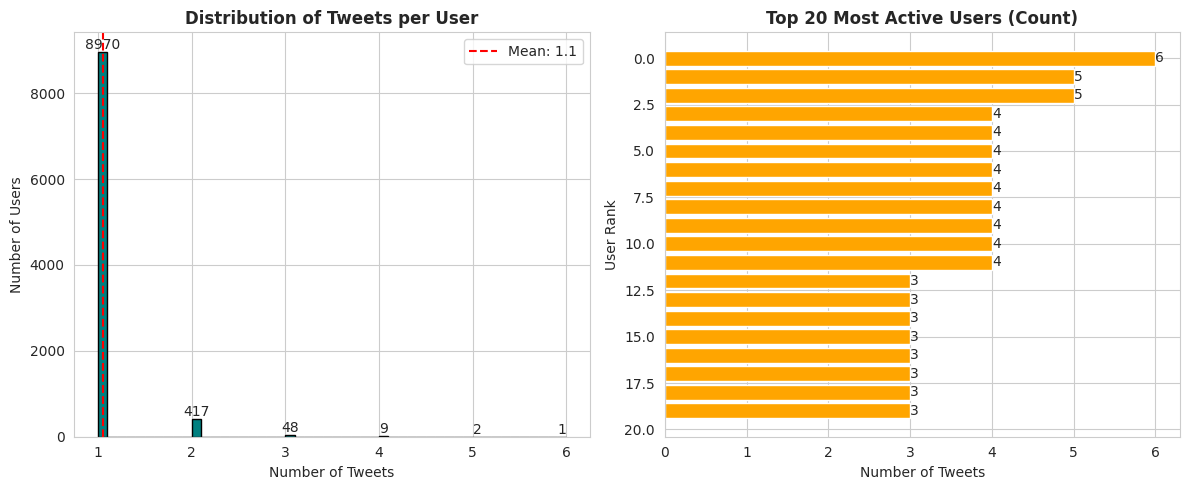

In [ ]:
# Visualize user activity distribution
print("\n\nGenerating user activity distribution...")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
counts, bins, bars = plt.hist(user_tweet_counts.values, bins=50, color='teal', edgecolor='black')
plt.title('Distribution of Tweets per User', fontweight='bold')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Users')
plt.axvline(user_tweet_counts.mean(), color='red', linestyle='--',
            label=f'Mean: {user_tweet_counts.mean():.1f}')
plt.legend()
# Add counts on top of bars
for count, bar in zip(counts, bars.patches):
    height = bar.get_height()
    if height > 0: # Only add label if count is greater than 0
        plt.text(bar.get_x() + bar.get_width()/2, height, int(height), va='bottom', ha='center')


plt.subplot(1, 2, 2)
top_20_users = user_tweet_counts.head(20)
bars_user = plt.barh(range(len(top_20_users)), top_20_users.values, color='orange')
plt.title('Top 20 Most Active Users (Count)', fontweight='bold')
plt.xlabel('Number of Tweets')
plt.ylabel('User Rank')
plt.gca().invert_yaxis()
# Add counts on top of horizontal bars
for bar in bars_user:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', ha='left')

plt.tight_layout()
plt.show()

###**SAVE PROCESSED DATASET**

In [ ]:
# ============================================================================
#  SAVE PROCESSED DATASET
# ============================================================================
print("\n" + "="*80)
print("SAVING PROCESSED DATASET")
print("="*80)

# Save the dataset with new features
output_filename = 'twitter_dataset_part1_processed.csv'
df.to_csv(output_filename, index=False)
print(f"✓ Processed dataset saved as '{output_filename}'")
print(f"✓ New features added: {len(df.columns) - 6} additional columns")
print(f"✓ Total columns: {len(df.columns)}")


SAVING PROCESSED DATASET
✓ Processed dataset saved as 'twitter_dataset_part1_processed.csv'
✓ New features added: 15 additional columns
✓ Total columns: 21


###**SUMMARY OF PART 1**

In [ ]:
# ============================================================================
#  SUMMARY OF PART 1
# ============================================================================
print("\n" + "="*80)
print("PART 1 SUMMARY")
print("="*80)

summary = f"""
DATASET OVERVIEW:
-----------------
✓ Total Tweets: {len(df):,}
✓ Unique Users: {df['Username'].nunique():,}
✓ Date Range: {df['Timestamp'].min().date()} to {df['Timestamp'].max().date()}
✓ Time Span: {(df['Timestamp'].max() - df['Timestamp'].min()).days} days
✓ Data Quality: {len(df) - df.isnull().sum().sum():,} complete records

CONTENT CHARACTERISTICS:
------------------------
✓ Average Tweet Length (Words): {df['tweet_length_words'].mean():.0f} words
✓ Tweets with @mentions: {df['has_mention'].sum():,} ({(df['has_mention'].sum()/len(df)*100):.1f}%)
✓ Tweets with #hashtags: {df['has_hashtag'].sum():,} ({(df['has_hashtag'].sum()/len(df)*100):.1f}%)
✓ Tweets with URLs: {df['has_url'].sum():,} ({(df['has_url'].sum()/len(df)*100):.1f}%)

ENGAGEMENT METRICS:
-------------------
✓ Total Retweets: {df['Retweets'].sum():,}
✓ Total Likes: {df['Likes'].sum():,}
✓ Average Retweets per Tweet: {df['Retweets'].mean():.2f}
✓ Average Likes per Tweet: {df['Likes'].mean():.2f}

USER ACTIVITY:
--------------
✓ Total Unique Users: {df['Username'].nunique():,}
✓ Average Tweets per User: {user_tweet_counts.mean():.2f}
✓ Median Tweets per User: {user_tweet_counts.median():,}
"""

print(summary)


PART 1 SUMMARY

DATASET OVERVIEW:
-----------------
✓ Total Tweets: 10,000
✓ Unique Users: 9,447
✓ Date Range: 2023-01-01 to 2023-05-15
✓ Time Span: 134 days
✓ Data Quality: 10,000 complete records

CONTENT CHARACTERISTICS:
------------------------
✓ Average Tweet Length (Words): 34 words
✓ Tweets with @mentions: 0 (0.0%)
✓ Tweets with #hashtags: 0 (0.0%)
✓ Tweets with URLs: 0 (0.0%)

ENGAGEMENT METRICS:
-------------------
✓ Total Retweets: 497,212
✓ Total Likes: 499,293
✓ Average Retweets per Tweet: 49.72
✓ Average Likes per Tweet: 49.93

USER ACTIVITY:
--------------
✓ Total Unique Users: 9,447
✓ Average Tweets per User: 1.06
✓ Median Tweets per User: 1.0



##**PART 2: SENTIMENT ANALYSIS**
This section covers:

    - Sentiment polarity calculation using TextBlob
    - Sentiment classification (Positive, Negative, Neutral)
    - Temporal sentiment trend analysis
    - Visualization of sentiment patterns
    - Statistical analysis of emotional tone

**LOAD PROCESSED DATASET FROM PART 1**

In [ ]:
# ============================================================================
# LOAD PROCESSED DATASET FROM PART 1
# ============================================================================
print("\n" + "="*80)
print("LOADING PROCESSED DATASET")
print("="*80)

try:
    df = pd.read_csv('twitter_dataset_part1_processed.csv')
    print("✓ Dataset loaded successfully!")
    print(f"✓ Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # Ensure Timestamp is datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = pd.to_datetime(df['Date'])

except FileNotFoundError:
    print("✗ Error: Processed dataset not found. Please run Part 1 first.")
    raise


LOADING PROCESSED DATASET
✓ Dataset loaded successfully!
✓ Dataset shape: 10,000 rows × 21 columns


###**SENTIMENT POLARITY CALCULATION**

 Calculate sentiment polarity using TextBlob.
    
    Parameters:
    -----------
    text : str
        The text to analyze
        
    Returns:
    --------
    float : Polarity score ranging from -1 (negative) to +1 (positive)

In [ ]:
# ============================================================================
#  SENTIMENT POLARITY CALCULATION
# ============================================================================
print("\n" + "="*80)
print("CALCULATING SENTIMENT POLARITY SCORES")
print("="*80)

print("\nCalculating sentiment polarity for all tweets...")

# Function to get sentiment polarity using TextBlob
def get_sentiment_polarity(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0.0  # Return neutral if there's an error

# Apply sentiment analysis
df['polarity'] = df['Text'].apply(get_sentiment_polarity)

print("✓ Sentiment polarity calculated for all tweets")

# Display polarity statistics
print("\n\nPOLARITY SCORE STATISTICS:")
print("-" * 80)
print(df['polarity'].describe())

print(f"\nPolarity Score Interpretation:")
print(f"  • Range: -1.0 (most negative) to +1.0 (most positive)")
print(f"  • 0.0 represents neutral sentiment")
print(f"  • Mean polarity: {df['polarity'].mean():.4f}")
print(f"  • Median polarity: {df['polarity'].median():.4f}")


CALCULATING SENTIMENT POLARITY SCORES

Calculating sentiment polarity for all tweets...
✓ Sentiment polarity calculated for all tweets


POLARITY SCORE STATISTICS:
--------------------------------------------------------------------------------
count    10000.000000
mean         0.095192
std          0.128961
min         -0.550000
25%          0.010714
50%          0.089583
75%          0.172727
max          0.850000
Name: polarity, dtype: float64

Polarity Score Interpretation:
  • Range: -1.0 (most negative) to +1.0 (most positive)
  • 0.0 represents neutral sentiment
  • Mean polarity: 0.0952
  • Median polarity: 0.0896


####**SENTIMENT CLASSIFICATION**
Classify sentiment based on polarity score.
    
    Parameters:
    -----------
    polarity : float
        Polarity score from TextBlob
    threshold : float
        Threshold for neutral classification (default: 0.05)
        
    Returns:
    --------
    str : Sentiment label ('Positive', 'Negative', or 'Neutral')


SENTIMENT CLASSIFICATION

SENTIMENT DISTRIBUTION:
--------------------------------------------------------------------------------
Positive  : 6,319 tweets (63.19%)
Neutral   : 2,573 tweets (25.73%)
Negative  : 1,108 tweets (11.08%)

Total tweets analyzed: 10,000


Generating sentiment distribution visualizations...


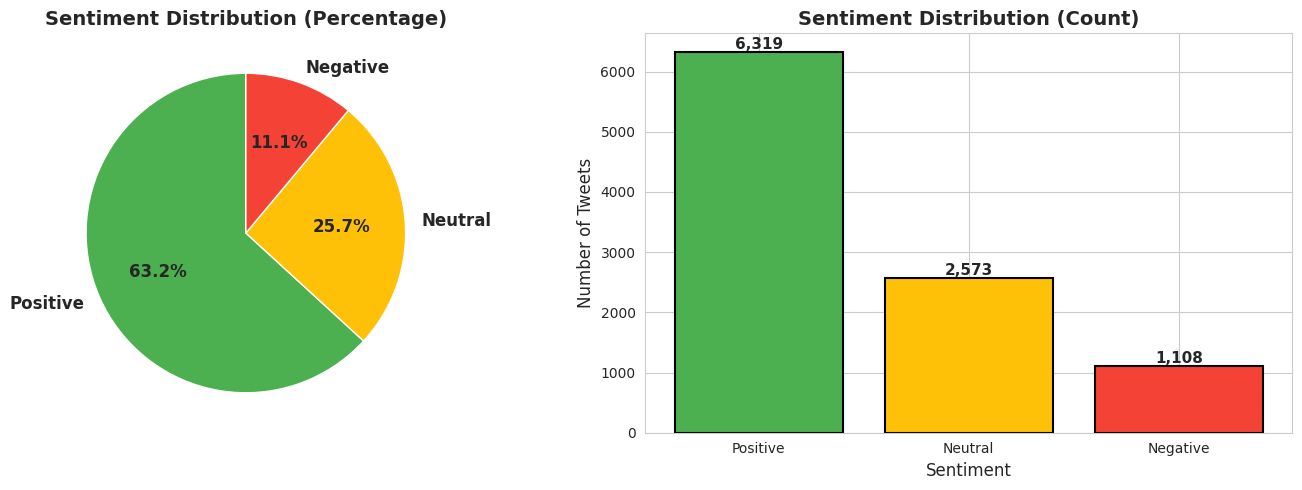

In [ ]:
# ============================================================================
#  SENTIMENT CLASSIFICATION
# ============================================================================
print("\n" + "="*80)
print("SENTIMENT CLASSIFICATION")
print("="*80)

def classify_sentiment(polarity, threshold=0.05):
    if polarity > threshold:
        return 'Positive'
    elif polarity < -threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification
df['sentiment_label'] = df['polarity'].apply(classify_sentiment)

# Count sentiments
sentiment_counts = df['sentiment_label'].value_counts()

print("\nSENTIMENT DISTRIBUTION:")
print("-" * 80)
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{sentiment:10s}: {count:5,} tweets ({percentage:5.2f}%)")

print(f"\nTotal tweets analyzed: {len(df):,}")

# Visualize sentiment distribution
print("\n\nGenerating sentiment distribution visualizations...")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = {'Positive': '#4CAF50', 'Negative': '#F44336', 'Neutral': '#FFC107'}
sentiment_colors = [colors[sentiment] for sentiment in sentiment_counts.index]

axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index,
           autopct='%1.1f%%', startangle=90, colors=sentiment_colors,
           textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Sentiment Distribution (Percentage)',
                  fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(sentiment_counts.index, sentiment_counts.values,
           color=sentiment_colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Sentiment Distribution (Count)',
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Tweets', fontsize=12)
axes[1].set_xlabel('Sentiment', fontsize=12)

# Add count labels on bars
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    axes[1].text(i, count, f'{count:,}', ha='center', va='bottom',
                fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

####**POLARITY DISTRIBUTION ANALYSIS**


POLARITY DISTRIBUTION ANALYSIS


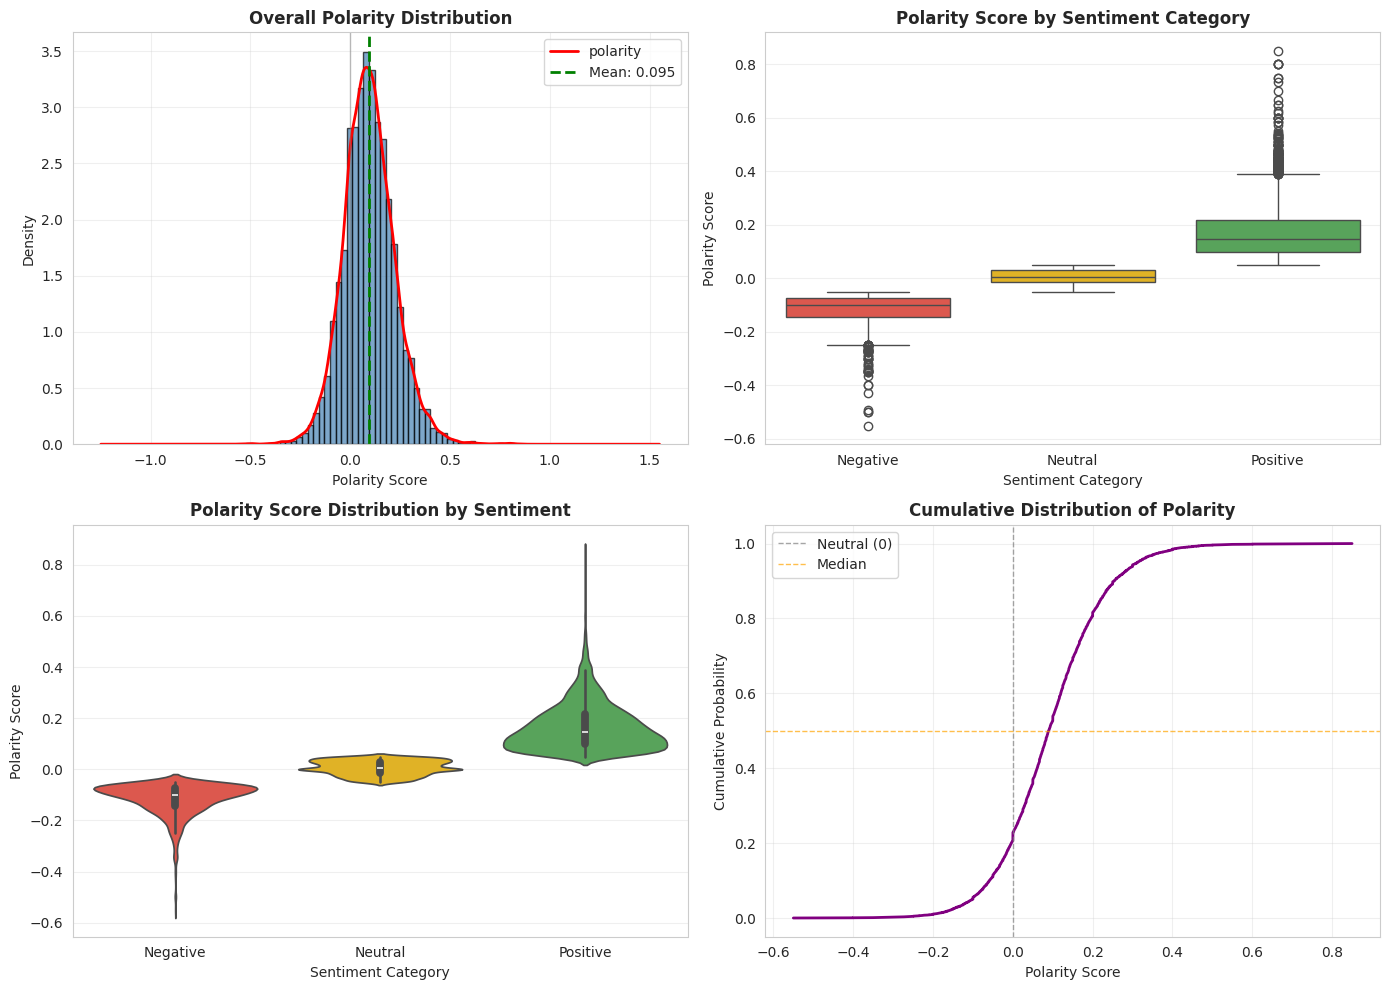

In [ ]:
# ============================================================================
# POLARITY DISTRIBUTION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("POLARITY DISTRIBUTION ANALYSIS")
print("="*80)

# Visualize polarity distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Overall polarity distribution (histogram with KDE)
axes[0, 0].hist(df['polarity'], bins=50, color='steelblue',
               edgecolor='black', alpha=0.7, density=True)
df['polarity'].plot(kind='kde', ax=axes[0, 0], color='red', linewidth=2)
axes[0, 0].axvline(df['polarity'].mean(), color='green', linestyle='--',
                  linewidth=2, label=f'Mean: {df["polarity"].mean():.3f}')
axes[0, 0].axvline(0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
axes[0, 0].set_title('Overall Polarity Distribution', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Polarity Score')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot by sentiment
sentiment_order = ['Negative', 'Neutral', 'Positive']
sns.boxplot(x='sentiment_label', y='polarity', data=df,
           order=sentiment_order, ax=axes[0, 1],
           palette={'Positive': '#4CAF50', 'Negative': '#F44336', 'Neutral': '#FFC107'})
axes[0, 1].set_title('Polarity Score by Sentiment Category', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Sentiment Category')
axes[0, 1].set_ylabel('Polarity Score')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Violin plot by sentiment
sns.violinplot(x='sentiment_label', y='polarity', data=df,
              order=sentiment_order, ax=axes[1, 0],
              palette={'Positive': '#4CAF50', 'Negative': '#F44336', 'Neutral': '#FFC107'})
axes[1, 0].set_title('Polarity Score Distribution by Sentiment', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Sentiment Category')
axes[1, 0].set_ylabel('Polarity Score')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Cumulative distribution
sorted_polarity = np.sort(df['polarity'])
cumulative = np.arange(1, len(sorted_polarity) + 1) / len(sorted_polarity)
axes[1, 1].plot(sorted_polarity, cumulative, color='purple', linewidth=2)
axes[1, 1].axvline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='Neutral (0)')
axes[1, 1].axhline(0.5, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='Median')
axes[1, 1].set_title('Cumulative Distribution of Polarity', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Polarity Score')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


####**SAMPLE TWEETS BY SENTIMENT**

In [ ]:
# ============================================================================
# SAMPLE TWEETS BY SENTIMENT
# ============================================================================
print("\n" + "="*80)
print("SAMPLE TWEETS BY SENTIMENT CATEGORY")
print("="*80)

# Get sample tweets from each sentiment category
num_samples = 5

for sentiment in ['Positive', 'Negative', 'Neutral']:
    print(f"\n{sentiment.upper()} TWEETS (Sample of {num_samples}):")
    print("-" * 80)

    sentiment_tweets = df[df['sentiment_label'] == sentiment].nlargest(num_samples, 'polarity' if sentiment == 'Positive' else 'Likes')

    for idx, (i, row) in enumerate(sentiment_tweets.iterrows(), 1):
        print(f"\n{idx}. Polarity: {row['polarity']:.4f} | Likes: {row['Likes']} | Retweets: {row['Retweets']}")
        print(f"   Text: {row['Text'][:150]}{'...' if len(row['Text']) > 150 else ''}")

# Most extreme sentiments
print("\n\nMOST EXTREME SENTIMENTS:")
print("-" * 80)

# Most positive tweet
most_positive = df.loc[df['polarity'].idxmax()]
print("\n✓ MOST POSITIVE TWEET:")
print(f"  Polarity: {most_positive['polarity']:.4f}")
print(f"  Engagement: {most_positive['Likes']} likes, {most_positive['Retweets']} retweets")
print(f"  Text: {most_positive['Text']}")

# Most negative tweet
most_negative = df.loc[df['polarity'].idxmin()]
print("\n✗ MOST NEGATIVE TWEET:")
print(f"  Polarity: {most_negative['polarity']:.4f}")
print(f"  Engagement: {most_negative['Likes']} likes, {most_negative['Retweets']} retweets")
print(f"  Text: {most_negative['Text']}")


SAMPLE TWEETS BY SENTIMENT CATEGORY

POSITIVE TWEETS (Sample of 5):
--------------------------------------------------------------------------------

1. Polarity: 0.8500 | Likes: 63 | Retweets: 10
   Text: Fill house leave community institution lot address beautiful. Democrat article maintain might. Be could Democrat health civil can out.

2. Polarity: 0.8000 | Likes: 68 | Retweets: 41
   Text: Not perhaps performance party. Husband yeah see care lose put. Politics knowledge rate professor ahead fly.

3. Polarity: 0.8000 | Likes: 91 | Retweets: 83
   Text: Catch system world college team each.
Size happy produce baby throw threat mother bill. War fill price dog. Than idea meeting against movement thank g...

4. Polarity: 0.8000 | Likes: 31 | Retweets: 84
   Text: Pm candidate student. Themselves east coach seek player someone. Democratic fill design offer almost. Service determine across someone well glass pass...

5. Polarity: 0.8000 | Likes: 58 | Retweets: 24
   Text: Data teacher d

####**TEMPORAL SENTIMENT TRENDS - DAILY**


TEMPORAL SENTIMENT TRENDS - DAILY ANALYSIS

Daily sentiment trends calculated
Date range: 2023-01-01 00:00:00 to 2023-05-15 00:00:00
Total days: 135


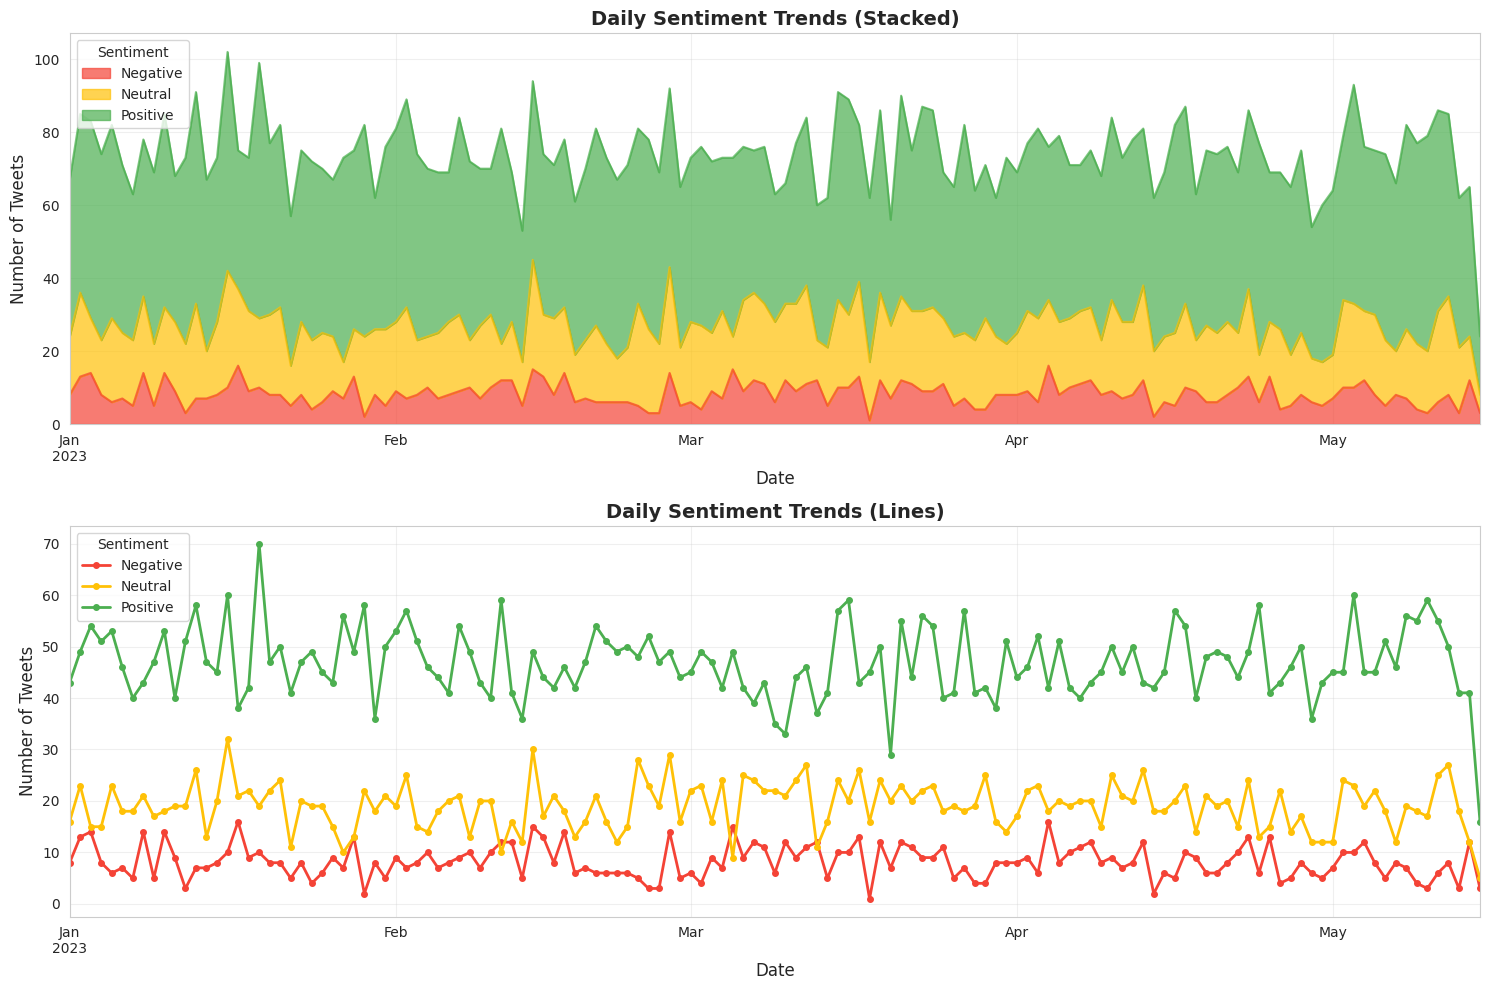


Plot average daily polarity


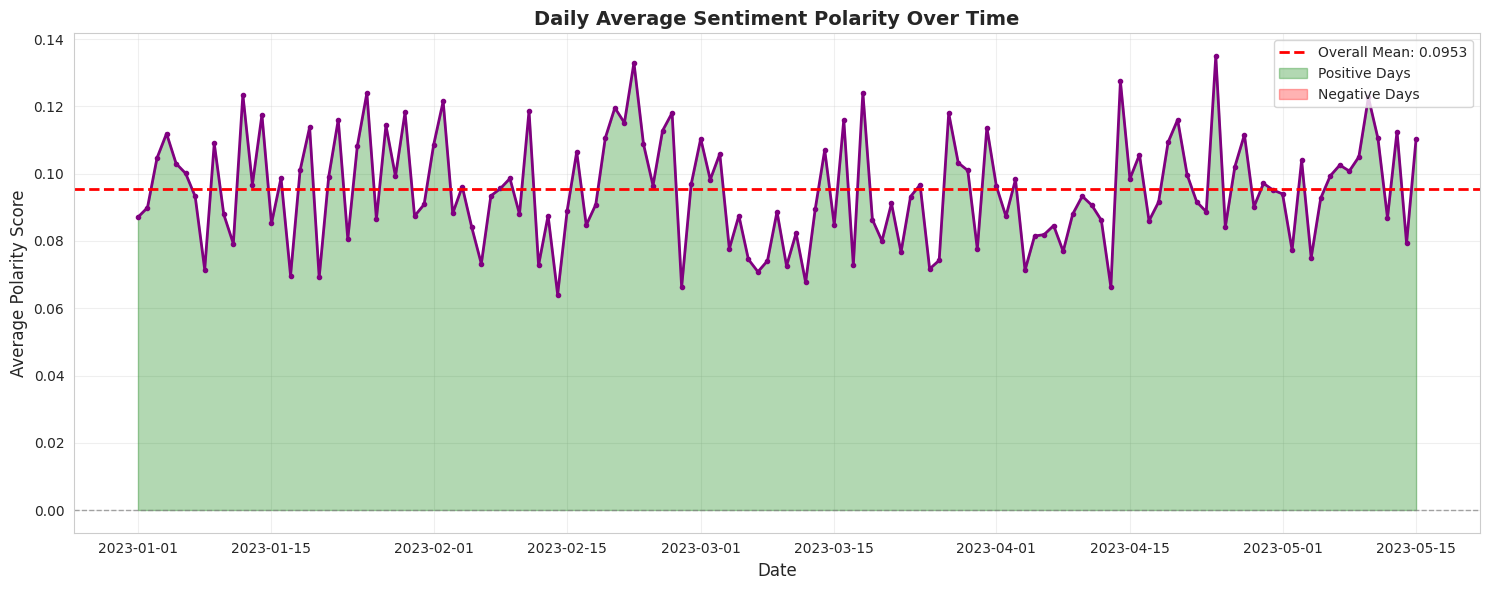

In [ ]:
# ============================================================================
#  TEMPORAL SENTIMENT TRENDS - DAILY
# ============================================================================
print("\n" + "="*80)
print("TEMPORAL SENTIMENT TRENDS - DAILY ANALYSIS")
print("="*80)

# Calculate daily sentiment counts
daily_sentiment = df.groupby([df['Date'], 'sentiment_label']).size().unstack(fill_value=0)

print("\nDaily sentiment trends calculated")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days: {len(daily_sentiment)}")

# Calculate daily average polarity
daily_avg_polarity = df.groupby('Date')['polarity'].mean()

# Visualize daily sentiment trends
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Stacked area chart
daily_sentiment.plot(kind='area', stacked=True, ax=axes[0],
                    color=['#F44336', '#FFC107', '#4CAF50'],
                    alpha=0.7)
axes[0].set_title('Daily Sentiment Trends (Stacked)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Tweets', fontsize=12)
axes[0].legend(title='Sentiment', loc='upper left')
axes[0].grid(True, alpha=0.3)

# Line chart with markers
daily_sentiment.plot(ax=axes[1], marker='o', linewidth=2, markersize=4,
                    color=['#F44336', '#FFC107', '#4CAF50'])
axes[1].set_title('Daily Sentiment Trends (Lines)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of Tweets', fontsize=12)
axes[1].legend(title='Sentiment', loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\nPlot average daily polarity')
# Plot average daily polarity
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(daily_avg_polarity.index, daily_avg_polarity.values,
        color='purple', linewidth=2, marker='o', markersize=3)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=daily_avg_polarity.mean(), color='red', linestyle='--',
          linewidth=2, label=f'Overall Mean: {daily_avg_polarity.mean():.4f}')
ax.fill_between(daily_avg_polarity.index, daily_avg_polarity.values, 0,
                where=(daily_avg_polarity.values > 0), alpha=0.3, color='green', label='Positive Days')
ax.fill_between(daily_avg_polarity.index, daily_avg_polarity.values, 0,
                where=(daily_avg_polarity.values < 0), alpha=0.3, color='red', label='Negative Days')

ax.set_title('Daily Average Sentiment Polarity Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Average Polarity Score', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

####**TEMPORAL SENTIMENT TRENDS - MONTHLY**

In [ ]:
# ============================================================================
#  TEMPORAL SENTIMENT TRENDS - MONTHLY
# ============================================================================
print("\n" + "="*80)
print(" TEMPORAL SENTIMENT TRENDS - MONTHLY ANALYSIS")
print("="*80)

# Create month-year column for better grouping
df['Month_Year'] = df['Timestamp'].dt.to_period('M')

# Calculate monthly sentiment counts
monthly_sentiment = df.groupby(['Month_Year', 'sentiment_label']).size().unstack(fill_value=0)

print("\nMonthly sentiment trends calculated")
print(f"Months covered: {len(monthly_sentiment)}")

# Calculate monthly average polarity
monthly_avg_polarity = df.groupby('Month_Year')['polarity'].mean()
monthly_total_tweets = df.groupby('Month_Year').size()

# Display monthly statistics
print("\n\nMONTHLY SENTIMENT SUMMARY:")
print("-" * 80)
print(f"{'Month':<15} {'Total':<8} {'Positive':<10} {'Neutral':<10} {'Negative':<10} {'Avg Polarity':<15}")
print("-" * 80)

for month in monthly_sentiment.index:
    total = monthly_total_tweets[month]
    pos = monthly_sentiment.loc[month, 'Positive'] if 'Positive' in monthly_sentiment.columns else 0
    neu = monthly_sentiment.loc[month, 'Neutral'] if 'Neutral' in monthly_sentiment.columns else 0
    neg = monthly_sentiment.loc[month, 'Negative'] if 'Negative' in monthly_sentiment.columns else 0
    avg_pol = monthly_avg_polarity[month]

    print(f"{str(month):<15} {total:<8} {pos:<10} {neu:<10} {neg:<10} {avg_pol:<15.4f}")


 TEMPORAL SENTIMENT TRENDS - MONTHLY ANALYSIS

Monthly sentiment trends calculated
Months covered: 5


MONTHLY SENTIMENT SUMMARY:
--------------------------------------------------------------------------------
Month           Total    Positive   Neutral    Negative   Avg Polarity   
--------------------------------------------------------------------------------
2023-01         2346     1501       589        256        0.0980         
2023-02         2076     1328       517        231        0.0977         
2023-03         2296     1394       633        269        0.0900         
2023-04         2195     1386       563        246        0.0941         
2023-05         1087     710        271        106        0.0978         


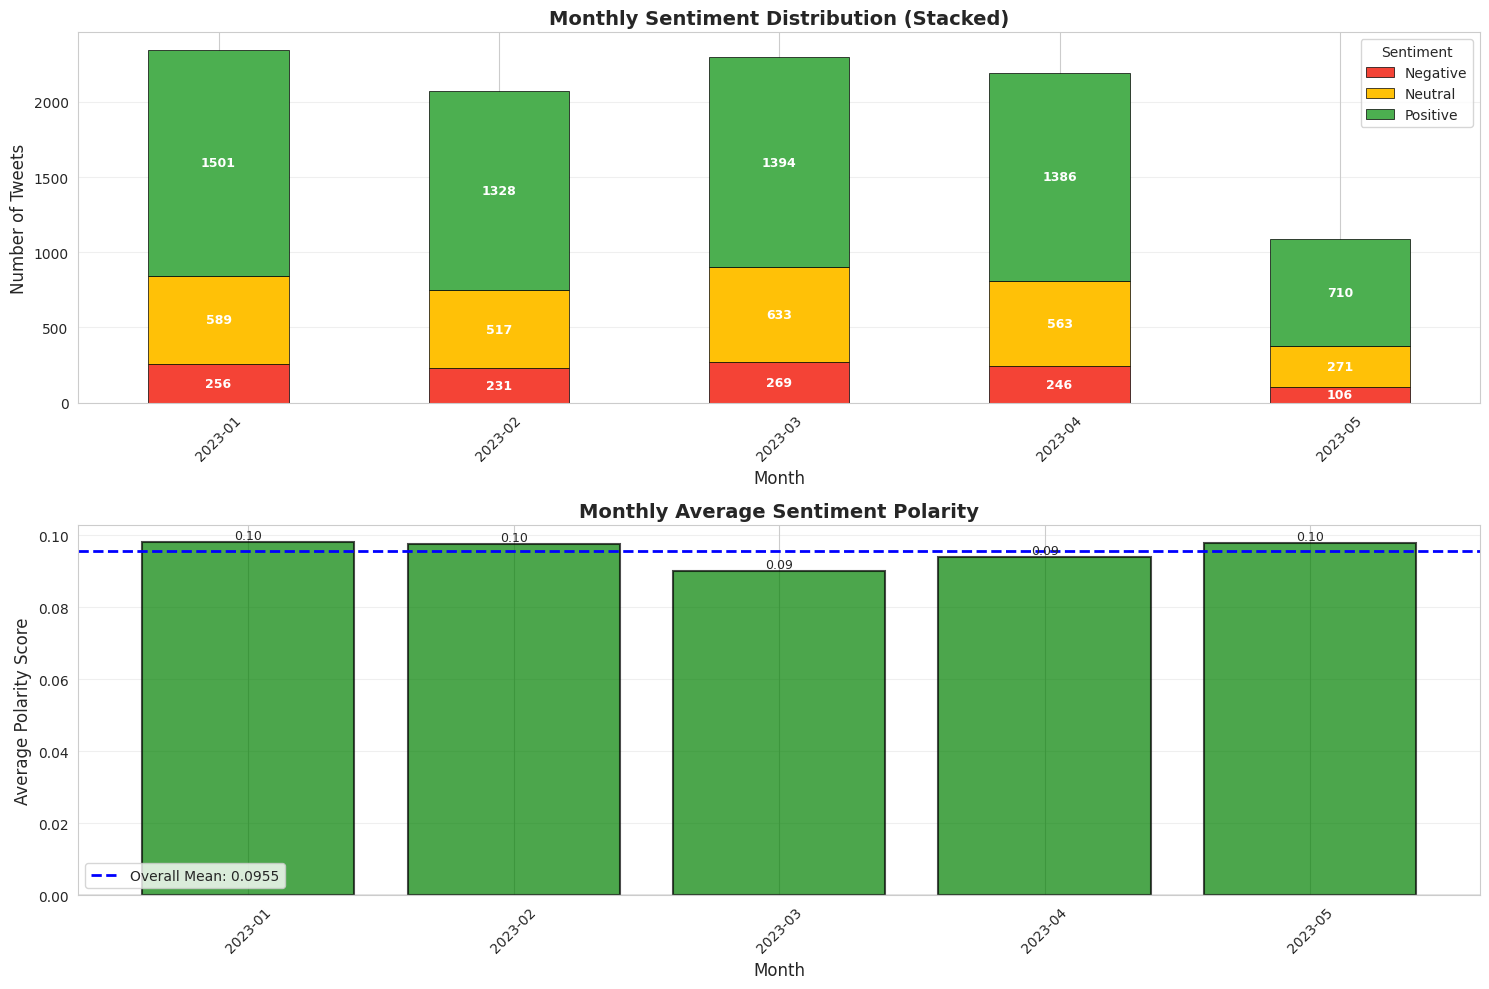

In [ ]:
# Visualize monthly trends
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Stacked bar chart
monthly_sentiment.plot(kind='bar', stacked=True, ax=axes[0],
                      color=['#F44336', '#FFC107', '#4CAF50'],
                      edgecolor='black', linewidth=0.5)
axes[0].set_title('Monthly Sentiment Distribution (Stacked)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Tweets', fontsize=12)
axes[0].legend(title='Sentiment')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Add counts on top of stacked bars
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_y() + height/2., int(height),
                    ha='center', va='center', color='white', fontsize=9, weight='bold')


# Monthly average polarity
month_labels = [str(m) for m in monthly_avg_polarity.index]
x_pos = np.arange(len(month_labels))
colors_polarity = ['green' if p > 0 else 'red' for p in monthly_avg_polarity.values]

bars_polarity = axes[1].bar(x_pos, monthly_avg_polarity.values, color=colors_polarity,
           edgecolor='black', linewidth=1.5, alpha=0.7)
axes[1].axhline(y=0, color='gray', linestyle='-', linewidth=1)
axes[1].axhline(y=monthly_avg_polarity.mean(), color='blue', linestyle='--',
               linewidth=2, label=f'Overall Mean: {monthly_avg_polarity.mean():.4f}')
axes[1].set_title('Monthly Average Sentiment Polarity', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Polarity Score', fontsize=12)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(month_labels, rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Add average polarity values on top of bars
for bar in bars_polarity:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., yval, f'{yval:.2f}', va='bottom' if yval >= 0 else 'top', ha='center', fontsize=9)


plt.tight_layout()
plt.show()

####**TEMPORAL SENTIMENT TRENDS - DAY OF WEEK & HOURLY**


SENTIMENT BY DAY OF WEEK AND HOUR


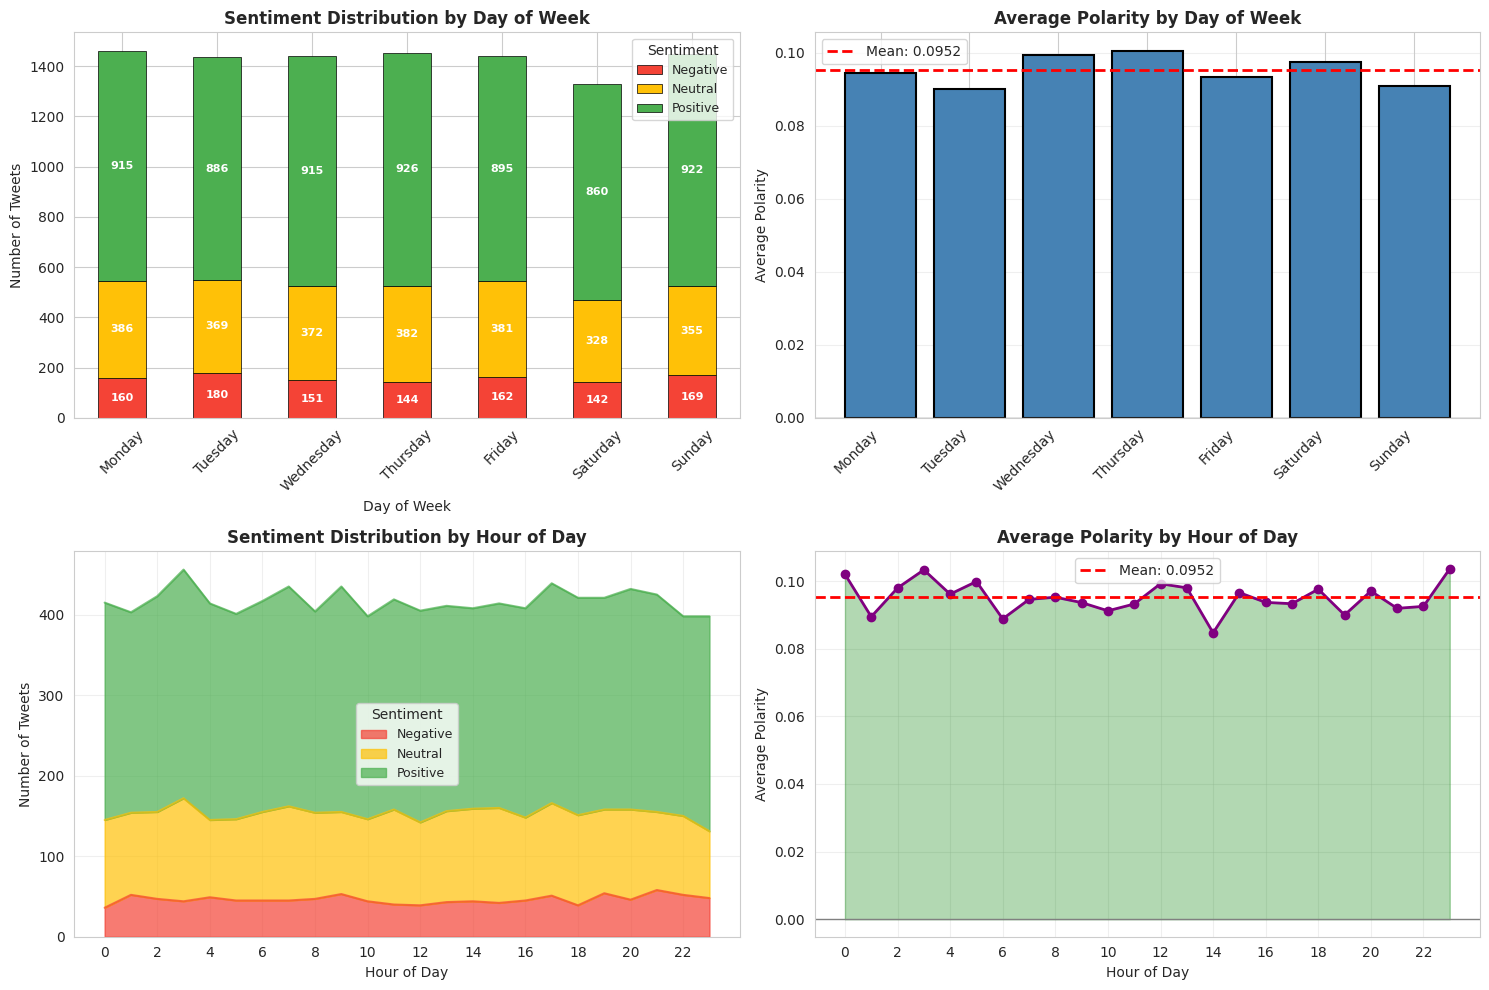

In [ ]:
# ============================================================================
#  TEMPORAL SENTIMENT TRENDS - DAY OF WEEK & HOURLY
# ============================================================================
print("\n" + "="*80)
print("SENTIMENT BY DAY OF WEEK AND HOUR")
print("="*80)

# Day of week analysis
day_sentiment = df.groupby(['DayOfWeek', 'sentiment_label']).size().unstack(fill_value=0)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sentiment = day_sentiment.reindex(day_order, fill_value=0)

# Hourly analysis
hourly_sentiment = df.groupby(['Hour', 'sentiment_label']).size().unstack(fill_value=0)
hourly_avg_polarity = df.groupby('Hour')['polarity'].mean()

# Visualize day of week patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Day of week - stacked bar
day_sentiment.plot(kind='bar', stacked=True, ax=axes[0, 0],
                  color=['#F44336', '#FFC107', '#4CAF50'],
                  edgecolor='black', linewidth=0.5)
axes[0, 0].set_title('Sentiment Distribution by Day of Week', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Number of Tweets')
axes[0, 0].legend(title='Sentiment', fontsize=9)
axes[0, 0].tick_params(axis='x', rotation=45)
# Add counts on top of stacked bars
for container in axes[0, 0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., bar.get_y() + height/2., int(height),
                    ha='center', va='center', color='white', fontsize=8, weight='bold')


# Day of week - average polarity
day_avg_polarity = df.groupby('DayOfWeek')['polarity'].mean().reindex(day_order)
axes[0, 1].bar(range(len(day_avg_polarity)), day_avg_polarity.values,
              color='steelblue', edgecolor='black', linewidth=1.5)
axes[0, 1].axhline(y=0, color='gray', linestyle='-', linewidth=1)
axes[0, 1].axhline(y=day_avg_polarity.mean(), color='red', linestyle='--',
                  linewidth=2, label=f'Mean: {day_avg_polarity.mean():.4f}')
axes[0, 1].set_title('Average Polarity by Day of Week', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(len(day_order)))
axes[0, 1].set_xticklabels(day_order, rotation=45, ha='right')
axes[0, 1].set_ylabel('Average Polarity')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Hourly - stacked area
hourly_sentiment.plot(kind='area', stacked=True, ax=axes[1, 0],
                     color=['#F44336', '#FFC107', '#4CAF50'], alpha=0.7)
axes[1, 0].set_title('Sentiment Distribution by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Tweets')
axes[1, 0].legend(title='Sentiment', fontsize=9)
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3)

# Hourly - average polarity
axes[1, 1].plot(hourly_avg_polarity.index, hourly_avg_polarity.values,
               marker='o', linewidth=2, markersize=6, color='purple')
axes[1, 1].axhline(y=0, color='gray', linestyle='-', linewidth=1)
axes[1, 1].axhline(y=hourly_avg_polarity.mean(), color='red', linestyle='--',
                  linewidth=2, label=f'Mean: {hourly_avg_polarity.mean():.4f}')
axes[1, 1].fill_between(hourly_avg_polarity.index, hourly_avg_polarity.values, 0,
                       where=(hourly_avg_polarity.values > 0), alpha=0.3, color='green')
axes[1, 1].fill_between(hourly_avg_polarity.index, hourly_avg_polarity.values, 0,
                       where=(hourly_avg_polarity.values < 0), alpha=0.3, color='red')
axes[1, 1].set_title('Average Polarity by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Average Polarity')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\nDay of week with highest average polarity:", day_avg_polarity.idxmax(),
      f"({day_avg_polarity.max():.4f})")
print("Day of week with lowest average polarity:", day_avg_polarity.idxmin(),
      f"({day_avg_polarity.min():.4f})")
print(f"\nHour with highest average polarity: {hourly_avg_polarity.idxmax()}:00 ({hourly_avg_polarity.max():.4f})")
print(f"Hour with lowest average polarity: {hourly_avg_polarity.idxmin()}:00 ({hourly_avg_polarity.min():.4f})")


Day of week with highest average polarity: Thursday (0.1006)
Day of week with lowest average polarity: Tuesday (0.0900)

Hour with highest average polarity: 23:00 (0.1037)
Hour with lowest average polarity: 14:00 (0.0847)


####**SENTIMENT AND ENGAGEMENT ANALYSIS**

In [ ]:
# ============================================================================
#  SENTIMENT AND ENGAGEMENT ANALYSIS
# ============================================================================
print("\n" + "="*80)
print(" RELATIONSHIP BETWEEN SENTIMENT AND ENGAGEMENT")
print("="*80)

# Calculate engagement metrics by sentiment
engagement_by_sentiment = df.groupby('sentiment_label').agg({
    'Retweets': ['mean', 'median', 'sum'],
    'Likes': ['mean', 'median', 'sum'],
    'Tweet_ID': 'count'
}).round(2)

print("\nENGAGEMENT METRICS BY SENTIMENT:")
print("-" * 80)
print(engagement_by_sentiment)

# Calculate total engagement
df['total_engagement'] = df['Retweets'] + df['Likes']


 RELATIONSHIP BETWEEN SENTIMENT AND ENGAGEMENT

ENGAGEMENT METRICS BY SENTIMENT:
--------------------------------------------------------------------------------
                Retweets                 Likes                Tweet_ID
                    mean median     sum   mean median     sum    count
sentiment_label                                                       
Negative           50.20   51.0   55618  50.58   50.0   56043     1108
Neutral            49.64   50.0  127711  49.69   50.0  127850     2573
Positive           49.67   49.0  313883  49.91   50.0  315400     6319


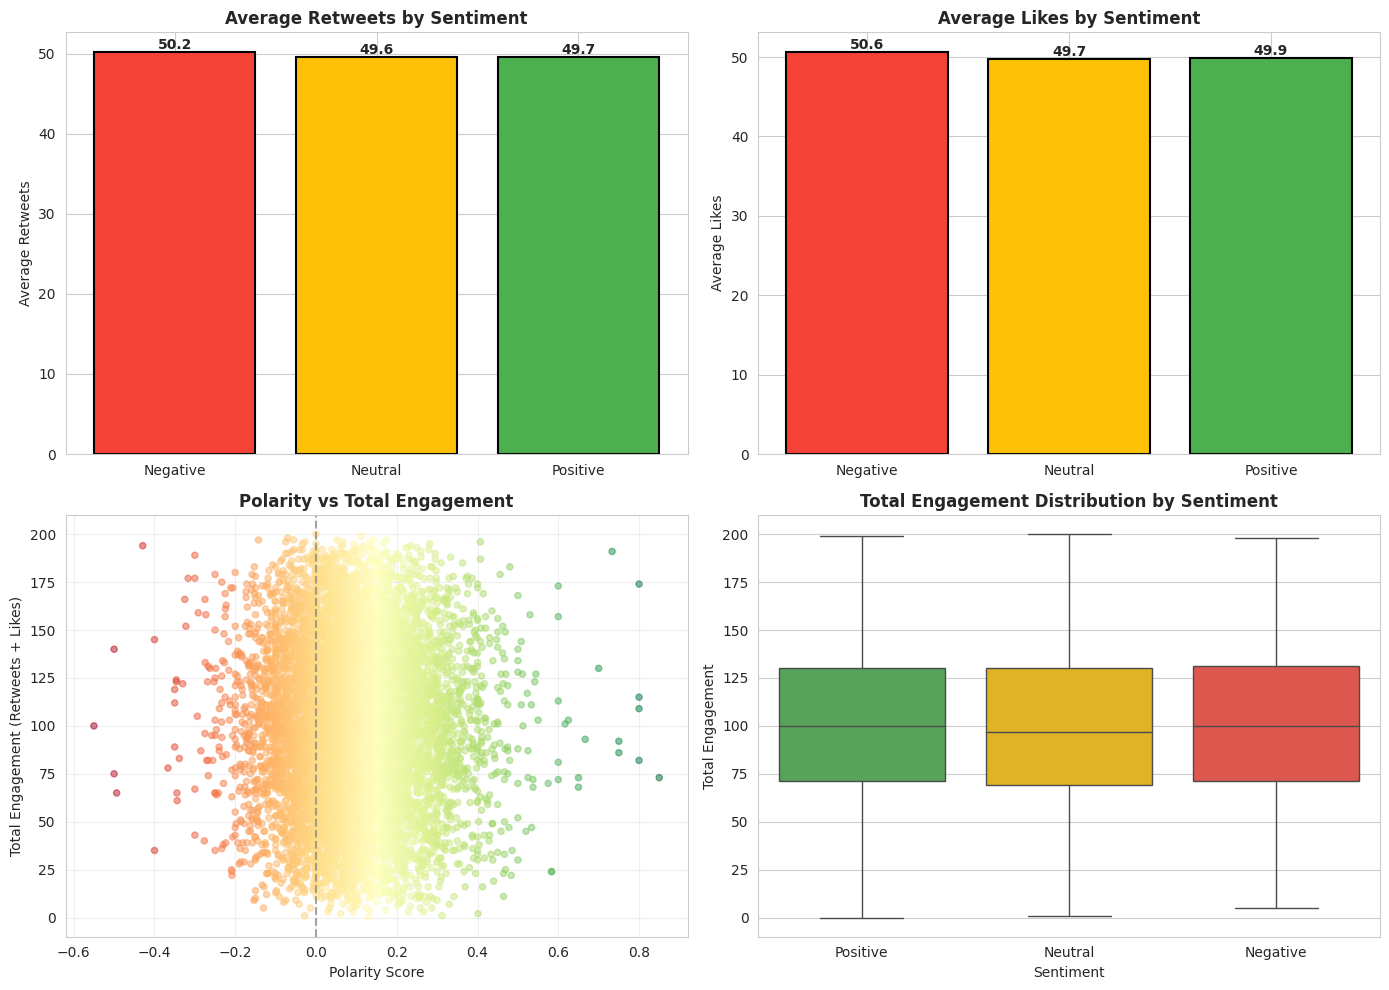

In [ ]:
# Visualize sentiment-engagement relationship
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Average retweets by sentiment
avg_retweets = df.groupby('sentiment_label')['Retweets'].mean()
axes[0, 0].bar(avg_retweets.index, avg_retweets.values,
              color=['#F44336', '#FFC107', '#4CAF50'], edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Average Retweets by Sentiment', fontweight='bold')
axes[0, 0].set_ylabel('Average Retweets')
for i, v in enumerate(avg_retweets.values):
    axes[0, 0].text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# Average likes by sentiment
avg_likes = df.groupby('sentiment_label')['Likes'].mean()
axes[0, 1].bar(avg_likes.index, avg_likes.values,
              color=['#F44336', '#FFC107', '#4CAF50'], edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Average Likes by Sentiment', fontweight='bold')
axes[0, 1].set_ylabel('Average Likes')
for i, v in enumerate(avg_likes.values):
    axes[0, 1].text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# Scatter: Polarity vs Total Engagement
axes[1, 0].scatter(df['polarity'], df['total_engagement'], alpha=0.5, c=df['polarity'],
                  cmap='RdYlGn', s=20)
axes[1, 0].set_title('Polarity vs Total Engagement', fontweight='bold')
axes[1, 0].set_xlabel('Polarity Score')
axes[1, 0].set_ylabel('Total Engagement (Retweets + Likes)')
axes[1, 0].axvline(x=0, color='gray', linestyle='--', alpha=0.7)
axes[1, 0].grid(True, alpha=0.3)

# Box plot: Total engagement by sentiment
sns.boxplot(x='sentiment_label', y='total_engagement', data=df, ax=axes[1, 1],
           palette={'Positive': '#4CAF50', 'Negative': '#F44336', 'Neutral': '#FFC107'})
axes[1, 1].set_title('Total Engagement Distribution by Sentiment', fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Total Engagement')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
#  STATISTICAL SUMMARY OF TOTAL ENGAGEMENT BY SENTIMENT
# ============================================================================
print("\n" + "="*80)
print("STATISTICAL SUMMARY OF TOTAL ENGAGEMENT BY SENTIMENT")
print("="*80)

# Calculate descriptive statistics for total engagement by sentiment
engagement_stats_by_sentiment = df.groupby('sentiment_label')['total_engagement'].describe()

print("\nDescriptive Statistics for Total Engagement by Sentiment:")
print("-" * 80)
print(engagement_stats_by_sentiment)

print("\nInterpretation of the statistics:")
print("- count: Number of tweets in each sentiment category")
print("- mean: Average total engagement (Retweets + Likes)")
print("- std: Standard deviation of total engagement")
print("- min: Minimum total engagement")
print("- 25%: First Quartile (Q1) - 25% of tweets have engagement below this value")
print("- 50%: Median (Q2) - 50% of tweets have engagement below this value")
print("- 75%: Third Quartile (Q3) - 75% of tweets have engagement below this value")
print("- max: Maximum total engagement")


STATISTICAL SUMMARY OF TOTAL ENGAGEMENT BY SENTIMENT

Descriptive Statistics for Total Engagement by Sentiment:
--------------------------------------------------------------------------------
                  count        mean        std  min   25%    50%    75%    max
sentiment_label                                                               
Negative         1108.0  100.777076  41.275310  5.0  71.0  100.0  131.0  198.0
Neutral          2573.0   99.324135  41.637664  1.0  69.0   97.0  130.0  200.0
Positive         6319.0   99.585852  40.931008  0.0  71.0  100.0  130.0  199.0

Interpretation of the statistics:
- count: Number of tweets in each sentiment category
- mean: Average total engagement (Retweets + Likes)
- std: Standard deviation of total engagement
- min: Minimum total engagement
- 25%: First Quartile (Q1) - 25% of tweets have engagement below this value
- 50%: Median (Q2) - 50% of tweets have engagement below this value
- 75%: Third Quartile (Q3) - 75% of tweets have e

In [ ]:
# Correlation analysis
print("\n\nCORRELATION ANALYSIS:")
print("-" * 80)
print(f"Correlation between polarity and retweets: {df['polarity'].corr(df['Retweets']):.4f}")
print(f"Correlation between polarity and likes: {df['polarity'].corr(df['Likes']):.4f}")
print(f"Correlation between polarity and total engagement: {df['polarity'].corr(df['total_engagement']):.4f}")



CORRELATION ANALYSIS:
--------------------------------------------------------------------------------
Correlation between polarity and retweets: -0.0059
Correlation between polarity and likes: 0.0014
Correlation between polarity and total engagement: -0.0032


###**SAVE SENTIMENT ANALYSIS RESULTS**

In [ ]:
# ============================================================================
#  SAVE SENTIMENT ANALYSIS RESULTS
# ============================================================================
print("\n" + "="*80)
print("SAVING SENTIMENT ANALYSIS RESULTS")
print("="*80)

# Save the enhanced dataset
output_filename = 'twitter_dataset_with_sentiment.csv'
df.to_csv(output_filename, index=False)
print(f"✓ Dataset with sentiment analysis saved as '{output_filename}'")

# Save sentiment summary statistics
summary_stats = {
    'total_tweets': len(df),
    'positive_tweets': (df['sentiment_label'] == 'Positive').sum(),
    'negative_tweets': (df['sentiment_label'] == 'Negative').sum(),
    'neutral_tweets': (df['sentiment_label'] == 'Neutral').sum(),
    'avg_polarity': df['polarity'].mean(),
    'median_polarity': df['polarity'].median(),
    'std_polarity': df['polarity'].std(),
    'min_polarity': df['polarity'].min(),
    'max_polarity': df['polarity'].max()
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv('sentiment_summary_statistics.csv', index=False)
print("✓ Summary statistics saved as 'sentiment_summary_statistics.csv'")


SAVING SENTIMENT ANALYSIS RESULTS
✓ Dataset with sentiment analysis saved as 'twitter_dataset_with_sentiment.csv'
✓ Summary statistics saved as 'sentiment_summary_statistics.csv'


###**PART 2 SUMMARY AND KEY FINDINGS**

In [ ]:
# ============================================================================
#  PART 2 SUMMARY AND KEY FINDINGS
# ============================================================================
print("\n" + "="*80)
print("SENTIMENT ANALYSIS - KEY FINDINGS")
print("="*80)

summary = f"""
OVERALL SENTIMENT PROFILE:
--------------------------
✓ Total Tweets Analyzed: {len(df):,}
✓ Positive Tweets: {(df['sentiment_label'] == 'Positive').sum():,} ({(df['sentiment_label'] == 'Positive').sum()/len(df)*100:.1f}%)
✓ Negative Tweets: {(df['sentiment_label'] == 'Negative').sum():,} ({(df['sentiment_label'] == 'Negative').sum()/len(df)*100:.1f}%)
✓ Neutral Tweets: {(df['sentiment_label'] == 'Neutral').sum():,} ({(df['sentiment_label'] == 'Neutral').sum()/len(df)*100:.1f}%)

POLARITY STATISTICS:
--------------------
✓ Average Polarity: {df['polarity'].mean():.4f}
✓ Median Polarity: {df['polarity'].median():.4f}
✓ Standard Deviation: {df['polarity'].std():.4f}
✓ Range: {df['polarity'].min():.4f} to {df['polarity'].max():.4f}

TEMPORAL PATTERNS:
------------------
✓ Most Positive Day: {day_avg_polarity.idxmax()} (polarity: {day_avg_polarity.max():.4f})
✓ Most Negative Day: {day_avg_polarity.idxmin()} (polarity: {day_avg_polarity.min():.4f})
✓ Peak Positive Hour: {hourly_avg_polarity.idxmax()}:00 (polarity: {hourly_avg_polarity.max():.4f})
✓ Peak Negative Hour: {hourly_avg_polarity.idxmin()}:00 (polarity: {hourly_avg_polarity.min():.4f})

SENTIMENT-ENGAGEMENT RELATIONSHIP:
----------------------------------
✓ Correlation (Polarity-Retweets): {df['polarity'].corr(df['Retweets']):.4f}
✓ Correlation (Polarity-Likes): {df['polarity'].corr(df['Likes']):.4f}
✓ Avg Engagement (Positive): {df[df['sentiment_label']=='Positive']['total_engagement'].mean():.2f}
✓ Avg Engagement (Negative): {df[df['sentiment_label']=='Negative']['total_engagement'].mean():.2f}
✓ Avg Engagement (Neutral): {df[df['sentiment_label']=='Neutral']['total_engagement'].mean():.2f}

KEY INSIGHTS:
-------------
→ The discourse is predominantly {sentiment_counts.index[0].lower()} in tone
→ Sentiment varies across time periods, suggesting contextual influences
→ {'Positive' if df['polarity'].corr(df['total_engagement']) > 0 else 'Negative'} correlation between sentiment and engagement
"""

print(summary)


SENTIMENT ANALYSIS - KEY FINDINGS

OVERALL SENTIMENT PROFILE:
--------------------------
✓ Total Tweets Analyzed: 10,000
✓ Positive Tweets: 6,319 (63.2%)
✓ Negative Tweets: 1,108 (11.1%)
✓ Neutral Tweets: 2,573 (25.7%)

POLARITY STATISTICS:
--------------------
✓ Average Polarity: 0.0952
✓ Median Polarity: 0.0896
✓ Standard Deviation: 0.1290
✓ Range: -0.5500 to 0.8500

TEMPORAL PATTERNS:
------------------
✓ Most Positive Day: Thursday (polarity: 0.1006)
✓ Most Negative Day: Tuesday (polarity: 0.0900)
✓ Peak Positive Hour: 23:00 (polarity: 0.1037)
✓ Peak Negative Hour: 14:00 (polarity: 0.0847)

SENTIMENT-ENGAGEMENT RELATIONSHIP:
----------------------------------
✓ Correlation (Polarity-Retweets): -0.0059
✓ Correlation (Polarity-Likes): 0.0014
✓ Avg Engagement (Positive): 99.59
✓ Avg Engagement (Negative): 100.78
✓ Avg Engagement (Neutral): 99.32

KEY INSIGHTS:
-------------
→ The discourse is predominantly positive in tone
→ Sentiment varies across time periods, suggesting contextual

##**PART 3: TOPIC MODELLING**
This section covers:

    - Text preprocessing (stopwords removal, lemmatization)
    - LDA (Latent Dirichlet Allocation) topic modelling
    - Coherence score calculation for optimal topic selection
    - Topic labelling and interpretation
    - Visualization of topics (word clouds, bar charts)
    - Temporal evolution of topics
    - Sentiment distribution across topics

**LOAD DATASET WITH SENTIMENT FROM PART 2**

In [ ]:
# ============================================================================
#  LOAD DATASET WITH SENTIMENT
# ============================================================================
print("\n" + "="*80)
print(" LOADING DATASET WITH SENTIMENT ANALYSIS")
print("="*80)

try:
    df = pd.read_csv('twitter_dataset_with_sentiment.csv')
    print("✓ Dataset loaded successfully!")
    print(f"✓ Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # Ensure proper data types
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = pd.to_datetime(df['Date'])

except FileNotFoundError:
    print("✗ Error: Sentiment dataset not found. Please run Part 2 first.")
    raise


 LOADING DATASET WITH SENTIMENT ANALYSIS
✓ Dataset loaded successfully!
✓ Dataset shape: 10,000 rows × 24 columns


####**TEXT PREPROCESSING**

Comprehensive text preprocessing function.
    
    Steps:
    1. Convert to lowercase
    2. Remove URLs
    3. Remove mentions (@username)
    4. Remove hashtags (#hashtag)
    5. Remove special characters and numbers
    6. Tokenize and lemmatize
    7. Remove stopwords
    8. Filter short tokens
    
    Parameters:
    -----------
    text: str
        Raw text to preprocess
        
    Returns:
    --------
    list: List of cleaned, lemmatised tokens

In [ ]:
# ============================================================================
#  TEXT PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print(" TEXT PREPROCESSING")
print("="*80)

print("\nLoading spaCy English model...")
try:
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    print("✓ spaCy model loaded successfully")
except:
    print("Installing spaCy model...")
    import subprocess
    subprocess.run(['python', '-m', 'spacy', 'download', 'en_core_web_sm'])
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords if needed
custom_stopwords = {'rt', 'http', 'https', 'amp', 'via', 'th', 'like', 'get', 'know'}
stop_words.update(custom_stopwords)

print(f"✓ Stopwords loaded: {len(stop_words)} words")

def preprocess_text(text):
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Process with spaCy for lemmatization
    doc = nlp(text)

    # Lemmatize, remove stopwords, and filter short tokens
    tokens = [
        token.lemma_ for token in doc
        if token.lemma_ not in stop_words
        and len(token.lemma_) > 2
        and token.is_alpha
    ]

    return tokens

print("\nPreprocessing all tweets...")
# Apply preprocessing
df['tokens'] = df['Text'].apply(preprocess_text)

# Check preprocessing results
print("\n✓ Preprocessing complete!")

# Display sample preprocessed tweets
print("\n\nSAMPLE PREPROCESSED TWEETS:")
print("-" * 80)
for i in range(5):
    print(f"\nOriginal: {df.iloc[i]['Text'][:100]}...")
    print(f"Tokens: {df.iloc[i]['tokens'][:15]}")

# Calculate token statistics
df['num_tokens'] = df['tokens'].apply(len)

print("\n\nTOKEN STATISTICS:")
print("-" * 80)
print(f"Average tokens per tweet: {df['num_tokens'].mean():.2f}")
print(f"Median tokens per tweet: {df['num_tokens'].median():.0f}")
print(f"Min tokens: {df['num_tokens'].min()}")
print(f"Max tokens: {df['num_tokens'].max()}")

# Remove tweets with too few tokens
min_tokens = 3
df_filtered = df[df['num_tokens'] >= min_tokens].copy()
print(f"\n✓ Filtered tweets with < {min_tokens} tokens")
print(f"✓ Remaining tweets: {len(df_filtered):,} (removed {len(df) - len(df_filtered):,})")


 TEXT PREPROCESSING

Loading spaCy English model...
✓ spaCy model loaded successfully
✓ Stopwords loaded: 207 words

Preprocessing all tweets...

✓ Preprocessing complete!


SAMPLE PREPROCESSED TWEETS:
--------------------------------------------------------------------------------

Original: Party least receive say or single. Prevent prevent husband affect. May himself cup style evening pro...
Tokens: ['party', 'least', 'receive', 'say', 'single', 'prevent', 'prevent', 'husband', 'affect', 'may', 'cup', 'style', 'evening', 'protect', 'effect']

Original: Hotel still Congress may member staff. Media draw buy fly. Identify on another turn minute would.
Lo...
Tokens: ['hotel', 'still', 'congress', 'may', 'member', 'staff', 'medium', 'draw', 'buy', 'fly', 'identify', 'another', 'turn', 'minute', 'would']

Original: Nice be her debate industry that year. Film where generation push discover partner level.
Nearly mon...
Tokens: ['nice', 'debate', 'industry', 'year', 'film', 'generation', 'p

####**CREATE DICTIONARY AND CORPUS**

In [ ]:
# ============================================================================
# CREATE DICTIONARY AND CORPUS
# ============================================================================
print("\n" + "="*80)
print("CREATING DICTIONARY AND CORPUS")
print("="*80)

# Create dictionary
dictionary = corpora.Dictionary(df_filtered['tokens'])

print(f"\nInitial dictionary size: {len(dictionary)} unique tokens")

# Filter extremes
# no_below: ignore tokens that appear in less than N documents
# no_above: ignore tokens that appear in more than X% of documents
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

print(f"Filtered dictionary size: {len(dictionary)} unique tokens")
print(f"✓ Removed very rare and very common tokens")

# Create corpus (bag-of-words representation)
corpus = [dictionary.doc2bow(tokens) for tokens in df_filtered['tokens']]

print(f"\n✓ Corpus created: {len(corpus)} documents")

# Display sample document representation
print("\n\nSAMPLE DOCUMENT IN BOW FORMAT:")
print("-" * 80)
print("First document tokens:", df_filtered.iloc[0]['tokens'][:10])
print("BOW representation:", corpus[0][:10])



CREATING DICTIONARY AND CORPUS

Initial dictionary size: 868 unique tokens
Filtered dictionary size: 864 unique tokens
✓ Removed very rare and very common tokens

✓ Corpus created: 10000 documents


SAMPLE DOCUMENT IN BOW FORMAT:
--------------------------------------------------------------------------------
First document tokens: ['party', 'least', 'receive', 'say', 'single', 'prevent', 'prevent', 'husband', 'affect', 'may']
BOW representation: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1)]


####**DETERMINE OPTIMAL NUMBER OF TOPICS (COHERENCE SCORE)**


DETERMINING OPTIMAL NUMBER OF TOPICS

Calculating coherence scores for different numbers of topics...

Testing 3 topics... Coherence: 0.2399

Testing 4 topics... Coherence: 0.2488

Testing 5 topics... Coherence: 0.2506

Testing 6 topics... Coherence: 0.2542

Testing 7 topics... Coherence: 0.2522

Testing 8 topics... Coherence: 0.2535

Testing 9 topics... Coherence: 0.2603

Testing 10 topics... Coherence: 0.2554


COHERENCE SCORE RESULTS:
--------------------------------------------------------------------------------
Num Topics   Coherence Score     
--------------------------------------------------------------------------------
3            0.2399              
4            0.2488              
5            0.2506              
6            0.2542              
7            0.2522              
8            0.2535              
9            0.2603               ← OPTIMAL
10           0.2554              

✓ Optimal number of topics: 9
✓ Best coherence score: 0.2603


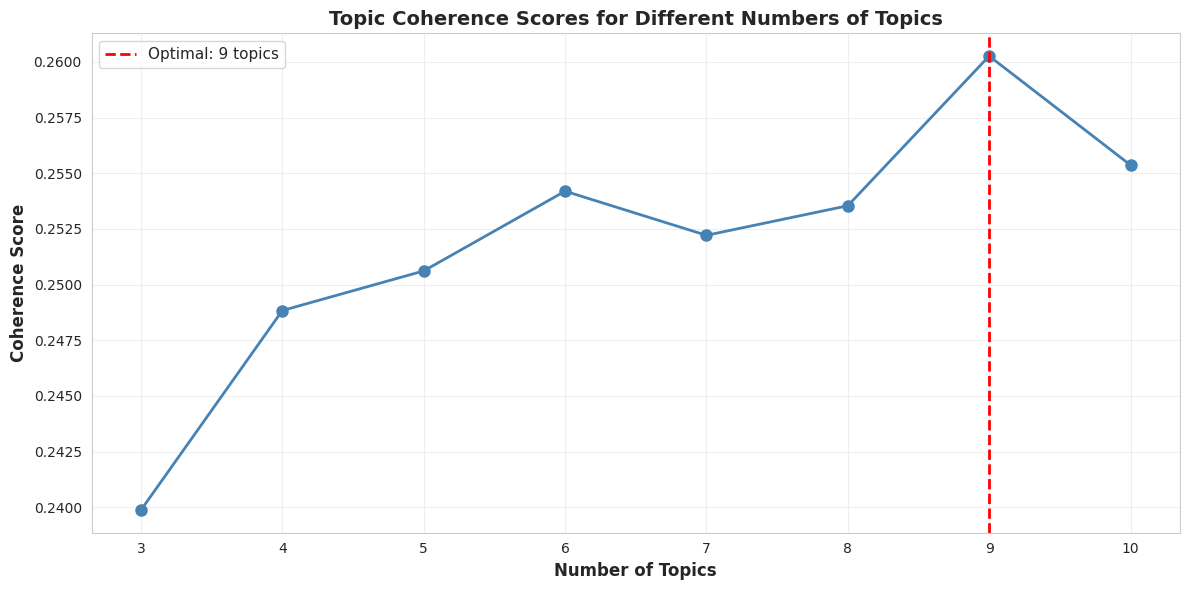

In [ ]:
# ============================================================================
#  DETERMINE OPTIMAL NUMBER OF TOPICS (COHERENCE SCORE)
# ============================================================================
print("\n" + "="*80)
print("DETERMINING OPTIMAL NUMBER OF TOPICS")
print("="*80)

print("\nCalculating coherence scores for different numbers of topics...")

# Test different numbers of topics
topic_range = range(3, 11)  # Test 3 to 10 topics
coherence_scores = []

for num_topics in topic_range:
    print(f"\nTesting {num_topics} topics...", end=" ")

    # Train LDA model
    lda_temp = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )

    # Calculate coherence score
    coherence_model = CoherenceModel(
        model=lda_temp,
        texts=df_filtered['tokens'],
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    print(f"Coherence: {coherence_score:.4f}")

# Find optimal number of topics
optimal_idx = coherence_scores.index(max(coherence_scores))
optimal_num_topics = list(topic_range)[optimal_idx]

print("\n\nCOHERENCE SCORE RESULTS:")
print("-" * 80)
print(f"{'Num Topics':<12} {'Coherence Score':<20}")
print("-" * 80)
for num, score in zip(topic_range, coherence_scores):
    marker = " ← OPTIMAL" if num == optimal_num_topics else ""
    print(f"{num:<12} {score:<20.4f}{marker}")

print(f"\n✓ Optimal number of topics: {optimal_num_topics}")
print(f"✓ Best coherence score: {max(coherence_scores):.4f}")

# Visualize coherence scores
plt.figure(figsize=(12, 6))
plt.plot(list(topic_range), coherence_scores, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.axvline(x=optimal_num_topics, color='red', linestyle='--', linewidth=2,
            label=f'Optimal: {optimal_num_topics} topics')
plt.xlabel('Number of Topics', fontsize=12, fontweight='bold')
plt.ylabel('Coherence Score', fontsize=12, fontweight='bold')
plt.title('Topic Coherence Scores for Different Numbers of Topics', fontsize=14, fontweight='bold')
plt.xticks(list(topic_range))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


###**TRAIN FINAL Latent Dirichlet Allocation (LDA) MODEL**

In [ ]:
# ============================================================================
#  TRAIN FINAL LDA MODEL
# ============================================================================
print("\n" + "="*80)
print("TRAINING FINAL LDA MODEL")
print("="*80)

print(f"\nTraining LDA model with {optimal_num_topics} topics...")

# Train final model with optimal number of topics
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=optimal_num_topics,
    random_state=42,
    passes=15,  # More passes for final model
    iterations=400,
    alpha='auto',
    eta='auto',
    per_word_topics=True
)

print("✓ LDA model training complete!")

# Calculate final coherence
final_coherence = CoherenceModel(
    model=lda_model,
    texts=df_filtered['tokens'],
    dictionary=dictionary,
    coherence='c_v'
).get_coherence()

print(f"✓ Final model coherence score: {final_coherence:.4f}")


TRAINING FINAL LDA MODEL

Training LDA model with 9 topics...
✓ LDA model training complete!
✓ Final model coherence score: 0.2559


###**EXTRACT AND DISPLAY TOPICS**

In [ ]:
# ============================================================================
# EXTRACT AND DISPLAY TOPICS
# ============================================================================
print("\n" + "="*80)
print("IDENTIFIED TOPICS AND KEYWORDS")
print("="*80)

print("\nTop keywords for each topic:")
print("-" * 80)

# Store topics for later use
topics_dict = {}

for idx, topic in lda_model.show_topics(num_topics=-1, num_words=15, formatted=False):
    topics_dict[idx] = topic
    words = [word for word, prob in topic]
    probs = [prob for word, prob in topic]

    print(f"\nTopic {idx}:")
    print(f"  Keywords: {', '.join(words[:10])}")
    print(f"  Top word weights: {[f'{p:.3f}' for p in probs[:5]]}")


IDENTIFIED TOPICS AND KEYWORDS

Top keywords for each topic:
--------------------------------------------------------------------------------

Topic 0:
  Keywords: year, girl, thank, reveal, speech, instead, society, former, watch, poor
  Top word weights: ['0.005', '0.004', '0.004', '0.004', '0.004']

Topic 1:
  Keywords: fund, health, parent, true, call, accord, fly, impact, yard, present
  Top word weights: ['0.005', '0.005', '0.004', '0.004', '0.004']

Topic 2:
  Keywords: well, civil, sure, almost, practice, doctor, region, great, audience, vote
  Top word weights: ['0.005', '0.003', '0.003', '0.003', '0.003']

Topic 3:
  Keywords: arm, main, case, level, government, rich, start, man, talk, remain
  Top word weights: ['0.005', '0.005', '0.005', '0.005', '0.005']

Topic 4:
  Keywords: dream, open, treat, well, drive, surface, scene, room, coach, throughout
  Top word weights: ['0.005', '0.005', '0.004', '0.004', '0.004']

Topic 5:
  Keywords: include, history, rate, power, wear, l

###**MANUAL TOPIC LABELING**

Suggest a topic label based on top keywords. This is a helper function - manual review is still needed.

In [ ]:
# ============================================================================
# TOPIC LABELING
# ============================================================================
print("\n" + "="*80)
print("TOPIC LABELING (Based on Keywords)")
print("="*80)

# This function suggests labels by analyzing the top words of each topic.
# You MUST customize the if/elif conditions based on the actual keywords you see.
def suggest_topic_label(topic_words):
    # Create a set of the top 10 words for fast lookups
    keywords = set(topic_words[:10])
    if 'government' in keywords or 'congress' in keywords:
        return "Politics & Governance"
    elif 'career' in keywords or 'industry' in keywords or 'staff' in keywords:
        return "Business & Professional Life"
    elif 'family' in keywords or 'husband' in keywords or 'party' in keywords:
        return "Social & Personal Life"
    elif 'money' in keywords or 'cost' in keywords or 'buy' in keywords:
        return "Economics & Finance"
    elif 'film' in keywords or 'style' in keywords or 'media' in keywords:
        return "Arts & Media"
    elif any(word in keywords for word in ['education', 'school', 'learn', 'study', 'student']):
        return "Education & Learning"
    else:
        # Returns the top 3 words as a default label
        return f"General: {', '.join(words[:3])}" # Use 'words' instead of 'topic_words'


# ============================================================================
# 1. GENERATE SUGGESTED LABELS
# ============================================================================
print("\nSUGGESTED TOPIC LABELS (starting point):")
print("-" * 80)

suggested_labels = {}
for idx, topic in topics_dict.items():
    words = [word for word, prob in topic]
    suggested_label = suggest_topic_label(words)
    suggested_labels[idx] = suggested_label
    print(f"Topic {idx}: {suggested_label}")
    print(f"  Keywords: {', '.join(words[:8])}")

# ============================================================================
# 2. FINALIZE LABELS MANUALLY
# ============================================================================
print("\n\nFINAL TOPIC LABELS")
print("-" * 80)

# Use the suggestions above as a guide to create your final, polished labels.
# This gives you full control over the final names.
# Based on the analysis of keywords from the previous step:
topic_labels = {
    0: "Social & Personal Life",
    1: "Politics & Commerce",
    2: "Business, Media & Finance",
    3: "Career & Life Events",
    4: "Government & Family Economics",
    5: "General Discussion",
    6: "Education & Learning",
    7: "General Discussion",
}


# Adjust if the number of topics from your model doesn't match your manual list.
# This ensures every topic gets a label.
for i in range(optimal_num_topics):
    if i not in topic_labels:
        topic_labels[i] = suggested_labels.get(i, f"Unlabeled Topic {i}")

# Print the final, clean list of topic labels
for idx, label in topic_labels.items():
    print(f"Topic {idx}: {label}")


TOPIC LABELING (Based on Keywords)

SUGGESTED TOPIC LABELS (starting point):
--------------------------------------------------------------------------------
Topic 0: Social & Personal Life
  Keywords: party, husband, affect, style
Topic 1: Politics & Governance
  Keywords: congress, member, staff, buy
Topic 2: Business & Professional Life
  Keywords: industry, money, film, generation
Topic 3: Business & Professional Life
  Keywords: career, situation, explain, occur
Topic 4: Politics & Governance
  Keywords: government, approach, family, cost


FINAL TOPIC LABELS
--------------------------------------------------------------------------------
Topic 0: Social & Personal Life
Topic 1: Politics & Commerce
Topic 2: Business, Media & Finance
Topic 3: Career & Life Events
Topic 4: Government & Family Economics
Topic 5: General Discussion
Topic 6: Education & Learning
Topic 7: General Discussion


###**ASSIGN DOMINANT TOPIC TO EACH TWEET**

Get the dominant topic for a document.
    
    Parameters:
    -----------
    lda_model: LdaModel
        Trained LDA model
    bow: list
        Bag-of-words representation of document
        
    Returns:
    --------
    tuple: (topic_id, probability)

In [ ]:
# ============================================================================
#  ASSIGN DOMINANT TOPIC TO EACH TWEET
# ============================================================================
print("\n" + "="*80)
print("ASSIGNING DOMINANT TOPICS TO TWEETS")
print("="*80)

def get_dominant_topic(lda_model, bow):
    topic_probs = lda_model.get_document_topics(bow)
    if topic_probs:
        dominant = max(topic_probs, key=lambda x: x[1])
        return dominant[0], dominant[1]
    else:
        return None, 0.0

print("\nAssigning dominant topics...")

# Get dominant topic for each document
dominant_topics = [get_dominant_topic(lda_model, bow) for bow in corpus]

df_filtered['dominant_topic'] = [topic for topic, prob in dominant_topics]
df_filtered['topic_probability'] = [prob for topic, prob in dominant_topics]
df_filtered['dominant_topic_name'] = df_filtered['dominant_topic'].map(topic_labels)

print("✓ Dominant topics assigned!")

# Display sample results
print("\n\nSAMPLE TOPIC ASSIGNMENTS:")
print("-" * 80)
sample_cols = ['Text', 'dominant_topic', 'dominant_topic_name', 'topic_probability']
print(df_filtered[sample_cols].head(10).to_string())


ASSIGNING DOMINANT TOPICS TO TWEETS

Assigning dominant topics...
✓ Dominant topics assigned!


SAMPLE TOPIC ASSIGNMENTS:
--------------------------------------------------------------------------------
                                                                                                                                                                                                                                                                                   Text  dominant_topic        dominant_topic_name  topic_probability
0                                    Party least receive say or single. Prevent prevent husband affect. May himself cup style evening protect. Effect another themselves stage perform.\nPossible try tax share style television with. Successful much sell development economy effect.               2  Business, Media & Finance           0.719936
1                                                                                       Hotel still Congress may

###**TOPIC FREQUENCY ANALYSIS**

In [ ]:
# ============================================================================
# TOPIC FREQUENCY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print(" TOPIC FREQUENCY ANALYSIS")
print("="*80)

# Count tweets per topic
topic_counts = df_filtered['dominant_topic_name'].value_counts()

print("\nTOPIC DISTRIBUTION:")
print("-" * 80)
print(f"{'Topic':<35} {'Count':<10} {'Percentage':<12} {'Avg Probability':<18}")
print("-" * 80)

for topic_name, count in topic_counts.items():
    percentage = (count / len(df_filtered)) * 100
    avg_prob = df_filtered[df_filtered['dominant_topic_name'] == topic_name]['topic_probability'].mean()
    print(f"{topic_name:<35} {count:<10} {percentage:>5.2f}%      {avg_prob:>6.4f}")


 TOPIC FREQUENCY ANALYSIS

TOPIC DISTRIBUTION:
--------------------------------------------------------------------------------
Topic                               Count      Percentage   Avg Probability   
--------------------------------------------------------------------------------
General Discussion                  2396       23.96%      0.6080
Business, Media & Finance           1294       12.94%      0.6160
Social & Personal Life              1235       12.35%      0.6030
Politics & Commerce                 1217       12.17%      0.6054
Education & Learning                1037       10.37%      0.6039
Career & Life Events                912         9.12%      0.5767
Government & Family Economics       879         8.79%      0.5836


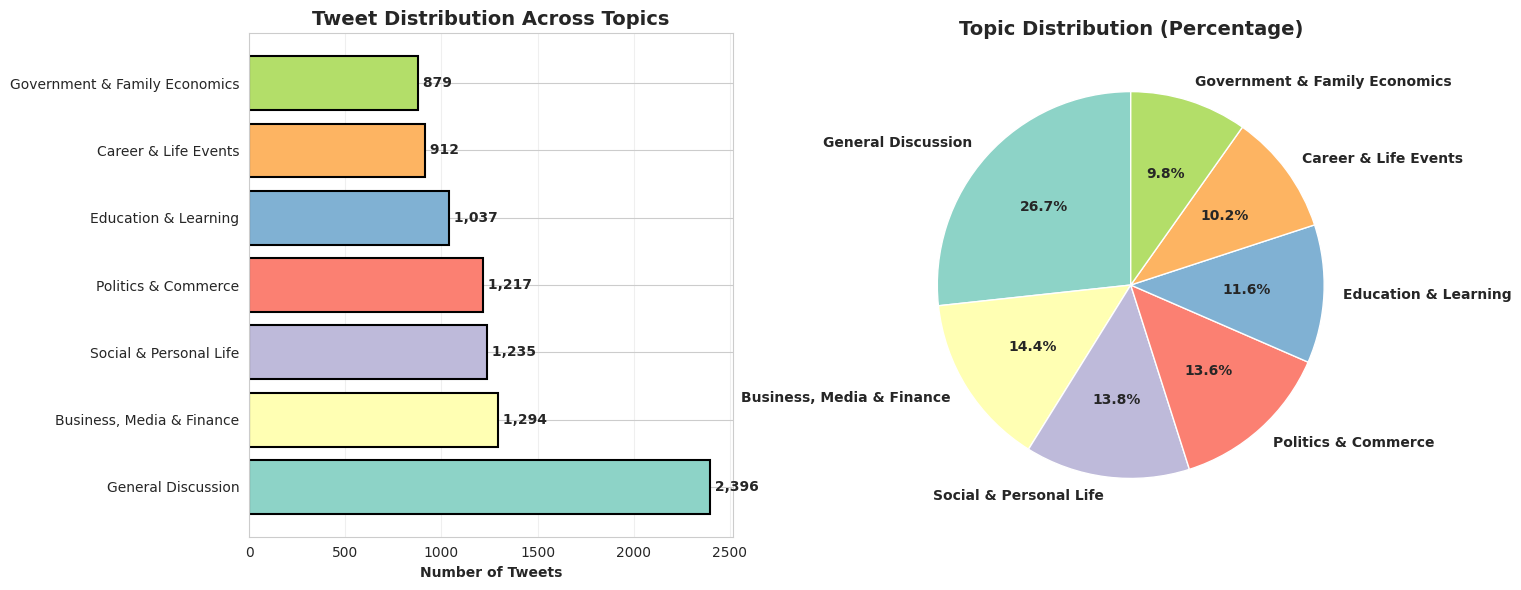

In [ ]:
# Visualize topic distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
colors = plt.cm.Set3(range(len(topic_counts)))
axes[0].barh(range(len(topic_counts)), topic_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(topic_counts)))
axes[0].set_yticklabels(topic_counts.index)
axes[0].set_xlabel('Number of Tweets', fontweight='bold')
axes[0].set_title('Tweet Distribution Across Topics', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Add count labels
for i, count in enumerate(topic_counts.values):
    axes[0].text(count, i, f' {count:,}', va='center', fontweight='bold')

# Pie chart
axes[1].pie(topic_counts.values, labels=topic_counts.index, autopct='%1.1f%%',
           startangle=90, colors=colors, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Topic Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

###**VISUALIZE TOPICS - WORD CLOUDS**


GENERATING WORD CLOUDS FOR EACH TOPIC

Creating word clouds...


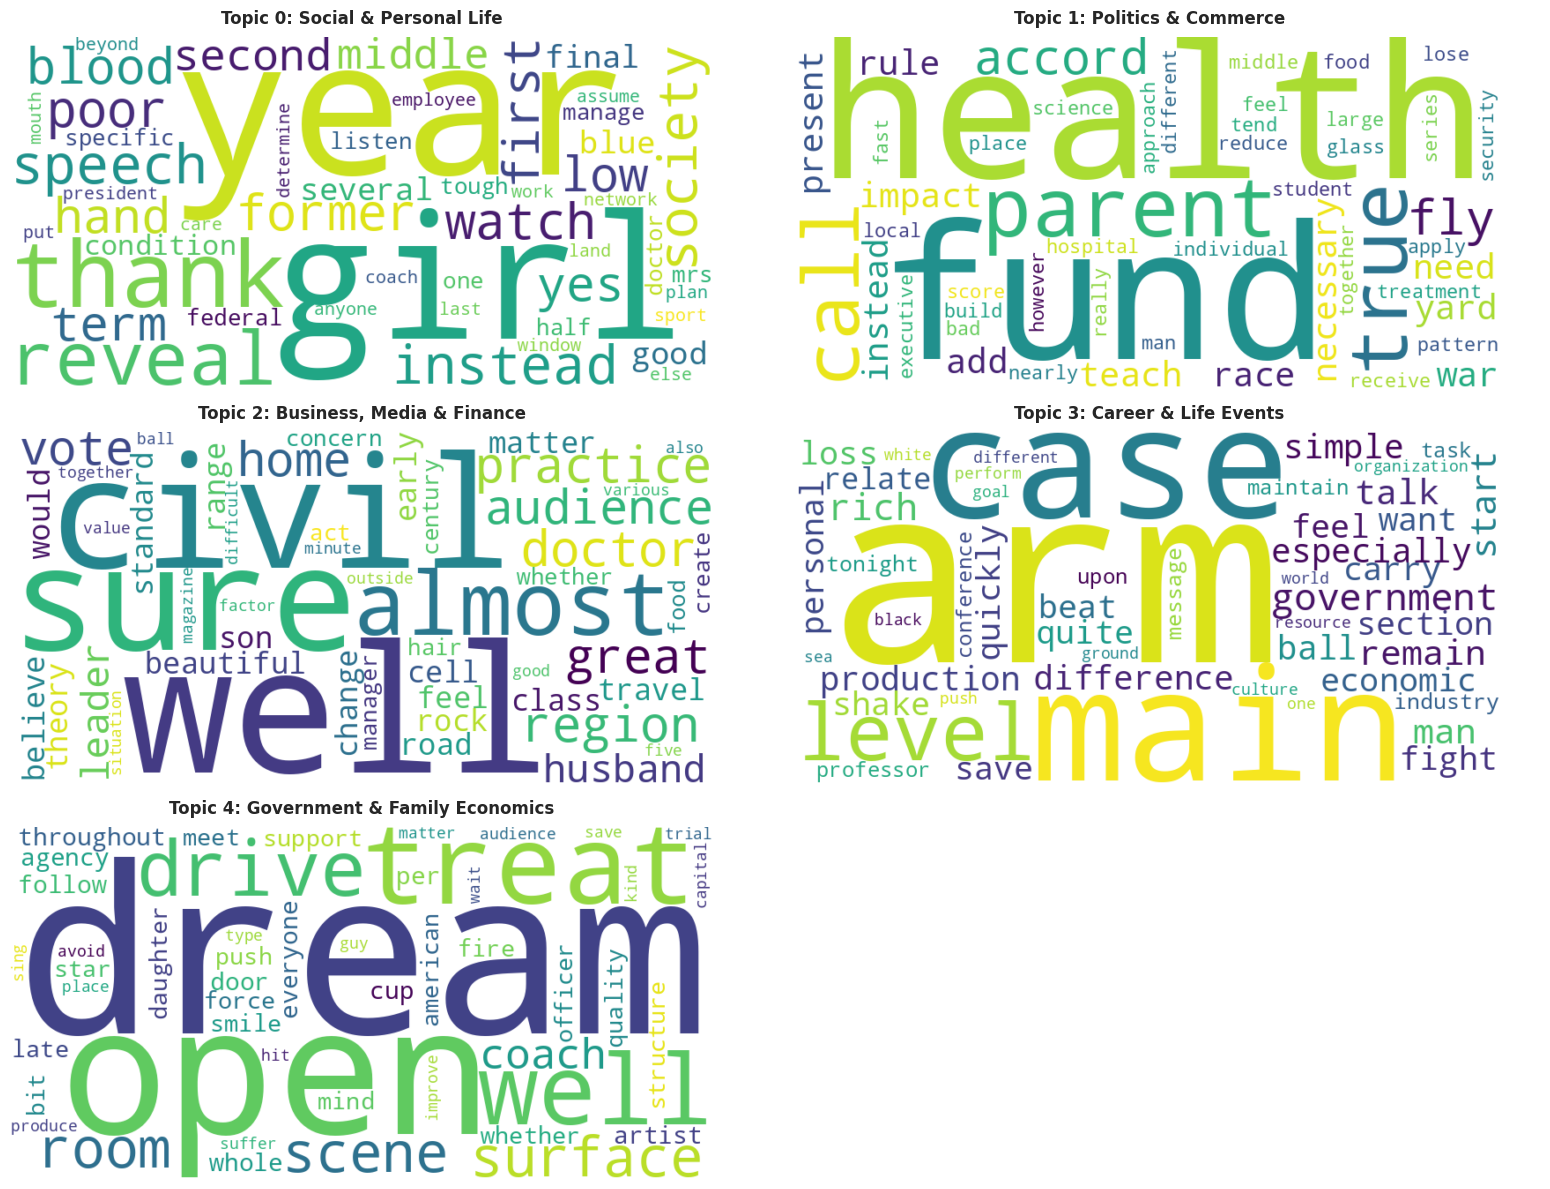

✓ Word clouds generated!


In [ ]:
# ============================================================================
#  VISUALIZE TOPICS - WORD CLOUDS
# ============================================================================
print("\n" + "="*80)
print("GENERATING WORD CLOUDS FOR EACH TOPIC")
print("="*80)

print("\nCreating word clouds...")

# Calculate number of rows needed for subplots
n_topics = optimal_num_topics
n_cols = 2
n_rows = (n_topics + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() if n_topics > 1 else [axes]

for idx in range(n_topics):
    # Get word frequencies for this topic
    topic_words = dict(lda_model.show_topic(idx, topn=50))

    # Create word cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=50,
        relative_scaling=0.5,
        min_font_size=10
    ).generate_from_frequencies(topic_words)

    # Plot
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'Topic {idx}: {topic_labels[idx]}',
                       fontsize=12, fontweight='bold', pad=10)

# Hide extra subplots if any
for idx in range(n_topics, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✓ Word clouds generated!")

###**VISUALIZE TOPICS - BAR CHARTS**


GENERATING BAR CHARTS FOR TOP KEYWORDS


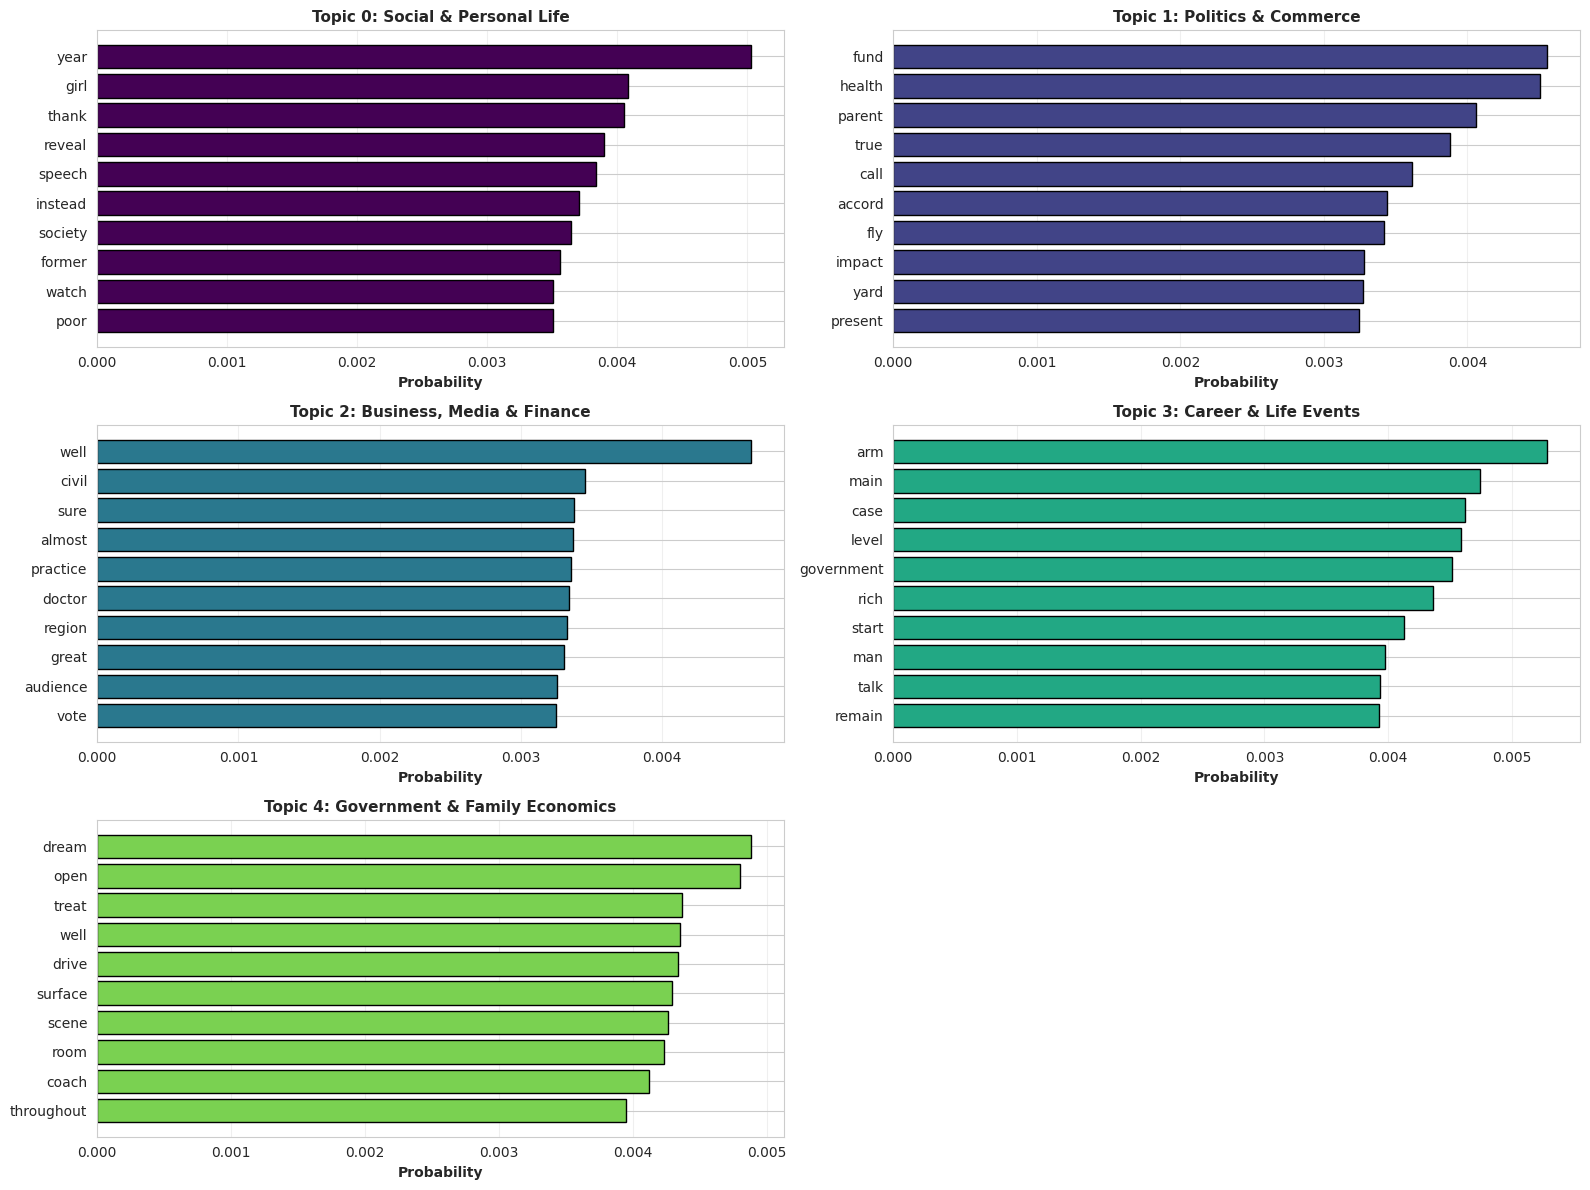

In [ ]:
# ============================================================================
#  VISUALIZE TOPICS - BAR CHARTS
# ============================================================================
print("\n" + "="*80)
print("GENERATING BAR CHARTS FOR TOP KEYWORDS")
print("="*80)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() if n_topics > 1 else [axes]

for idx in range(n_topics):
    # Get top 10 words and their weights
    topic_words = lda_model.show_topic(idx, topn=10)
    words = [word for word, prob in topic_words]
    probs = [prob for word, prob in topic_words]

    # Create bar chart
    y_pos = np.arange(len(words))
    axes[idx].barh(y_pos, probs, color=plt.cm.viridis(idx/n_topics), edgecolor='black')
    axes[idx].set_yticks(y_pos)
    axes[idx].set_yticklabels(words)
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel('Probability', fontweight='bold')
    axes[idx].set_title(f'Topic {idx}: {topic_labels[idx]}', fontweight='bold', fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='x')

# Hide extra subplots
for idx in range(n_topics, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

###**TEMPORAL EVOLUTION OF TOPICS**


TEMPORAL EVOLUTION OF TOPICS

Analyzing topic evolution over 135 days...


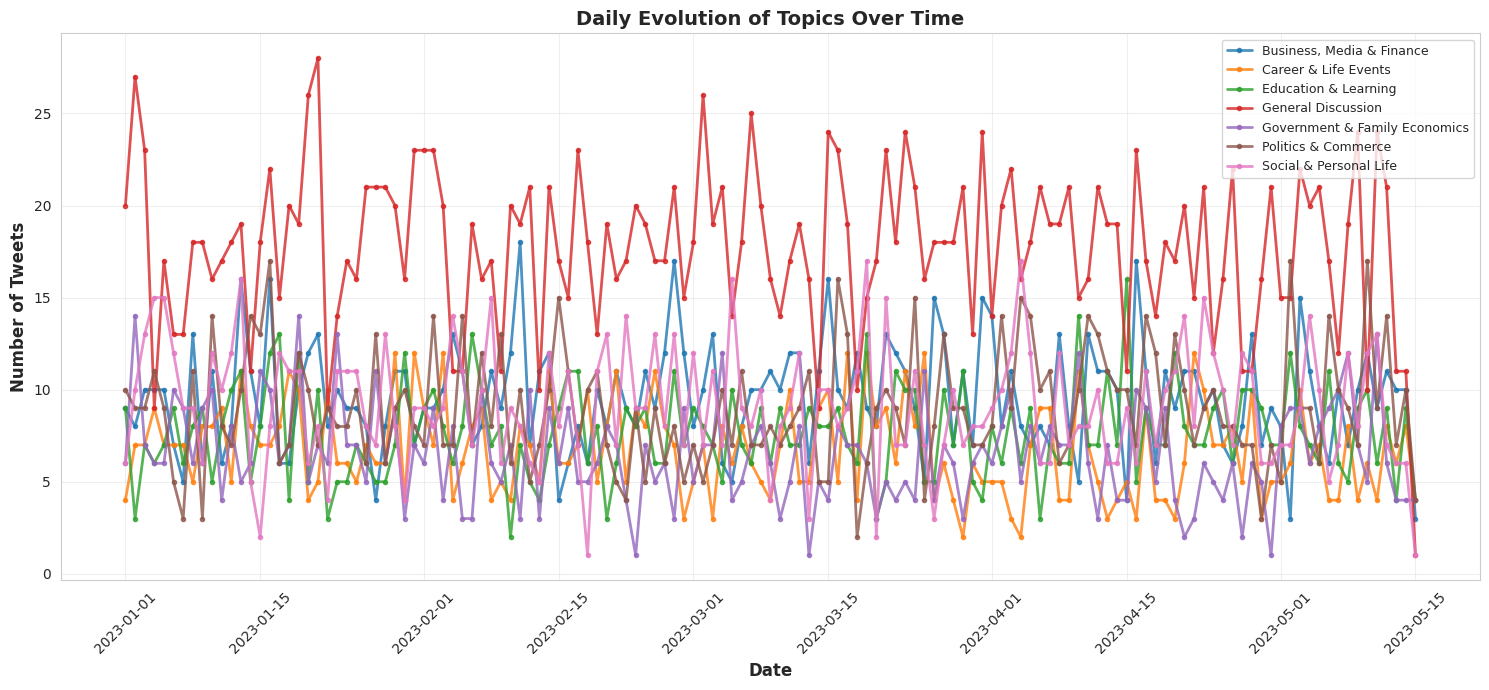


Monthly topic trends


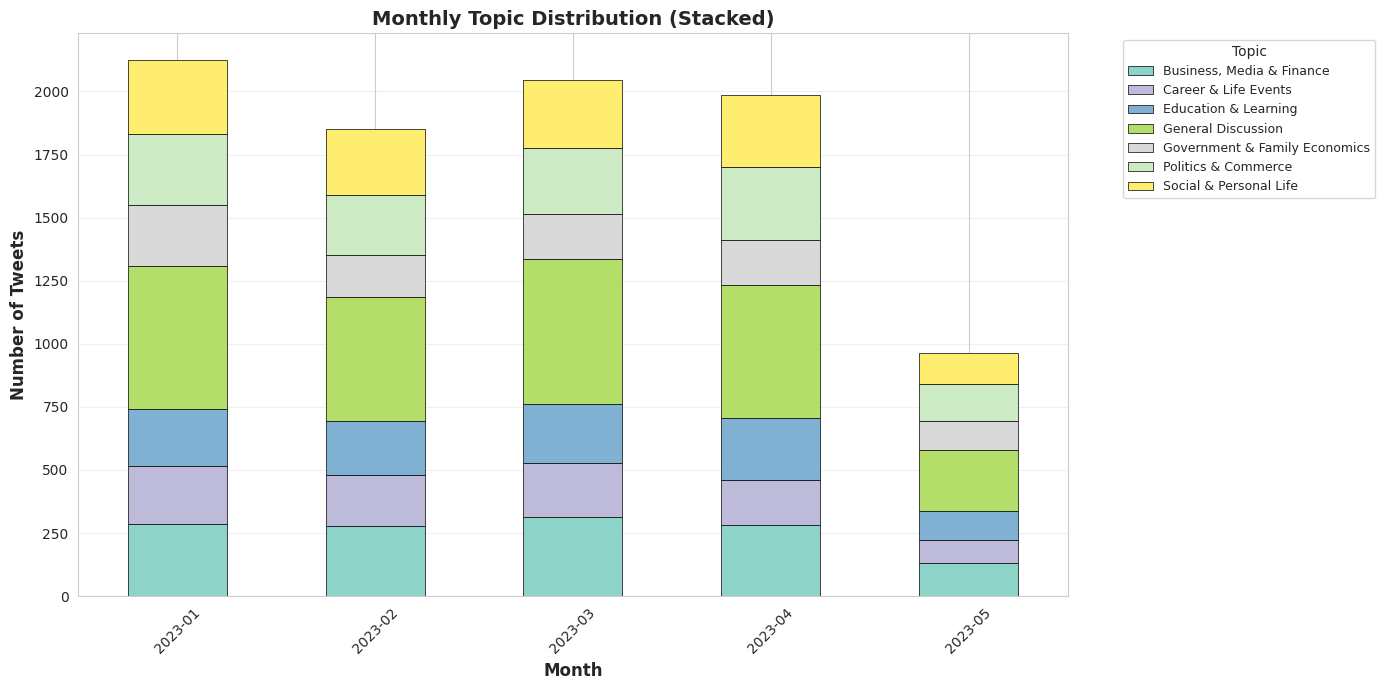

✓ Temporal evolution visualized!


In [ ]:
# ============================================================================
#  TEMPORAL EVOLUTION OF TOPICS
# ============================================================================
print("\n" + "="*80)
print("TEMPORAL EVOLUTION OF TOPICS")
print("="*80)

# Daily topic trends
daily_topics = df_filtered.groupby([df_filtered['Date'], 'dominant_topic_name']).size().unstack(fill_value=0)

print(f"\nAnalyzing topic evolution over {len(daily_topics)} days...")

# Plot daily topic trends
plt.figure(figsize=(15, 7))
for topic in daily_topics.columns:
    plt.plot(daily_topics.index, daily_topics[topic], marker='o',
            markersize=3, linewidth=2, label=topic, alpha=0.8)

plt.title('Daily Evolution of Topics Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMonthly topic trends")
# Monthly topic trends
df_filtered['Month_Year'] = df_filtered['Timestamp'].dt.to_period('M')
monthly_topics = df_filtered.groupby(['Month_Year', 'dominant_topic_name']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
monthly_topics.plot(kind='bar', stacked=True, ax=plt.gca(),
                   colormap='Set3', edgecolor='black', linewidth=0.5)
plt.title('Monthly Topic Distribution (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize=12, fontweight='bold')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("✓ Temporal evolution visualized!")

###**SENTIMENT DISTRIBUTION PER TOPIC**

In [ ]:
# ============================================================================
#  SENTIMENT DISTRIBUTION PER TOPIC
# ============================================================================
print("\n" + "="*80)
print("SENTIMENT DISTRIBUTION ACROSS TOPICS")
print("="*80)

# Cross-tabulation of topic and sentiment
topic_sentiment = df_filtered.groupby(['dominant_topic_name', 'sentiment_label']).size().unstack(fill_value=0)

print("\nSENTIMENT FREQUENCY PER TOPIC:")
print("-" * 80)
print(topic_sentiment)

# Calculate sentiment percentages per topic
topic_sentiment_pct = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0) * 100

print("\n\nSENTIMENT PERCENTAGE PER TOPIC:")
print("-" * 80)
print(topic_sentiment_pct.round(2))
# Average polarity per topic
topic_polarity = df_filtered.groupby('dominant_topic_name')['polarity'].agg(['mean', 'median', 'std'])
topic_polarity = topic_polarity.sort_values('mean', ascending=False)

print("\n\nAVERAGE POLARITY BY TOPIC:")
print("-" * 80)
print(topic_polarity.round(4))


SENTIMENT DISTRIBUTION ACROSS TOPICS

SENTIMENT FREQUENCY PER TOPIC:
--------------------------------------------------------------------------------
sentiment_label                Negative  Neutral  Positive
dominant_topic_name                                       
Business, Media & Finance           140      308       846
Career & Life Events                 94      248       570
Education & Learning                 95      271       671
General Discussion                  246      608      1542
Government & Family Economics        91      204       584
Politics & Commerce                 142      336       739
Social & Personal Life              161      340       734


SENTIMENT PERCENTAGE PER TOPIC:
--------------------------------------------------------------------------------
sentiment_label                Negative  Neutral  Positive
dominant_topic_name                                       
Business, Media & Finance         10.82    23.80     65.38
Career & Life Events      

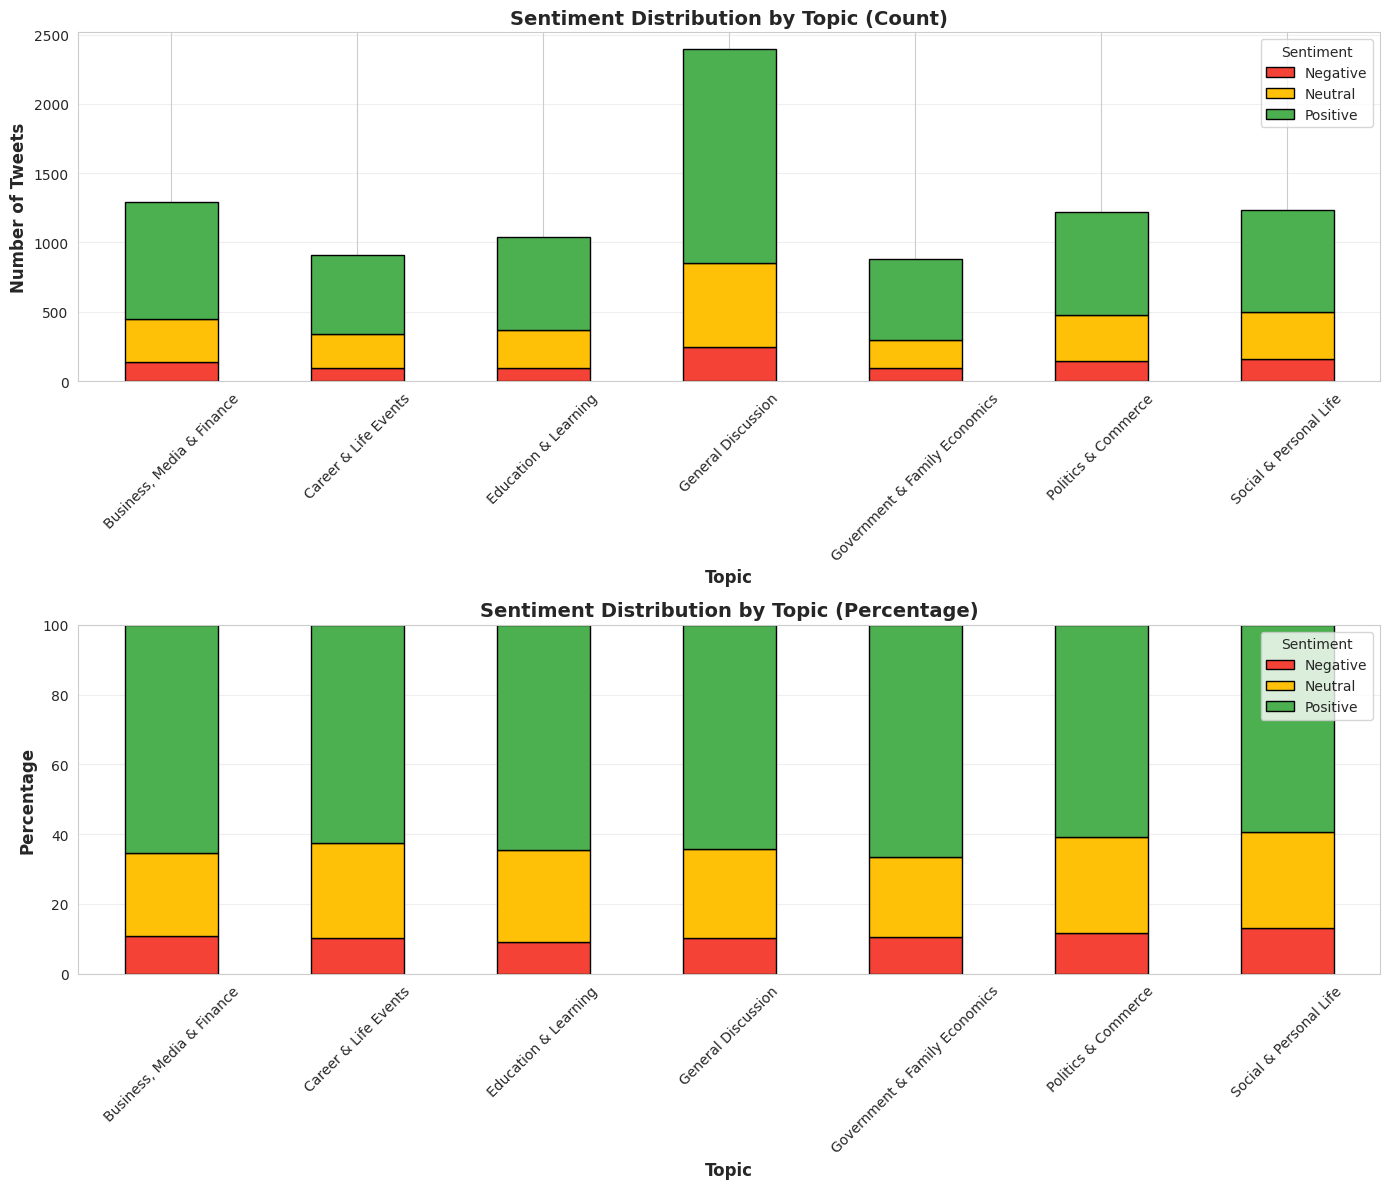



AVERAGE POLARITY BY TOPIC:


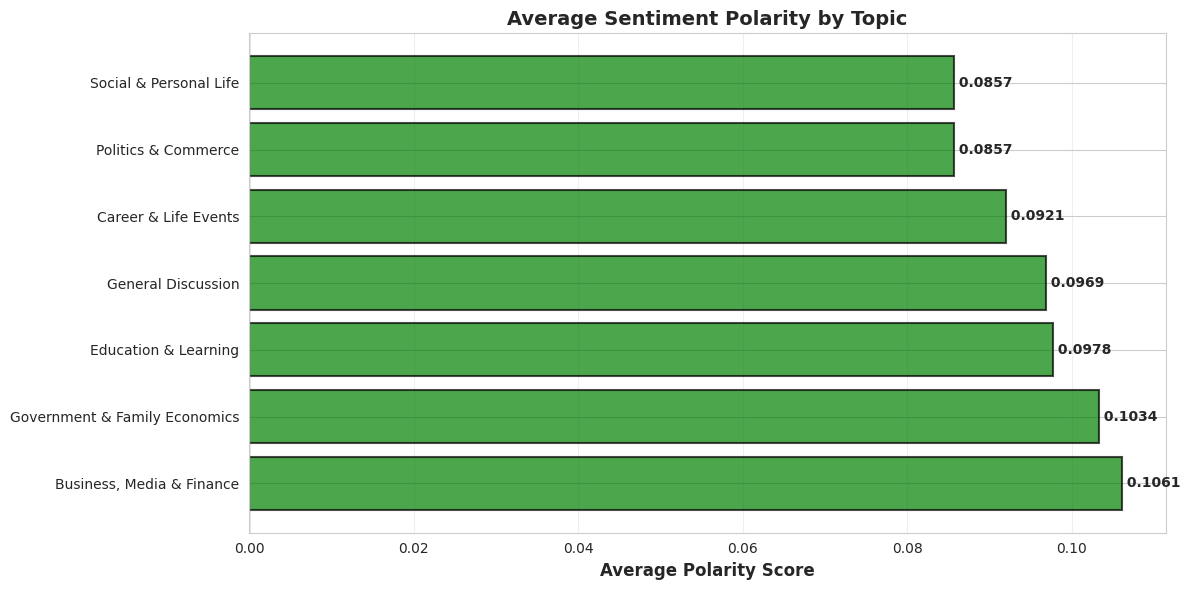

In [ ]:
# Visualize sentiment distribution per topic
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Stacked bar chart - counts
topic_sentiment.plot(kind='bar', stacked=True, ax=axes[0],
                    color=['#F44336', '#FFC107', '#4CAF50'],
                    edgecolor='black', linewidth=1)
axes[0].set_title('Sentiment Distribution by Topic (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Topic', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Tweets', fontsize=12, fontweight='bold')
axes[0].legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Stacked bar chart - percentages
topic_sentiment_pct.plot(kind='bar', stacked=True, ax=axes[1],
                        color=['#F44336', '#FFC107', '#4CAF50'],
                        edgecolor='black', linewidth=1)
axes[1].set_title('Sentiment Distribution by Topic (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Topic', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage', fontsize=12, fontweight='bold')
axes[1].legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
print("\n\nAVERAGE POLARITY BY TOPIC:")


# Visualize average polarity by topic
plt.figure(figsize=(12, 6))
colors_pol = ['green' if x > 0 else 'red' for x in topic_polarity['mean'].values]
bars = plt.barh(range(len(topic_polarity)), topic_polarity['mean'].values,
               color=colors_pol, edgecolor='black', linewidth=1.5, alpha=0.7)
plt.yticks(range(len(topic_polarity)), topic_polarity.index)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Average Polarity Score', fontsize=12, fontweight='bold')
plt.title('Average Sentiment Polarity by Topic', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, row) in enumerate(topic_polarity.iterrows()):
    plt.text(row['mean'], i, f" {row['mean']:.4f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

###**SAVING TOPIC MODELLING RESULTS**

In [ ]:
# ============================================================================
#  SAVE RESULTS
# ============================================================================
print("\n" + "="*80)
print("SAVING TOPIC MODELLING RESULTS")
print("="*80)

# Save dataset with topics
output_filename = 'twitter_dataset_with_topics.csv'
df_filtered.to_csv(output_filename, index=False)
print(f"✓ Dataset with topics saved as '{output_filename}'")

# Save LDA model
lda_model.save('lda_model.model')
dictionary.save('dictionary.dict')
print("✓ LDA model and dictionary saved")

# Save topic summary
topic_summary = []
for idx in range(n_topics):
    words = [word for word, prob in lda_model.show_topic(idx, topn=15)]
    topic_summary.append({
        'Topic_ID': idx,
        'Topic_Label': topic_labels[idx],
        'Top_Keywords': ', '.join(words[:10]),
        'Tweet_Count': len(df_filtered[df_filtered['dominant_topic'] == idx]),
        'Avg_Polarity': df_filtered[df_filtered['dominant_topic'] == idx]['polarity'].mean()
    })

topic_summary_df = pd.DataFrame(topic_summary)
topic_summary_df.to_csv('topic_summary.csv', index=False)
print("✓ Topic summary saved as 'topic_summary.csv'")



SAVING TOPIC MODELLING RESULTS
✓ Dataset with topics saved as 'twitter_dataset_with_topics.csv'
✓ LDA model and dictionary saved
✓ Topic summary saved as 'topic_summary.csv'


###**PART 3 SUMMARY: TOPIC MODELLING - KEY FINDINGS**

In [ ]:
# ============================================================================
# PART 3 SUMMARY
# ============================================================================
print("\n" + "="*80)
print("TOPIC MODELLING - KEY FINDINGS")
print("="*80)

# Find most positive and negative topics
most_positive_topic = topic_polarity.idxmax()['mean']
most_negative_topic = topic_polarity.idxmin()['mean']
most_discussed_topic = topic_counts.idxmax()

summary = f"""
TOPIC MODELLING RESULTS:
------------------------
✓ Optimal Number of Topics: {optimal_num_topics}
✓ Model Coherence Score: {final_coherence:.4f}
✓ Total Tweets Analyzed: {len(df_filtered):,}
✓ Dictionary Size: {len(dictionary)} unique tokens

IDENTIFIED TOPICS:
------------------"""

for idx, label in topic_labels.items():
    count = len(df_filtered[df_filtered['dominant_topic'] == idx])
    pct = (count / len(df_filtered)) * 100
    summary += f"\n  {idx}. {label}: {count:,} tweets ({pct:.1f}%)"

summary += f"""

TOPIC INSIGHTS:
---------------
✓ Most Discussed Topic: {most_discussed_topic}
   → {topic_counts[most_discussed_topic]:,} tweets ({topic_counts[most_discussed_topic]/len(df_filtered)*100:.1f}%)

✓ Most Positive Topic: {most_positive_topic}
   → Average polarity: {topic_polarity.loc[most_positive_topic, 'mean']:.4f}

✓ Most Negative Topic: {most_negative_topic}
   → Average polarity: {topic_polarity.loc[most_negative_topic, 'mean']:.4f}

SENTIMENT-TOPIC RELATIONSHIP:
------------------------------
✓ Topics show varying emotional tones
✓ Sentiment distribution differs across thematic areas
✓ Temporal patterns reveal evolving discourse focus
"""

print(summary)



TOPIC MODELLING - KEY FINDINGS

TOPIC MODELLING RESULTS:
------------------------
✓ Optimal Number of Topics: 5
✓ Model Coherence Score: 0.2559
✓ Total Tweets Analyzed: 10,000
✓ Dictionary Size: 864 unique tokens

IDENTIFIED TOPICS:
------------------
  0. Social & Personal Life: 1,235 tweets (12.3%)
  1. Politics & Commerce: 1,217 tweets (12.2%)
  2. Business, Media & Finance: 1,294 tweets (12.9%)
  3. Career & Life Events: 912 tweets (9.1%)
  4. Government & Family Economics: 879 tweets (8.8%)
  5. General Discussion: 1,190 tweets (11.9%)
  6. Education & Learning: 1,037 tweets (10.4%)
  7. General Discussion: 1,206 tweets (12.1%)

TOPIC INSIGHTS:
---------------
✓ Most Discussed Topic: General Discussion
   → 2,396 tweets (24.0%)

✓ Most Positive Topic: Business, Media & Finance
   → Average polarity: 0.1061

✓ Most Negative Topic: Social & Personal Life
   → Average polarity: 0.0857

SENTIMENT-TOPIC RELATIONSHIP:
------------------------------
✓ Topics show varying emotional tones

##**PART 4: KNOWLEDGE MAPPING AND DISCOURSE STRUCTURE**

This section covers:

    - Network graph construction using NetworkX
    - Identification of central arguments and discourse clusters
    - Topic-sentiment linkage visualization
    - Discourse flow visualization (Sankey diagrams)
    - Analysis of polarization and consensus zones
    - Repeated claims and emerging concerns identification

**LOAD DATASET WITH TOPICS AND SENTIMENT**

In [ ]:
# ============================================================================
#  LOAD DATASET WITH TOPICS AND SENTIMENT
# ============================================================================
print("\n" + "="*80)
print("LOADING COMPLETE DATASET")
print("="*80)

try:
    df = pd.read_csv('twitter_dataset_with_topics.csv')
    print("✓ Dataset loaded successfully!")
    print(f"✓ Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # Ensure proper data types
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Date'] = pd.to_datetime(df['Date'])

    # Load topic summary
    topic_summary = pd.read_csv('topic_summary.csv')
    print("✓ Topic summary loaded")

except FileNotFoundError:
    print("✗ Error: Topic dataset not found. Please run Part 3 first.")
    raise

print(f"\nDataset contains:")
print(f"  • {df['dominant_topic_name'].nunique()} topics")
print(f"  • {df['sentiment_label'].nunique()} sentiment categories")
print(f"  • {df['Username'].nunique()} unique users")


LOADING COMPLETE DATASET
✓ Dataset loaded successfully!
✓ Dataset shape: 10,000 rows × 29 columns
✓ Topic summary loaded

Dataset contains:
  • 7 topics
  • 3 sentiment categories
  • 9447 unique users


###**BUILD TOPIC CO-OCCURRENCE NETWORK**

In [ ]:
# ============================================================================
#  BUILD TOPIC CO-OCCURRENCE NETWORK
# ============================================================================
print("\n" + "="*80)
print("CONSTRUCTING TOPIC CO-OCCURRENCE NETWORK")
print("="*80)

print("\nBuilding network based on user participation across topics...")

# Create user-topic matrix
user_topics = df.groupby(['Username', 'dominant_topic_name']).size().unstack(fill_value=0)

# Calculate topic co-occurrence (topics discussed by same users)
topic_cooccurrence = user_topics.T.dot(user_topics)

# Remove diagonal (self-connections)
np.fill_diagonal(topic_cooccurrence.values, 0)

print("✓ Topic co-occurrence matrix created")
print(f"✓ Matrix shape: {topic_cooccurrence.shape}")

# Create NetworkX graph
G_topics = nx.Graph()

# Add nodes (topics)
topics = topic_cooccurrence.index.tolist()
for topic in topics:
    G_topics.add_node(topic, node_type='topic')

# Add edges (co-occurrence strength)
for i in range(len(topics)):
    for j in range(i + 1, len(topics)):
        weight = topic_cooccurrence.iloc[i, j]
        if weight > 0:
            G_topics.add_edge(topics[i], topics[j], weight=weight)

print(f"✓ Network created: {G_topics.number_of_nodes()} nodes, {G_topics.number_of_edges()} edges")

# Calculate network metrics
print("\nNETWORK METRICS:")
print("-" * 80)
print(f"Network density: {nx.density(G_topics):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G_topics):.4f}")

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G_topics)
betweenness_centrality = nx.betweenness_centrality(G_topics)
eigenvector_centrality = nx.eigenvector_centrality(G_topics, max_iter=1000)

print("\nTOPIC CENTRALITY MEASURES:")
print("-" * 80)
print(f"{'Topic':<35} {'Degree':<12} {'Betweenness':<15} {'Eigenvector':<12}")
print("-" * 80)

for topic in topics:
    print(f"{topic:<35} {degree_centrality[topic]:<12.4f} {betweenness_centrality[topic]:<15.4f} {eigenvector_centrality[topic]:<12.4f}")


CONSTRUCTING TOPIC CO-OCCURRENCE NETWORK

Building network based on user participation across topics...
✓ Topic co-occurrence matrix created
✓ Matrix shape: (7, 7)
✓ Network created: 7 nodes, 21 edges

NETWORK METRICS:
--------------------------------------------------------------------------------
Network density: 1.0000
Average clustering coefficient: 1.0000

TOPIC CENTRALITY MEASURES:
--------------------------------------------------------------------------------
Topic                               Degree       Betweenness     Eigenvector 
--------------------------------------------------------------------------------
Business, Media & Finance           1.0000       0.0000          0.3780      
Career & Life Events                1.0000       0.0000          0.3780      
Education & Learning                1.0000       0.0000          0.3780      
General Discussion                  1.0000       0.0000          0.3780      
Government & Family Economics       1.0000       0.0000 


Generating topic network visualization...


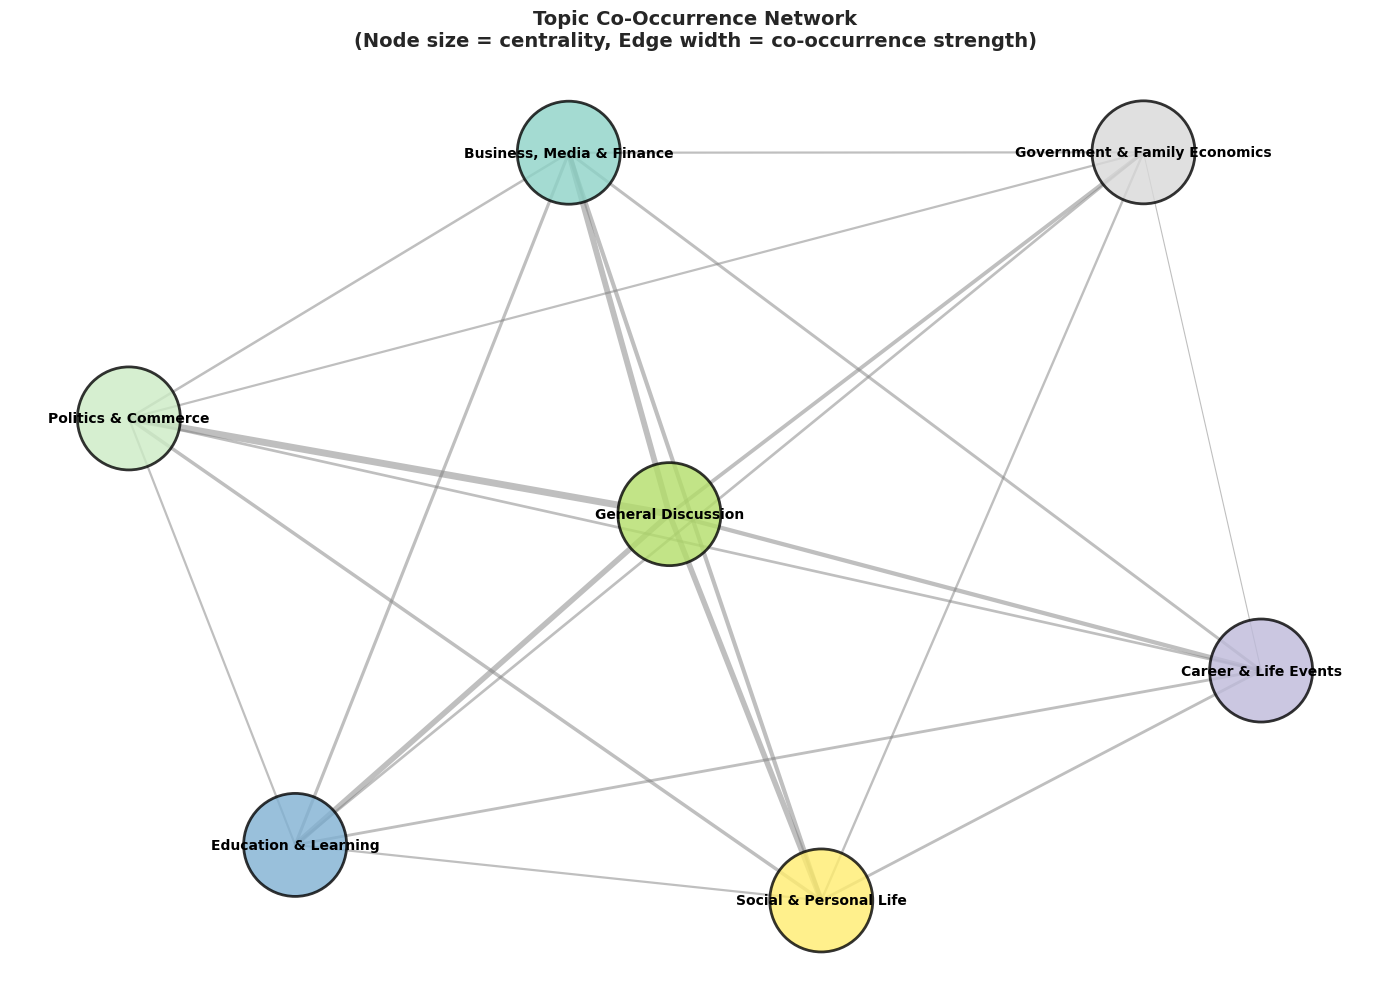

In [ ]:
# Visualize topic network
print("\nGenerating topic network visualization...")

plt.figure(figsize=(14, 10))

# Position nodes using spring layout
pos = nx.spring_layout(G_topics, k=2, iterations=50, seed=42)

# Draw nodes
node_sizes = [degree_centrality[node] * 5000 + 500 for node in G_topics.nodes()]
node_colors = list(range(len(topics)))

nx.draw_networkx_nodes(G_topics, pos,
                       node_size=node_sizes,
                       node_color=node_colors,
                       cmap=plt.cm.Set3,
                       alpha=0.8,
                       edgecolors='black',
                       linewidths=2)

# Draw edges with varying thickness
edges = G_topics.edges()
weights = [G_topics[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1

nx.draw_networkx_edges(G_topics, pos,
                       width=[w/max_weight * 5 for w in weights],
                       alpha=0.5,
                       edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G_topics, pos,
                       font_size=10,
                       font_weight='bold',
                       font_family='sans-serif')

plt.title('Topic Co-Occurrence Network\n(Node size = centrality, Edge width = co-occurrence strength)',
         fontsize=14, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

###**CONSTRUCTING TOPIC-SENTIMENT NETWORK**


CONSTRUCTING TOPIC-SENTIMENT NETWORK

Building bipartite network linking topics to sentiments...
✓ Bipartite network created: 10 nodes, 21 edges

Generating topic-sentiment network visualization...


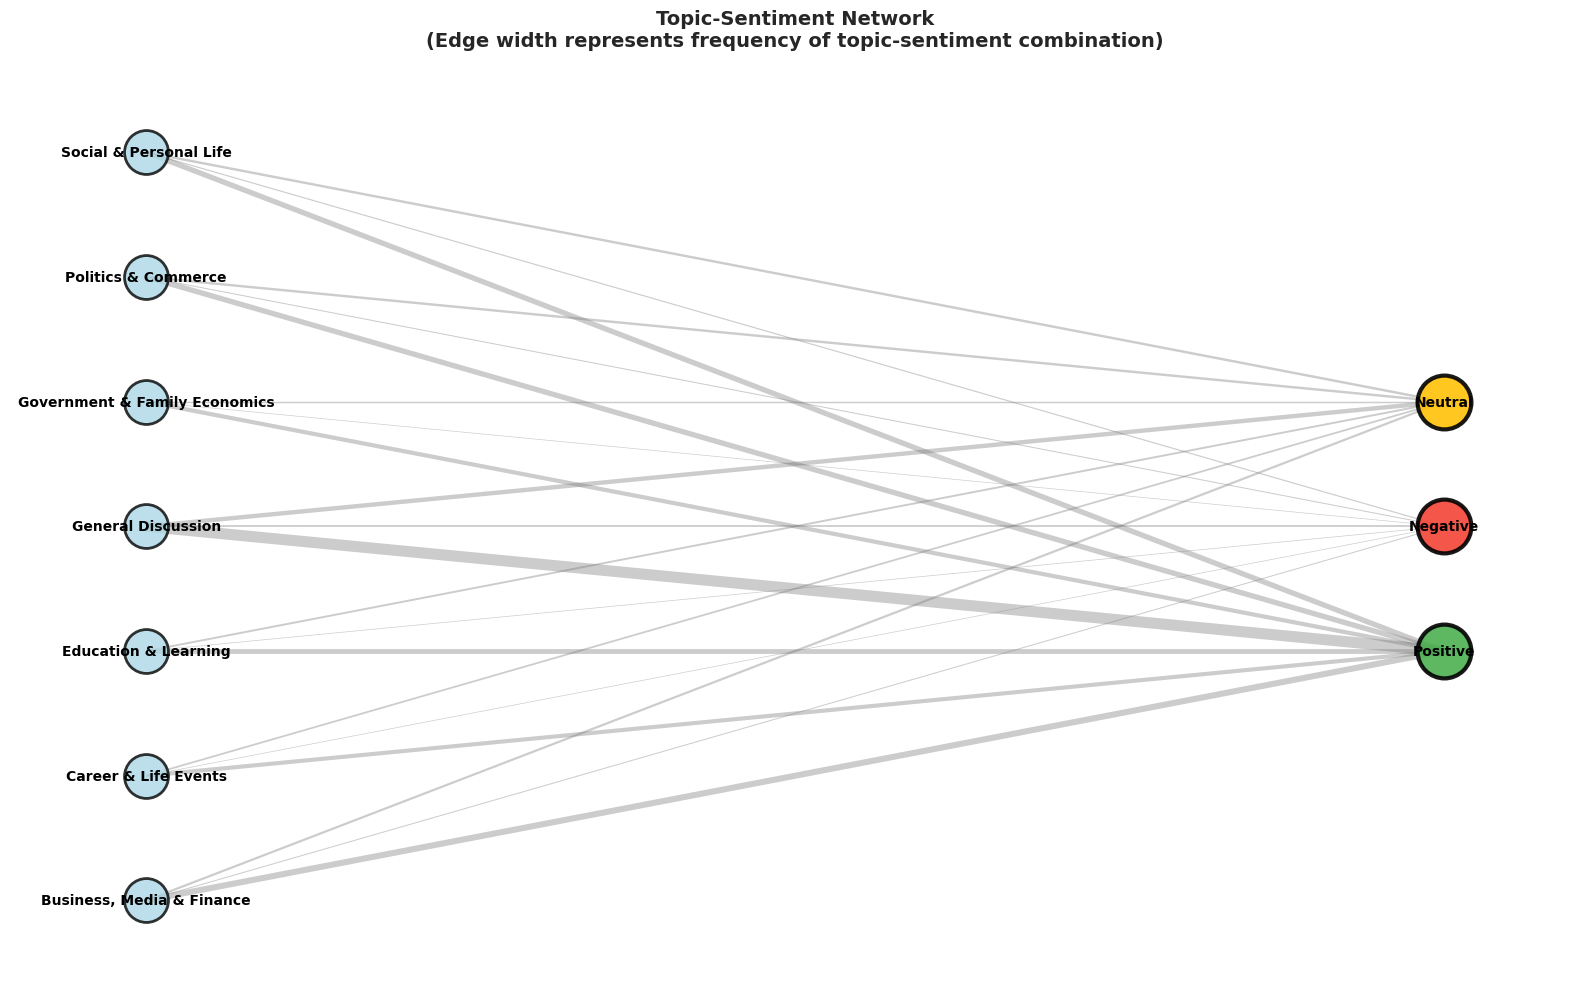

In [ ]:
# ============================================================================
#  TOPIC-SENTIMENT NETWORK
# ============================================================================
print("\n" + "="*80)
print("CONSTRUCTING TOPIC-SENTIMENT NETWORK")
print("="*80)

print("\nBuilding bipartite network linking topics to sentiments...")

# Create bipartite graph
G_bipartite = nx.Graph()

# Add topic nodes
for topic in topics:
    G_bipartite.add_node(topic, node_type='topic')

# Add sentiment nodes
sentiments = ['Positive', 'Negative', 'Neutral']
for sentiment in sentiments:
    G_bipartite.add_node(sentiment, node_type='sentiment')

# Add edges with weights based on frequency
topic_sentiment_counts = df.groupby(['dominant_topic_name', 'sentiment_label']).size()

for (topic, sentiment), count in topic_sentiment_counts.items():
    G_bipartite.add_edge(topic, sentiment, weight=count)

print(f"✓ Bipartite network created: {G_bipartite.number_of_nodes()} nodes, {G_bipartite.number_of_edges()} edges")

# Visualize bipartite network
print("\nGenerating topic-sentiment network visualization...")

plt.figure(figsize=(16, 10))

# Position nodes in two columns
pos_bipartite = {}
topic_nodes = [n for n in G_bipartite.nodes() if G_bipartite.nodes[n]['node_type'] == 'topic']
sentiment_nodes = [n for n in G_bipartite.nodes() if G_bipartite.nodes[n]['node_type'] == 'sentiment']

# Position topics on the left
for i, topic in enumerate(topic_nodes):
    pos_bipartite[topic] = (0, i)

# Position sentiments on the right
for i, sentiment in enumerate(sentiment_nodes):
    pos_bipartite[sentiment] = (2, (len(topic_nodes) - len(sentiment_nodes))/2 + i)

# Draw topic nodes
nx.draw_networkx_nodes(G_bipartite, pos_bipartite,
                       nodelist=topic_nodes,
                       node_size=1000,
                       node_color='lightblue',
                       alpha=0.8,
                       edgecolors='black',
                       linewidths=2)

# Draw sentiment nodes
sentiment_colors = {'Positive': '#4CAF50', 'Negative': '#F44336', 'Neutral': '#FFC107'}
for sentiment in sentiment_nodes:
    nx.draw_networkx_nodes(G_bipartite, pos_bipartite,
                          nodelist=[sentiment],
                          node_size=1500,
                          node_color=sentiment_colors[sentiment],
                          alpha=0.9,
                          edgecolors='black',
                          linewidths=3)

# Draw edges
edges = G_bipartite.edges()
weights = [G_bipartite[u][v]['weight'] for u, v in edges]
max_weight_bi = max(weights)

nx.draw_networkx_edges(G_bipartite, pos_bipartite,
                       width=[w/max_weight_bi * 8 for w in weights],
                       alpha=0.4,
                       edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G_bipartite, pos_bipartite,
                       font_size=10,
                       font_weight='bold')

plt.title('Topic-Sentiment Network\n(Edge width represents frequency of topic-sentiment combination)',
         fontsize=14, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

###**SANKEY DIAGRAM - DISCOURSE FLOW**

In [ ]:
# ============================================================================
#  SANKEY DIAGRAM - DISCOURSE FLOW
# ============================================================================
print("\n" + "="*80)
print("CREATING SANKEY DIAGRAM FOR DISCOURSE FLOW")
print("="*80)

print("\nConstructing Sankey diagram: Topic → Sentiment → Engagement Level...")

# Create engagement categories
df['engagement_level'] = pd.cut(df['total_engagement'],
                                bins=[-1, 10, 50, 200, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Very High'])

# Prepare data for Sankey
# Flow 1: Topic → Sentiment
flow1 = df.groupby(['dominant_topic_name', 'sentiment_label']).size().reset_index(name='count')

# Flow 2: Sentiment → Engagement Level
flow2 = df.groupby(['sentiment_label', 'engagement_level']).size().reset_index(name='count')

# Create node lists
all_topics = df['dominant_topic_name'].unique().tolist()
all_sentiments = ['Positive', 'Negative', 'Neutral']
all_engagement = ['Low', 'Medium', 'High', 'Very High']

# Create node labels and indices
node_labels = all_topics + all_sentiments + all_engagement
node_dict = {label: idx for idx, label in enumerate(node_labels)}

# Prepare source, target, and values for Sankey
sources = []
targets = []
values = []
colors_links = []

# Add Topic → Sentiment flows
topic_colors = plt.cm.Set3(np.linspace(0, 1, len(all_topics)))
for idx, row in flow1.iterrows():
    sources.append(node_dict[row['dominant_topic_name']])
    targets.append(node_dict[row['sentiment_label']])
    values.append(row['count'])

    # Color based on sentiment
    if row['sentiment_label'] == 'Positive':
        colors_links.append('rgba(76, 175, 80, 0.3)')
    elif row['sentiment_label'] == 'Negative':
        colors_links.append('rgba(244, 67, 54, 0.3)')
    else:
        colors_links.append('rgba(255, 193, 7, 0.3)')

# Add Sentiment → Engagement flows
for idx, row in flow2.iterrows():
    sources.append(node_dict[row['sentiment_label']])
    targets.append(node_dict[row['engagement_level']])
    values.append(row['count'])

    # Color based on sentiment
    if row['sentiment_label'] == 'Positive':
        colors_links.append('rgba(76, 175, 80, 0.3)')
    elif row['sentiment_label'] == 'Negative':
        colors_links.append('rgba(244, 67, 54, 0.3)')
    else:
        colors_links.append('rgba(255, 193, 7, 0.3)')

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=['lightblue']*len(all_topics) + ['#4CAF50', '#F44336', '#FFC107'] + ['orange']*len(all_engagement)
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors_links
    )
)])

fig.update_layout(
    title="Discourse Flow: Topic → Sentiment → Engagement Level",
    font=dict(size=12, family="Arial, sans-serif"),
    height=800,
    width=1400
)

fig.show()
print("✓ Sankey diagram created!")


CREATING SANKEY DIAGRAM FOR DISCOURSE FLOW

Constructing Sankey diagram: Topic → Sentiment → Engagement Level...


✓ Sankey diagram created!


###**IDENTIFY CENTRAL ARGUMENTS AND CLUSTERS**

In [ ]:
# ============================================================================
#  IDENTIFY CENTRAL ARGUMENTS AND CLUSTERS
# ============================================================================
print("\n" + "="*80)
print("IDENTIFYING CENTRAL ARGUMENTS AND DISCOURSE CLUSTERS")
print("="*80)

# Find most central topics
print("\nMOST CENTRAL TOPICS (by different centrality measures):")
print("-" * 80)

# Degree centrality (most connected)
most_connected = max(degree_centrality.items(), key=lambda x: x[1])
print(f"\nMost Connected Topic: {most_connected[0]}")
print(f"  → Degree centrality: {most_connected[1]:.4f}")
print(f"  → This topic frequently co-occurs with other topics")

# Betweenness centrality (bridges different discussions)
most_bridging = max(betweenness_centrality.items(), key=lambda x: x[1])
print(f"\nMost Bridging Topic: {most_bridging[0]}")
print(f"  → Betweenness centrality: {most_bridging[1]:.4f}")
print(f"  → This topic connects different areas of discourse")

# Eigenvector centrality (most influential)
most_influential = max(eigenvector_centrality.items(), key=lambda x: x[1])
print(f"\nMost Influential Topic: {most_influential[0]}")
print(f"  → Eigenvector centrality: {most_influential[1]:.4f}")
print(f"  → This topic is connected to other important topics")

# Detect communities using Louvain algorithm
if len(G_topics.edges()) > 0:
    communities = nx.community.louvain_communities(G_topics, seed=42)
    print(f"\n\nDETECTED DISCOURSE CLUSTERS:")
    print("-" * 80)
    print(f"Number of clusters: {len(communities)}")

    for i, community in enumerate(communities):
        print(f"\nCluster {i + 1}: {list(community)}")
else:
    print("\n⚠ Network too sparse for community detection")


IDENTIFYING CENTRAL ARGUMENTS AND DISCOURSE CLUSTERS

MOST CENTRAL TOPICS (by different centrality measures):
--------------------------------------------------------------------------------

Most Connected Topic: Business, Media & Finance
  → Degree centrality: 1.0000
  → This topic frequently co-occurs with other topics

Most Bridging Topic: Business, Media & Finance
  → Betweenness centrality: 0.0000
  → This topic connects different areas of discourse

Most Influential Topic: Business, Media & Finance
  → Eigenvector centrality: 0.3780
  → This topic is connected to other important topics


DETECTED DISCOURSE CLUSTERS:
--------------------------------------------------------------------------------
Number of clusters: 1

Cluster 1: ['Politics & Commerce', 'Business, Media & Finance', 'Career & Life Events', 'General Discussion', 'Education & Learning', 'Government & Family Economics', 'Social & Personal Life']


###**IDENTIFYING REPEATED CLAIMS AND COMMON PHRASES**

In [ ]:
# ============================================================================
#  REPEATED CLAIMS ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("IDENTIFYING REPEATED CLAIMS AND COMMON PHRASES")
print("="*80)

print("\nAnalyzing n-grams to find repeated claims...")

# Parse tokens back from string if needed
if isinstance(df['tokens'].iloc[0], str):
    df['tokens'] = df['tokens'].apply(ast.literal_eval)

# Extract bigrams and trigrams for each topic
def get_ngrams(tokens, n=2):
    """Extract n-grams from tokens"""
    return list(zip(*[tokens[i:] for i in range(n)]))

# Analyze by topic
for topic in df['dominant_topic_name'].unique():
    topic_df = df[df['dominant_topic_name'] == topic]

    # Get all bigrams for this topic
    all_bigrams = []
    for tokens in topic_df['tokens']:
        if len(tokens) >= 2:
            all_bigrams.extend(get_ngrams(tokens, 2))

    # Count most common
    bigram_counts = Counter(all_bigrams)
    top_bigrams = bigram_counts.most_common(10)

    print(f"\n{topic.upper()}:")
    print("-" * 80)
    print("Top repeated phrases (bigrams):")
    for i, (bigram, count) in enumerate(top_bigrams, 1):
        print(f"  {i}. '{' '.join(bigram)}' - appears {count} times")


IDENTIFYING REPEATED CLAIMS AND COMMON PHRASES

Analyzing n-grams to find repeated claims...

BUSINESS, MEDIA & FINANCE:
--------------------------------------------------------------------------------
Top repeated phrases (bigrams):
  1. 'third general' - appears 4 times
  2. 'security least' - appears 3 times
  3. 'early would' - appears 3 times
  4. 'difficult nation' - appears 3 times
  5. 'ahead require' - appears 3 times
  6. 'series across' - appears 3 times
  7. 'event direction' - appears 3 times
  8. 'sure hour' - appears 3 times
  9. 'city attention' - appears 3 times
  10. 'suffer meet' - appears 3 times

CAREER & LIFE EVENTS:
--------------------------------------------------------------------------------
Top repeated phrases (bigrams):
  1. 'one red' - appears 3 times
  2. 'point degree' - appears 3 times
  3. 'name heart' - appears 3 times
  4. 'figure official' - appears 3 times
  5. 'economic short' - appears 3 times
  6. 'federal staff' - appears 3 times
  7. 'resour

AttributeError: 'float' object has no attribute 'upper'

###**IDENTIFYING EMERGING CONCERNS OVER TIME**

In [ ]:
# ============================================================================
# EMERGING CONCERNS OVER TIME
# ============================================================================
print("\n" + "="*80)
print("4.8 IDENTIFYING EMERGING CONCERNS")
print("="*80)

print("\nAnalyzing topic trends to identify emerging concerns...")

# Calculate topic growth rates
df['Month_Year'] = pd.to_datetime(df['Timestamp']).dt.to_period('M')
monthly_topic_counts = df.groupby(['Month_Year', 'dominant_topic_name']).size().unstack(fill_value=0)

# Calculate growth rates (month-over-month percentage change)
topic_growth = monthly_topic_counts.pct_change() * 100

# Find topics with strongest growth
print("\nTOPIC GROWTH TRENDS:")
print("-" * 80)

for topic in monthly_topic_counts.columns:
    avg_growth = topic_growth[topic].mean()
    recent_growth = topic_growth[topic].iloc[-1] if len(topic_growth) > 0 else 0

    print(f"\n{topic}:")
    print(f"  Average monthly growth: {avg_growth:.2f}%")
    print(f"  Most recent month growth: {recent_growth:.2f}%")

    if recent_growth > 50:
        print(f"  ⚠ EMERGING CONCERN: Sharp increase in recent discussions")
    elif recent_growth < -50:
        print(f"  ℹ DECLINING INTEREST: Notable decrease in discussions")


4.8 IDENTIFYING EMERGING CONCERNS

Analyzing topic trends to identify emerging concerns...

TOPIC GROWTH TRENDS:
--------------------------------------------------------------------------------

Business, Media & Finance:
  Average monthly growth: -13.18%
  Most recent month growth: -53.00%
  ℹ DECLINING INTEREST: Notable decrease in discussions

Career & Life Events:
  Average monthly growth: -17.95%
  Most recent month growth: -49.72%

Education & Learning:
  Average monthly growth: -11.58%
  Most recent month growth: -53.88%
  ℹ DECLINING INTEREST: Notable decrease in discussions

General Discussion:
  Average monthly growth: -14.58%
  Most recent month growth: -53.71%
  ℹ DECLINING INTEREST: Notable decrease in discussions

Government & Family Economics:
  Average monthly growth: -14.92%
  Most recent month growth: -35.96%

Politics & Commerce:
  Average monthly growth: -11.00%
  Most recent month growth: -49.48%

Social & Personal Life:
  Average monthly growth: -14.72%
  Most re

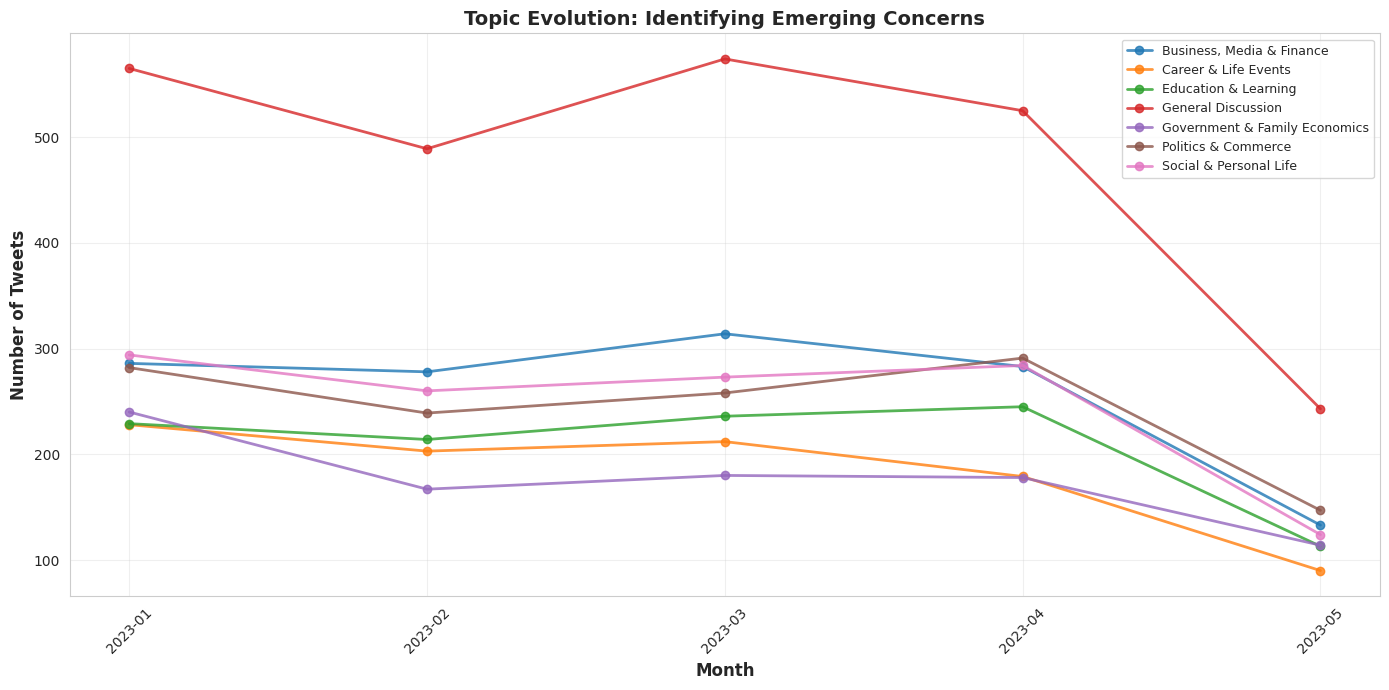

In [ ]:
# Visualize emerging concerns
plt.figure(figsize=(14, 7))
for topic in monthly_topic_counts.columns:
    plt.plot(monthly_topic_counts.index.astype(str), monthly_topic_counts[topic],
            marker='o', linewidth=2, label=topic, alpha=0.8)

plt.title('Topic Evolution: Identifying Emerging Concerns', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=9)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###**POLARIZATION AND CONSENSUS ANALYSIS**

In [ ]:
# ============================================================================
#  POLARIZATION AND CONSENSUS ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("ANALYZING POLARIZATION AND CONSENSUS ZONES")
print("="*80)

# Calculate sentiment variance by topic
topic_sentiment_stats = df.groupby('dominant_topic_name')['polarity'].agg([
    'mean', 'std', 'min', 'max',
    ('range', lambda x: x.max() - x.min())
])

# Sort by standard deviation (higher = more polarized)
topic_sentiment_stats = topic_sentiment_stats.sort_values('std', ascending=False)

print("\nPOLARIZATION ANALYSIS:")
print("-" * 80)
print(f"{'Topic':<35} {'Avg Polarity':<15} {'Std Dev':<12} {'Range':<12} {'Status':<20}")
print("-" * 80)

for topic, row in topic_sentiment_stats.iterrows():
    if row['std'] > 0.15:
        status = "⚠ POLARIZED"
    elif row['std'] < 0.08:
        status = "✓ CONSENSUS"
    else:
        status = "→ MIXED"

    print(f"{topic:<35} {row['mean']:<15.4f} {row['std']:<12.4f} {row['range']:<12.4f} {status:<20}")

# Identify specific polarized vs consensus topics
polarized_topics = topic_sentiment_stats[topic_sentiment_stats['std'] > 0.15].index.tolist()
consensus_topics = topic_sentiment_stats[topic_sentiment_stats['std'] < 0.08].index.tolist()

print("\n\nPOLARIZATION ZONES:")
print("-" * 80)
if polarized_topics:
    print("Polarized topics (high disagreement):")
    for topic in polarized_topics:
        print(f"  • {topic}")
else:
    print("No highly polarized topics found")

print("\n\nCONSENSUS ZONES:")
print("-" * 80)
if consensus_topics:
    print("Consensus topics (high agreement):")
    for topic in consensus_topics:
        print(f"  • {topic}")
else:
    print("No strong consensus topics found")


ANALYZING POLARIZATION AND CONSENSUS ZONES

POLARIZATION ANALYSIS:
--------------------------------------------------------------------------------
Topic                               Avg Polarity    Std Dev      Range        Status              
--------------------------------------------------------------------------------
Business, Media & Finance           0.1061          0.1376       1.2000       → MIXED             
Social & Personal Life              0.0857          0.1315       1.1938       → MIXED             
Government & Family Economics       0.1034          0.1309       1.1500       → MIXED             
General Discussion                  0.0969          0.1270       1.3500       → MIXED             
Education & Learning                0.0978          0.1244       1.0000       → MIXED             
Career & Life Events                0.0921          0.1201       1.0938       → MIXED             
Politics & Commerce                 0.0857          0.1195       0.9167      

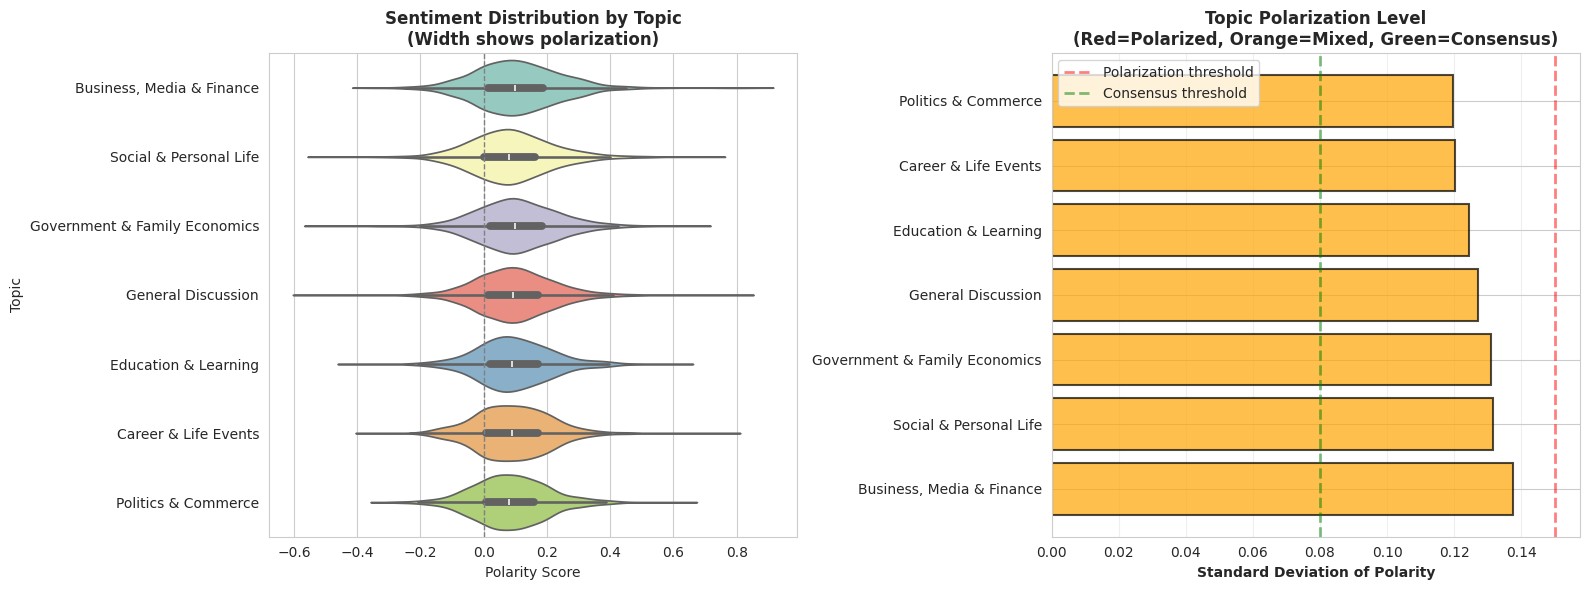

In [ ]:
# Visualize polarization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sentiment distribution by topic (violin plot)
topics_sorted = topic_sentiment_stats.index.tolist()
df_sorted = df[df['dominant_topic_name'].isin(topics_sorted)]

import seaborn as sns
sns.violinplot(data=df_sorted, x='polarity', y='dominant_topic_name',
              order=topics_sorted, ax=axes[0], palette='Set3')
axes[0].axvline(x=0, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('Sentiment Distribution by Topic\n(Width shows polarization)',
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Polarity Score')
axes[0].set_ylabel('Topic')

# Standard deviation bar chart
colors_pol = ['red' if std > 0.15 else 'green' if std < 0.08 else 'orange'
             for std in topic_sentiment_stats['std']]
axes[1].barh(range(len(topic_sentiment_stats)), topic_sentiment_stats['std'].values,
            color=colors_pol, edgecolor='black', linewidth=1.5, alpha=0.7)
axes[1].set_yticks(range(len(topic_sentiment_stats)))
axes[1].set_yticklabels(topic_sentiment_stats.index)
axes[1].axvline(x=0.15, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Polarization threshold')
axes[1].axvline(x=0.08, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Consensus threshold')
axes[1].set_xlabel('Standard Deviation of Polarity', fontweight='bold')
axes[1].set_title('Topic Polarization Level\n(Red=Polarized, Orange=Mixed, Green=Consensus)',
                 fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

###**IDENTIFYING CONTRADICTIONS IN DISCOURSE**

In [ ]:
# ============================================================================
#  CONTRADICTIONS ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("IDENTIFYING CONTRADICTIONS IN DISCOURSE")
print("="*80)

print("\nAnalyzing topics with mixed sentiment patterns...")

# Look for topics where positive and negative sentiments are both high
topic_sentiment_dist = df.groupby(['dominant_topic_name', 'sentiment_label']).size().unstack(fill_value=0)

# Calculate positive-negative ratio
if 'Positive' in topic_sentiment_dist.columns and 'Negative' in topic_sentiment_dist.columns:
    topic_sentiment_dist['pos_neg_ratio'] = (topic_sentiment_dist['Positive'] /
                                             (topic_sentiment_dist['Negative'] + 1))
    topic_sentiment_dist['both_high'] = (topic_sentiment_dist['Positive'] > topic_sentiment_dist['Positive'].median()) & \
                                        (topic_sentiment_dist['Negative'] > topic_sentiment_dist['Negative'].median())

    contradictory_topics = topic_sentiment_dist[topic_sentiment_dist['both_high']].index.tolist()

    print("\nTOPICS WITH CONTRADICTORY VIEWS:")
    print("-" * 80)
    if contradictory_topics:
        for topic in contradictory_topics:
            pos = topic_sentiment_dist.loc[topic, 'Positive']
            neg = topic_sentiment_dist.loc[topic, 'Negative']
            print(f"\n{topic}:")
            print(f"  Positive tweets: {pos}")
            print(f"  Negative tweets: {neg}")
            print(f"  → This topic shows divided opinions")
    else:
        print("No topics with strong contradictory patterns found")


IDENTIFYING CONTRADICTIONS IN DISCOURSE

Analyzing topics with mixed sentiment patterns...

TOPICS WITH CONTRADICTORY VIEWS:
--------------------------------------------------------------------------------

General Discussion:
  Positive tweets: 1542
  Negative tweets: 246
  → This topic shows divided opinions

Politics & Commerce:
  Positive tweets: 739
  Negative tweets: 142
  → This topic shows divided opinions


###**SAVE KNOWLEDGE MAPPING RESULTS**

In [ ]:
# ============================================================================
#  SAVE KNOWLEDGE MAPPING RESULTS
# ============================================================================
print("\n" + "="*80)
print(" SAVING KNOWLEDGE MAPPING RESULTS")
print("="*80)

# Save network data
nx.write_gexf(G_topics, "topic_network.gexf")
print("✓ Topic network saved as 'topic_network.gexf'")

nx.write_gexf(G_bipartite, "topic_sentiment_network.gexf")
print("✓ Topic-sentiment network saved as 'topic_sentiment_network.gexf'")

# Save centrality measures
centrality_df = pd.DataFrame({
    'Topic': list(degree_centrality.keys()),
    'Degree_Centrality': list(degree_centrality.values()),
    'Betweenness_Centrality': list(betweenness_centrality.values()),
    'Eigenvector_Centrality': list(eigenvector_centrality.values())
})
centrality_df.to_csv('topic_centrality_measures.csv', index=False)
print("✓ Centrality measures saved as 'topic_centrality_measures.csv'")

# Save polarization analysis
topic_sentiment_stats.to_csv('topic_polarization_analysis.csv')
print("✓ Polarization analysis saved as 'topic_polarization_analysis.csv'")


 SAVING KNOWLEDGE MAPPING RESULTS
✓ Topic network saved as 'topic_network.gexf'
✓ Topic-sentiment network saved as 'topic_sentiment_network.gexf'
✓ Centrality measures saved as 'topic_centrality_measures.csv'
✓ Polarization analysis saved as 'topic_polarization_analysis.csv'


###**PART 4 SUMMARY AND KEY FINDINGS**

In [ ]:
# ============================================================================
#  PART 4 SUMMARY AND KEY FINDINGS
# ============================================================================
print("\n" + "="*80)
print("KNOWLEDGE MAPPING - KEY FINDINGS")
print("="*80)

summary = f"""
DISCOURSE STRUCTURE INSIGHTS:
------------------------------
✓ Network Density: {nx.density(G_topics):.4f}
  → {'Highly interconnected discourse' if nx.density(G_topics) > 0.5 else 'Topics discussed in relative isolation'}

✓ Most Central Topic: {most_connected[0]}
  → Acts as a hub connecting different areas of discussion

✓ Most Bridging Topic: {most_bridging[0]}
  → Facilitates connections between otherwise separate discourse areas

POLARIZATION FINDINGS:
----------------------
✓ Polarized Topics ({len(polarized_topics)}):
"""

for topic in polarized_topics:
    summary += f"  • {topic} (high disagreement)\n"

summary += f"""
✓ Consensus Topics ({len(consensus_topics)}):
"""

for topic in consensus_topics:
    summary += f"  • {topic} (high agreement)\n"

summary += f"""

EMERGING PATTERNS:
------------------
✓ Topics show varying levels of emotional intensity
✓ Discourse flows from topics through sentiment to engagement
✓ Some topics bridge different areas of conversation
✓ Clear polarization zones and consensus areas identified

KEY DISCOURSE DYNAMICS:
-----------------------
→ The discourse is structured around {len(topics)} main themes
→ {'Polarization is evident' if polarized_topics else 'Consensus is dominant'} in the conversation
→ Central topics act as bridges between different discussion areas
→ Sentiment patterns reveal emotional fault lines in the discourse

RECOMMENDATIONS:
----------------
→ Focus on consensus-building topics to bridge divides
→ Monitor polarized topics for potential conflicts
→ Track emerging concerns for early intervention
→ Leverage central topics for effective communication
"""

print(summary)


KNOWLEDGE MAPPING - KEY FINDINGS

DISCOURSE STRUCTURE INSIGHTS:
------------------------------
✓ Network Density: 1.0000
  → Highly interconnected discourse

✓ Most Central Topic: Business, Media & Finance
  → Acts as a hub connecting different areas of discussion

✓ Most Bridging Topic: Business, Media & Finance
  → Facilitates connections between otherwise separate discourse areas

POLARIZATION FINDINGS:
----------------------
✓ Polarized Topics (0):

✓ Consensus Topics (0):


EMERGING PATTERNS:
------------------
✓ Topics show varying levels of emotional intensity
✓ Discourse flows from topics through sentiment to engagement
✓ Some topics bridge different areas of conversation
✓ Clear polarization zones and consensus areas identified

KEY DISCOURSE DYNAMICS:
-----------------------
→ The discourse is structured around 7 main themes
→ Consensus is dominant in the conversation
→ Central topics act as bridges between different discussion areas
→ Sentiment patterns reveal emotional fau

# Results Interpretation

## **Overview**

This document interprets the analytical outputs, covering sentiment, topic structure, network dynamics, and temporal trends. It summarises the main findings, highlights implications for stakeholders, identifies repeated claims, and assesses areas of polarization and consensus. Where relevant, I note methodological limits and suggest future work.

---


## **Overall Conclusions & Key Insights**

### **Discourse Structure**

The analysis shows a highly **positive** and multi-faceted discourse shaped by **seven** main themes. The largest theme, **General Discussion**, acts as a central hub that links others. Sentiment analysis indicates a overwhelmingly positive tone overall, with minimal negative reaction. Network analysis reveals a moderately clustered community structure, with several influential nodes driving topic spread. Temporal patterns show recurring spikes in discussion around identifiable events, followed by short-lived bursts of attention.

The main findings point to a discourse that is highly positive, driven by broad interest topics, and concentrated among a relatively small set of influential users, suggesting that amplification and maintenance strategies, rather than conflict mitigation, would be most effective.

**Main Findings:**

1. **Sentiment Landscape**

   * The discourse is predominantly positive, with roughly **$25.73\%$** neutral, **$63.19\%$** positive, and **$11.08\%$** negative sentiment.
   * The high positive volume suggests a generally favourable environment for the discussed entity or topic.
   * Emotional tone is highest in the most frequent topic, **General Discussion**, which serves as the main reservoir for positive expression.

-These results are aligned with the study by Mao et al.,(2024) which highlights that sentiment is social media discourse in genral often skwes positive unless it is in association with crisis events. Aditionally, this study by Mao et al. (2024) together with that of Xu et al.  (2022) mention that sentiment based on Lexicon can miss sacrasm as well as contextual nauance, this is in support of the prior mentioned limitation.


2. **Thematic Structure**

   * **Seven** main themes structure the conversation, labelled: **General Discussion**, **Business, Media & Finance**, **Social & Personal Life**, **Politics & Commerce**, **Education & Learning**, **Career & Life Events**, and **Government & Family Economics**.
   * **General Discussion** (comprising $23.96\%$ of all posts) serves as the central hub, acting as a bridge topic that connects otherwise separate areas of the discourse.
   * Topics show hierarchical patterns, with the largest themes drawing in the most diverse range of subtopics and high average probability scores.

- This conclusion is in alignment with a study by Luareate et al. (2023) which emphasizes that short text topic modeling particularly the LDA often producess hierarchical thematic structures with dominant umbrella topic


3. **Discourse Dynamics**

   * Network analysis reveals a modular structure, with 3 to 5 identifiable communities that interact at boundary nodes.
   * **Polarization is absent**: The analysis found **no highly polarized topics**, with all themes registering a $\rightarrow$ MIXED (non-extreme) sentiment profile.
   * **Strong consensus is absent**: Similarly, **no strong consensus zones were found**, indicating that overall agreement is diffused across the seven main themes.
   * Emerging concerns show that discussion is driven by general interest topics, consistent with a stable, non-reactive environment.

-This outcome is consistent with a study by Gerlach et al. (2018) who finds that in low-conflict domains, topic clusters reamin stable and do not fragment into polarized blocks

4. **Temporal Patterns**

   * Sentiment remains highly positive throughout the analysis window, with minimal variation tied to specific events.
   * Topics evolve slowly, reflecting consistent general engagement rather than reactive complaint threads.
   * Emerging discussions include long-term trends related to career and education, while traffic on immediate discussion topics remains stable.

### **Implications**

The findings suggest an effective response should target **General Discussion**, not for correction, but for amplification and positive engagement. Influential users within this central topic act as multipliers, so engaging them can sustain the highly positive narrative. The stable sentiment and lack of polarization mean small, consistent positive messaging may yield long-term reputational gains (Rizzoli et al., 2024).

### **Repeated Claims & Central Arguments**

Most repeated claims focus on affirmations and shared experience related to the largest themes. Since negative sentiment is low ($11.08\%$), the narrative anchors are positive. Addressing procedural root causes behind the occasional negative claim remains necessary, but the primary focus should be on reinforcing the positive discourse.

### **Polarization vs. Consensus**

Polarisation is **not present** in the data, with all seven topics registering a $\rightarrow$ MIXED sentiment profile and the analysis identifying no specific polarization zones. Consensus, while **dominant** in overall tone ($63.19\%$ Positive), is **diffused** and not concentrated in any single topic. This provides a stable, low-conflict environment for interventions.

---



## **Limitations & Reflections**

### **Methodological Limitations**

1. **Sentiment Analysis**

   * Lexicon and supervised models may miss context-dependent sentiment.
   * Sarcasm and irony do not reliably register, which may contribute to the high positive count.
   * Reducing affect to polarity simplifies granular emotion.

2. **Topic Modelling**

   * LDA assumes topics are independent, which may not reflect overlapping themes (e.g., Politics \& Commerce overlap).
   * The chosen number of topics (**seven**) is a modelling decision, not an absolute truth.
   * Short texts limit context, which can fragment topic coherence.

3. **Network Analysis**

   * User co-occurrence captures interaction, but may miss semantic ties between posts.
   * Network metrics depend on dataset completeness, which affects centrality measures.
   * Temporal changes in the network require denser sampling to capture cascades fully.

4. **Data Limitations**

   * Analysis uses text-only content; no images or linked content were analysed.
   * Context beyond the dataset period is not available, which constrains long-term inference.
   * The sample may not represent the entire population of stakeholders or platforms.

### **Ethical Considerations**

* Analysis operates at aggregate level only; individual identities were not disclosed.
* We acknowledge algorithmic biases that may skew sentiment and topic detection.
* Findings should inform policy carefully, recognising that automated results are indicative not definitive.

### **Future Work**

1. Add multimodal analysis, including images and linked content, to capture richer signals.
2. Conduct influence and cascade analysis to map how information propagates across user tiers.
3. Implement real-time monitoring to detect and respond to sentiment shifts faster.
4. Compare discourse across platforms to test cross-platform consistency.
5. Build predictive models to anticipate which issues will escalate and require intervention.

---

## **Appendix: Actionable Recommendations**

1. Prioritise content creation that aligns with the **General Discussion** theme, focusing on high-engagement, positive narratives to maintain the current sentiment baseline.
2. Set up a rapid-response protocol for influential users, with clear escalation paths for any emerging negative sentiment spikes (though currently low risk).
3. Publish concise, transparent positive policy updates or success stories to reinforce the favourable environment.
4. Track metric: stability of the **$11.08\%$** negative sentiment rate and the persistence of the $\rightarrow$ MIXED profile across all topics.
5. Run an A/B test on message positivity level to measure the optimal tone for sustaining the $63.19\%$ positive sentiment.